## Import Libraries

In [2974]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import nhanes_loader
import importlib
importlib.reload(nhanes_loader)
import numpy as np
import janitor
from sklearn.linear_model import LinearRegression

janitor allows command to find and replace

## Import Household Adult File

In [2975]:
from nhanes.household_adult_file import HouseholdAdultFile
nh = HouseholdAdultFile()

In [2976]:
nh.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


## Import Exam File

In [2977]:
import nhanes.exam_file
importlib.reload(nhanes.exam_file)
from nhanes.exam_file import ExamFile

In [2978]:
exam = ExamFile()

In [2979]:
exam.data.shape

(31311, 45)

In [2980]:
exam.cols

,description,variable,position,end position,length
0,Respondent identification number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
2363,Time to complete 8-ft walk--trial B(sec),PFPTWLKB,6221,6224.0,4
2364,Number of steps--trial B,PFPNSTPB,6225,6226.0,2
2365,Pain reported on walking,PFPPAIN,6227,NaN,1
2366,Type of device used,PFPDEVIC,6228,NaN,1


## Import Household Youth File

In [2981]:
import nhanes.household_youth_file
importlib.reload(nhanes.household_youth_file)
from nhanes.household_youth_file import HouseholdYouthFile

In [2982]:
youth = HouseholdYouthFile()

In [2983]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Combine adult and exam files - adult_exam

match files on the SEQN field 

In [2984]:
adult_exam = nh.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [2985]:
adult_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20050 entries, 3 to 53623
Data columns (total 66 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HAR1           20050 non-null  int64  
 1   HAR23          20050 non-null  int64  
 2   HAR26          20050 non-null  int64  
 3   HAC1E          20050 non-null  int64  
 4   HAC1F          20050 non-null  int64  
 5   HAC1G          20050 non-null  int64  
 6   HAC1O          20050 non-null  int64  
 7   HAL6           20050 non-null  int64  
 8   HAL10          20050 non-null  int64  
 9   HAL1           20050 non-null  int64  
 10  HAL3           20050 non-null  int64  
 11  HAL5           20050 non-null  int64  
 12  DMARACER       20050 non-null  int64  
 13  DMARETHN       20050 non-null  int64  
 14  DMAETHNR       20050 non-null  int64  
 15  HSSEX          20050 non-null  int64  
 16  HSAGEIR        20050 non-null  int64  
 17  HSAGEU         20050 non-null  int64  
 18  HXPAXT

## Combine youth and exam files - youth_exam

In [2986]:
youth_exam = youth.data.set_index('SEQN').join(exam.data.set_index('SEQN'),rsuffix='_exam')

In [3633]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

In [2988]:
youth_exam.query('HSAGEIR < 18').shape

(13944, 60)

# Hankinson Exclusion

Ages - have none over 89; 17-89
20,050 patients in adult exam file (age > 0)

Any age  .shape - returns row and column count of a dataset

.describe() - returns statistics about numerical columns

.dtypes - returns the data type of each column

.count() - number of total values in column

.value_counts() - returns object counting counts of unique values

In [2989]:
adult_exam.query('HSAGEIR>0').shape

(20050, 66)

Any spirometry  H 16484 

20050 adult in exam file
16840  adult did spirometry

## SPPMANEU - # acceptable trials

According to the NHANES documentation, the values for SPPMANEU (number of acceptable trials)

00 150; 01-16 20836. 88 1445 blank 8880

so total spirometry is 150 + 20836 = 20986, but this doesn't match, looking at data base values which has 16840 with SPPMANEU 0 to <88

In [2990]:
adult_exam.SPPMANEU.value_counts()

5.0     7569
6.0     2553
4.0     1932
7.0     1544
88.0    1310
8.0     1238
3.0      668
9.0      400
2.0      292
10.0     233
1.0      226
0.0      144
11.0      23
13.0       8
12.0       8
14.0       1
16.0       1
Name: SPPMANEU, dtype: int64

adult_exam.SPPMANEU.value_counts()

In [2991]:
adult_exam.query('SPPMANEU != 88').shape

(18740, 66)

In [2992]:
adult_exam.query('SPPMANEU > -1 & SPPMANEU < 88').shape

(16840, 66)

## total with spirometry 16840
total 2 or more spirometry 16470

## number 2 or more acceptable trials  H 277, 16207  we have 16470 (+263)

In [2993]:
adult_exam.query('2 <= SPPMANEU < 88').shape

(16470, 66)

In [2994]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88').shape

(16470, 66)

### SPPREPRO = 4 both FVC and FEV1 reproducible; 1 FVC not reproducible; 2 FEV1 no reprod 3 neither FVC or FEV1 reproducible
What closely matches Hankinson is to take subjects with FEV1 reproducible or both FEV1 and FVC reproducible
15286 have 2 or more, both FEV1 and FVC reproducible
16289 have 2 or more, FEV1 reproducible - use that criteria (=4 | =1)

In [2995]:
adult_exam.SPPREPRO.value_counts()

4.0    15373
8.0     1454
1.0     1003
3.0      267
2.0       53
Name: SPPREPRO, dtype: int64

In [2996]:
adult_exam.query('SPPMANEU > 1 & SPPMANEU < 88 & SPPREPRO == 4').shape

(15286, 66)

In [2997]:
adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)').shape

(16289, 66)

and age < 90 H 68,16139  we have 84  16386 (+26, +247)

In [2998]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').shape

(16386, 66)

In [2999]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('HSAGEIR < 90').shape)

(16215, 66)

In [3000]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('MXPAXTMR < 1080').shape)

(16027, 66)

## and age <90 16386, 16215

# first number is with 2 or more spirometries and = the parameter; 2nd is 2 or more with reproducible FEV1 with not the parameter

adult_exam.query('HSAGEIR >= 90').shape

and race/ethnicity not other  H 636, 15503

adult_exam.query('HSAGEIR > 0').shape

and race/ethnicity not other  H 636  15503  we have 639, 15747 (+3, +244)

In [3001]:
adult_exam.DMARETHN.value_counts()

1    8483
2    5486
3    5306
4     775
Name: DMARETHN, dtype: int64

In [3002]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN == 4').shape

(639, 66)

In [3003]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').shape)

(15747, 66)

In [3004]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').shape)

(15395, 66)

# and race not other 15747, 15580

and cigarette smoker H 7,667  7,836  We have  7787 7960 (+120  +124)


In [3005]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

or statement not work, so need HAR1 = 2

In [3006]:
adult_exam.query('HAR1 == 1' or 'HAR1 == 8').shape

(9799, 66)

In [3007]:
adult_exam.query('HAR1 == 1 | HAR1 == 8').shape

(9815, 66)

In [3008]:
adult_exam.query('HAR1 == 2').shape

(10235, 66)

age<90 & ethnicity not other and not smoker(HAR1==2)

In [3009]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

(7960, 66)

# and not smoker('not HAR1==1') 7960, 7851

In [3010]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1').shape

(7960, 66)

In [3011]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1').shape)

(7764, 66)

HXPG1 how many cigarettes past 5 days. 0, #, or 888 applicable  SO '0 < HXPG1 < 888'
65 smoke cigarettes past 5 days

In [3012]:
adult_exam.query('0 < HXPG1 < 888').shape

(65, 66)

include those not smoking cigarettes 5 days

In [3013]:
adult_exam.query('not (0 < HXPG1 < 888)').shape

(19985, 66)

In [3014]:
adult_exam.query('(HXPG1 ==0) | (HXPG1 == 888)').shape

(392, 66)

HXPG2A -pipes

In [3015]:
adult_exam.query('0 < HXPG2A < 88').shape

(6, 66)

HXPG2B - cigars

In [3016]:
adult_exam.query('0 < HXPG2B < 88').shape

(1, 66)

adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').shape

cigs, pipe, cigars

In [3017]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('MYPB11 ==1').shape

(0, 66)

and cigar or pipe smoker  H 313, 7523  for cigar we have 284, 7676 

cigar HAR23  2 is not cigar

In [3018]:
adult_exam.HAR23.value_counts()

2    17951
1     2073
8       21
9        5
Name: HAR23, dtype: int64

In [3019]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 ==2').query('HAR23 == 2').shape

(7676, 66)

and pipe smoker with above H 313 7523  We have 326 7634 (+13 +111)

In [3020]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

In [3021]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape

(7634, 66)

In [3022]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2')
 .query('HAR23 == 2').query('not HAR26 == 1').shape)

(7638, 66)

In [3023]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7531, 66)

In [3024]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' ).shape)

(7454, 66)

# and not cigar or pipe smoker 7634, 7531

and smoked cigarettes/cigar/pipes in 5 d prior to exam  H 408 7115  

SPQ4 cough, cold or other acute illness;  SPQ3 smoked, ate in past hour

In [3025]:
adult_exam.HAR1.value_counts()

2    10235
1     9799
8       16
Name: HAR1, dtype: int64

In [3026]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').query('SPPQ3 == 2').query('SPPQ4 == 2').query('SPPQ5 == 2').shape

(5965, 66)

In [3027]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2').shape)

(7540, 66)

# add exclude if smoked in 5 days - only 2 more excluded 7632, 7529

In [3028]:
adult_exam.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape

(19979, 66)

In [3029]:
(adult_exam.query('2 <= SPPMANEU < 88')
 .query('HSAGEIR < 90').query('DMARETHN < 4')
 .query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7632, 66)

In [3030]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7529, 66)

In [3031]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 66)

In [3032]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 66)

In [3033]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)').shape)

(7454, 66)

In [3034]:
adult_exam.HAC1E.value_counts()

2    18672
1     1376
9        1
8        1
Name: HAC1E, dtype: int64

In [3035]:
adult_exam.HAR26.value_counts()

2    18411
1     1609
8       26
9        4
Name: HAR26, dtype: int64

and asthma H  454  6661  query('HAC1E == 2') (which gives different that > 1

In [3036]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7158, 66)

# and asthma (7156 , 7060)

In [3037]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2').shape)

(7156, 66)

In [3038]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(7060, 66)

In [3039]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1').shape)

(6987, 66)

and chronic bronchitis H  181, 6480  HAC1F == 2

In [3040]:
adult_exam.HAC1F.value_counts()

2    18914
1     1134
9        2
Name: HAC1F, dtype: int64

In [3041]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6962, 66)

# and chronic bronchitis (6960, 6868 subjects remaining)

In [3042]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').shape)

(6960, 66)

In [3043]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6868, 66)

In [3044]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
.query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
. query('not HAC1F == 1').shape)

(6797, 66)

and emphysema  H 15, 6465  HAC1G == 2


In [3045]:
adult_exam.HAC1G.value_counts()

2    19614
1      430
9        5
8        1
Name: HAC1G, dtype: int64

In [3046]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').shape

(6945, 66)

# and emphysema (6943, 6852 remaining)

In [3047]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2').shape)

(6943, 66)

In [3048]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6852, 66)

In [3049]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
  .query('not HAC1G == 1').shape)

(6782, 66)

## When add cancer excludes many, but Hankinson none (when lung cancer), so exclude this future analyses

In [3050]:
adult_exam.HAC1O.value_counts()

2    19266
1      780
9        3
8        1
Name: HAC1O, dtype: int64

In [3051]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAC1O == 2').shape

(6756, 66)

and wheezing 6 month  H 419 6046  HAL6

In [3052]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

In [3053]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').shape

(6495, 66)

and whistling or wheezing  H 112 5934  HAL10

In [3054]:
adult_exam.HAL6.value_counts()

2    17097
1     2942
8        8
9        3
Name: HAL6, dtype: int64

# and wheezing 12 months 6493, 6408

In [3055]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2').shape)

(6493, 66)

In [3056]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6408, 66)

In [3057]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1').shape)

(6341, 66)

# and wheezing 12 months not=1

In [3058]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('not HAL6 == 1').shape)

(6494, 66)

In [3059]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').shape

(6368, 66)

# and wheezing apart from colds 6366, 6285

In [3060]:
(adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90')
 .query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2')
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2')
 .query('HAC1G == 2')
 .query('HAL6 == 2')
 .query('HAL10 == 2').shape)

(6366, 66)

In [3061]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6285, 66)

In [3062]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .shape)

(6220, 66)

In [3063]:
adult_exam.HAL10.value_counts()

2    17958
1     2072
8       14
9        6
Name: HAL10, dtype: int64

and persistent cough H 158, 5776  HAL1

# and not persistent cough 6200, 6121

In [3064]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').shape

(6200, 66)

In [3065]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6121, 66)

In [3066]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .shape)

(6059, 66)

In [3067]:
adult_exam.HAL1.value_counts()

2    18461
1     1582
8        6
9        1
Name: HAL1, dtype: int64

# and not persistent phlegm H 125  5776  HAL 3, 6065,5990

In [3068]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').shape

(6065, 66)

In [3069]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5990, 66)

In [3070]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .shape)

(5930, 66)

# and moderate shortness of breath H  848  4803  HAL5  5151 5116

In [3071]:
adult_exam.HAL3.value_counts()

2    18330
1     1705
8       12
9        3
Name: HAL3, dtype: int64

In [3072]:
adult_exam.HAL5.value_counts()

2    14910
1     5030
8       64
9       46
Name: HAL5, dtype: int64

In [3073]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5116, 66)

In [3074]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .shape)

(5073, 66)

In [3075]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 == 2').query('HAR26 == 2'). query('HAC1E == 2'). query('HAC1F == 2').query('HAC1G == 2').query('HAL6 == 2').query('HAL10 == 2').query('HAL1 == 2').query('HAL3 == 2').query('HAL5 == 2').shape

(5151, 66)

In [3076]:
adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').shape

(5122, 66)

# and age < 80H  139 4634  HSAGEIR 4944, 4925


adult_exam.query('2 <= SPPMANEU < 88').query('HSAGEIR < 90').query('DMARETHN < 4').query('HAR1 == 2').query('HAR23 > 1').query('HAR26 > 1').query('HAC1E > 1').query('HAC1F > 1').query('HAC1G > 1').query('HAC1O > 1').query('HAL6 > 1').query('HAL1 > 1').query('HAL3 > 1').query('HAL5 == 2').query('HSAGEIR < 81').shape

<82 has 4944; <81 has 4907; HSAITMOR<960 has 4905

In [3077]:
(adult_exam.query('2 <= SPPMANEU < 88')
.query('HSAGEIR < 90').query('DMARETHN < 4')
.query('HAR1 == 2').query('HAR23 > 1')
.query('HAR26 > 1').query('HAC1E > 1')
.query('HAC1F > 1').query('HAC1G > 1')
.query('HAC1O > 1').query('HAL6 > 1')
.query('HAL1 > 1').query('HAL3 > 1')
# .query('HAL5 == 2').query('HSAGEIR < 80').shape)
.query('HAL5 == 2').query('HSAITMOR< 960').shape) 
 

(4905, 66)

In [3078]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .shape)

(4883, 66)

In [3079]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .shape)

(4863, 66)

and have value for FEV3 - 22

In [3080]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4862, 66)

In [3081]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4863, 66)

and have value for HSAITMOR - 1 ; one deleted from 4903 to 4902 (with ageIR <81; but change to HSAITMOR<960


In [3082]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR < 960')
 .query('not SPPFEV3 == 88888')
 .shape)

(4862, 66)

In [3083]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('HSAGEIR < 90').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('HSAITMOR<960')
 .query('not SPPFEV3 == 88888')
 .query('not HSAITMOR == 9999')
 .shape)

(4862, 66)

In [3084]:
(adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
 .query('MXPAXTMR < 960')
 .query('not SPPFEV3 == 88888')
 .query('not MXPAXTMR == 9999')
 .shape)

(4863, 66)

## Now create DataFrame adult_final of the final rows selected

# change to include up to 90 
(remove mxpaxtmr < 960; had been 4863 now is 5073)

In [4885]:
adult_final = (adult_exam.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
 .query('MXPAXTMR < 1080').query('DMARETHN < 4').query('not HAR1 ==1')
 .query('not HAR23 == 1').query('not HAR26 == 1' )
 .query('not (0 < HXPG1 < 888 | 0 < HXPG2A < 88 | 0 < HXPG2B < 88)')
 .query('not HAR26 == 1'). query('not HAC1E == 1')
 .query('not HAC1F == 1')
 .query('not HAC1G == 1')
 .query('not HAL6 == 1')
 .query('not HAL10 == 1')
 .query('not HAL1 == 1')
 .query('not HAL3 == 1')
 .query('not HAL5 == 1')
# .query('MXPAXTMR < 960')
 .query('not SPPFEV3 == 88888')
 .query('not MXPAXTMR == 9999'))

In [4886]:
af = adult_final

In [4887]:
af.shape

(5073, 66)

In [4888]:
nh.cols[nh.cols.description.str.contains(' age')]

,description,variable,position,end position,length
192,"No insur: poor health, illness, age(ph1)",HFB14AC,1280,NaN,1
218,Parent high blood cholesterol at any age,HFC6C,1308,NaN,1
220,Parent asthma or hay fever at any age,HFC6D,1310,NaN,1
222,Parent diabetes at any age,HFC6E,1312,NaN,1
300,Family reference person age - years,HFHAGER,1418,1420.0,3
308,Respondent age in years,HFAGERR,1431,1433.0,3
315,Check Item. Refer to age of SP,HAA3,1444,NaN,1
479,Check item. Refer to age of SP,HAG1,1671,NaN,1
512,Check item. Refer to age of SP,HAG13,1719,NaN,1
613,Check item. Refer to age of SP,HAJ0,1821,NaN,1


In [4889]:
nh.cols[nh.cols.description.str.contains('height')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1
213,Father's height calculated in inches,HFC5S,1303,NaN,1


In [4890]:
nh.cols[nh.cols.variable.str.contains('HFC3S')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1301,NaN,1


In [4891]:
exam.cols[exam.cols.description.str.contains('height ')]

,description,variable,position,end position,length
382,Standing height (cm) (2 years and over),BMPHT,1528,1532.0,5
383,Standing height source flag,BMPHTFLG,1533,NaN,1
384,Standing height (in) (2 years and over),BMPHTIN,1534,1538.0,5
387,Sitting height (cm) (2 years and over),BMPSITHT,1545,1549.0,5
388,Self reported height (in) (12-16 years),BMPSRHIS,1550,1552.0,3
390,Knee height (cm) (60 years and over),BMPKNEE,1557,1560.0,4


In [4892]:
youth.cols[youth.cols.description.str.contains('height ')]

,description,variable,position,end position,length
211,Mother's height calculated in inches,HFC3S,1224,1226.0,3
213,Father's height calculated in inches,HFC5S,1230,1232.0,3


# Need 
find those with BMPHTIN differ from BMPHT * 2.54; do scatterplot of that and of self-reported height
need import BMPHTIN AND BMPSRHIS

In [4893]:
af.SPPFEV1

SEQN
3        4640.0
4        3089.0
52       4658.0
60       3651.0
84       3147.0
          ...  
53558    2626.0
53567    3348.0
53592    3642.0
53593    5214.0
53623    3196.0
Name: SPPFEV1, Length: 5073, dtype: float64

## Now do youth exclusion

In [4894]:
youth_exam.shape

(13944, 60)

In [4895]:
youth_exam.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13944 entries, 7 to 53622
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HYE1G          13944 non-null  int64  
 1   HYE1H          13944 non-null  int64  
 2   HSSEX          13944 non-null  int64  
 3   HSAGEIR        13944 non-null  int64  
 4   HSAGEU         13944 non-null  int64  
 5   DMARACER       13944 non-null  int64  
 6   DMARETHN       13944 non-null  int64  
 7   DMAETHNR       13944 non-null  int64  
 8   HXPAXTMR       36 non-null     float64
 9   HXPSESSR       36 non-null     float64
 10  HYG2           2216 non-null   float64
 11  HYG4           2216 non-null   float64
 12  HYG7           3690 non-null   float64
 13  HYG8           13944 non-null  int64  
 14  HYG12          13944 non-null  int64  
 15  HSAITMOR       13944 non-null  int64  
 16  SPPQ1          4281 non-null   float64
 17  SPPQ2          4281 non-null   float64
 18  SPPQ3 

Hankinson age 8 to 16 4143
We have 13944 youth in exam file
4146 youth did spirometry all ages
5365 age 8 between 7 and 17, same age between 7 and 20
4488 age >96 mo; 4538 age >95 mo
4076 age 8 and older with at least 2 spirometry vs 4103 Hankinson
need do scatter plot of age(month) vs age to see why off


In [4896]:
youth_exam.query('HSAGEIR > 7').shape

(5365, 60)

age at exam 8 (96 months) and above

In [4897]:
youth_exam.query('MXPAXTMR >95').shape

(4323, 60)

In [4898]:
youth_exam.query('MXPAXTMR >95.99').shape

(4323, 60)

age 8 - 16  (204 is age 17)

In [4899]:
youth_exam.query('95 < MXPAXTMR < 204').shape

(4291, 60)

age 17 and above on exam - 32, 27 are less than 1 mo over 17, and 5 are 2 mo over 17 - so include all

In [4900]:
youth_exam.query('MXPAXTMR > 203.9').shape

(32, 60)

In [4901]:
youth_exam.query('MXPAXTMR > 204').shape

(5, 60)

In [4902]:
youth_exam.query('MXPAXTMR > 205').shape

(0, 60)

In [4903]:
youth_exam.query('7 < HSAGEIR < 20').shape

(5365, 60)

In [4904]:
youth_exam.query('7 < HSAGEIR < 17').shape

(5365, 60)

13944 youth in exam file
4146  youth did spirometry

In [4905]:
youth_exam.query('MXPAXTMR > 95').shape

(4323, 60)

13944 youth, 13113 had exam, 6487 5 over exam, 4323 8 over exam


In [4906]:
youth_exam.query('MXPAXTMR > 0').shape

(13113, 60)

In [4907]:
youth_exam.query('MXPAXTMR > 59').shape

(6487, 60)

In [4908]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').shape

(4146, 60)

In [4909]:
youth_exam.query('(SPPMANEU < 88)').shape

(4146, 60)

In [4910]:
youth_exam.query('(SPPMANEU > 88)').shape

(0, 60)

In [4911]:
youth_exam.query('(SPPMANEU == 88)').shape

(135, 60)

!= gets those that are blank as well as those not equal to

In [4912]:
youth_exam.query('(SPPMANEU != 88)').shape

(13809, 60)

In [4913]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR < 97').shape

(13, 60)

All youth having spirometry were month 96 to 17y 3 mo

In [4914]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR < 96').shape

(0, 60)

In [4915]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR > 59').shape

(4146, 60)

In [4916]:
youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)').query('MXPAXTMR > 95').shape

(4146, 60)

age 8-17

Total youth exam

In [4917]:
youth_exam.query('HSAGEIR > 0').shape

(13944, 60)

total youth with medical exam (have exam age month)

In [4918]:
(youth_exam.query('MXPAXTMR > 95')
.shape)

(4323, 60)

In [4919]:
(youth_exam.query('MXPAXTMR < 96')
.shape)

(8790, 60)

In [4920]:
(youth_exam.query('MXPAXTMR > 0')
.shape)

(13113, 60)

5230 age 8- and at least one spirometry

In [4921]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('SPPMANEU !=88')
.shape)

(5230, 60)

In [4922]:
(youth_exam.query('MXPAXTMR > 95')
.query('SPPMANEU !=88')
.shape)

(4188, 60)

In [4923]:
youth_exam.DMARETHN.value_counts()

1    4602
3    4445
2    4141
4     756
Name: DMARETHN, dtype: int64

spirometry >1 curve

In [4924]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > -1 & SPPMANEU < 88)')
.shape)

(4146, 60)

In [4925]:
(youth_exam.query('(SPPMANEU > -1 & SPPMANEU < 88)')
.shape)

(4146, 60)

In [4926]:
(youth_exam.query('(SPPMANEU > 1 & SPPMANEU < 88)')
.shape)

(4114, 60)

spirometry unusable <2 curves and reproducible FEV1

In [4927]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 60)

In [4928]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.shape)

(4076, 60)

In [4929]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').shape

(4114, 60)

ethnicity other

In [4930]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').shape

(3928, 60)

In [4931]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 60)

In [4932]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.shape)

(3890, 60)

In [4933]:
youth_exam.MYPB1.value_counts()

2.0    3394
1.0     724
8.0     162
9.0       1
Name: MYPB1, dtype: int64

MYPB1 smoked at least one cigarette - too many so not use
MYPB11 cigarettes smoked in the past 5 days
MYPB3 smoked 100+cigarettes in life
MYPB27A pipes past 5 days
MYPB27B cigars past 5 days

In [4934]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB1 == 1').shape

(3238, 60)

In [4935]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').shape

(3813, 60)

In [4936]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.shape)

(3775, 60)

smoked 5 days B11 and B27

In [4937]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').shape

(3594, 60)

and B27

In [4938]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').shape

/usr/local/lib/python3.7/site-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


(3593, 60)

In [4939]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.shape)

(3555, 60)

asthma E1g

In [4940]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').shape

(3268, 60)

In [4941]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.shape)

(3232, 60)

chronic bronchitis E1h

In [4942]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').shape

(3180, 60)

In [4943]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.shape)

(3145, 60)

wheezing 12 months

In [4944]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').shape

(2899, 60)

In [4945]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.shape)

(2867, 60)

wheezing apart from colds

In [4946]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').shape

(2848, 60)

In [4947]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.shape)

(2816, 60)

Youth 12 years and older with above H 1298

In [4948]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('HSAGEIR > 11').shape

(1305, 60)

In [4949]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('HSAGEIR > 11')
.shape)

(1294, 60)

and not persistent cough G2 H 2816 **I all age

In [4950]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').shape

(2832, 60)

In [4951]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.shape)

(2800, 60)

and not persistent phlegm G4 H 2806

In [4952]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').shape

(2822, 60)

In [4953]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.shape)

(2790, 60)

and Youth age 8-under 12

In [4954]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('HSAGEIR < 12').shape

(1543, 60)

In [4955]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('HSAGEIR < 12')
.shape)

(1522, 60)

and not persistent cough G6 and G7

In [4956]:
youth_exam.HYG7.value_counts()

1.0      1071
2.0       959
3.0       588
4.0       333
555.0     294
6.0       117
5.0       115
12.0       48
10.0       29
8.0        26
7.0        24
999.0      18
20.0       18
888.0      16
24.0       12
15.0        8
9.0         4
30.0        2
120.0       1
104.0       1
60.0        1
13.0        1
11.0        1
25.0        1
35.0        1
14.0        1
Name: HYG7, dtype: int64

In [4957]:
youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88').query('DMARETHN < 4').query('not MYPB3 == 1').query('not MYPB11 >0').query('not MYPB27A >0').query('not HYE1G == 1').query('not HYE1H == 1').query('not HYG8 == 1').query('not HYG12 == 1').query('not HYG2 == 1').query('not HYG4 == 1').query('not HYG7 == 555').shape

(2812, 60)

In [4958]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.shape)

(2780, 60)

and have valid height

In [4959]:
(youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.shape)

(2779, 60)

and have FEV3 value and age in month

In [4960]:
(youth_exam.query('7 < HSAGEIR < 18')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not HSAITMOR == 9999')
.shape)

(2779, 60)

In [4961]:
(youth_exam
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not MXPAXTMR  == 9999')
.shape)

(2779, 60)

## Create youth_final

youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

not use anymore youth_final = (youth_exam.query('7 < HSAGEIR < 18').query('2 <= SPPMANEU < 88')
               .query('DMARETHN < 4').query('not MYPB3 == 1')
               .query('not MYPB11 >0').query('not MYPB27A >0')
               .query('not HYE1G == 1').query('not HYE1H == 1')
               .query('not HYG8 == 1').query('not HYG12 == 1')
               .query('not HYG2 == 1').query('not HYG4 == 1')
               .query('not HYG7 == 555'))

In [4962]:
youth_final = (youth_exam.query('MXPAXTMR > 95')
.query('(SPPMANEU > 1 & SPPMANEU < 88) & (SPPREPRO == 4 | SPPREPRO == 1)')
.query('DMARETHN < 4')
.query('not MYPB3 == 1')
.query('not MYPB11 >0').query('not MYPB27A >0')
.query('not HYE1G == 1')
.query('not HYE1H == 1')
.query('not HYG8 == 1')
.query('not HYG12 == 1')
.query('not HYG2 == 1')
.query('not HYG4 == 1') 
.query('not HYG7 == 555')
.query('BMPHT > 114')
.query('not SPPFEV3 == 88888')
.query('not MXPAXTMR == 9999'))

In [4963]:
youth_final.shape

(2779, 60)

Check age month vs ager

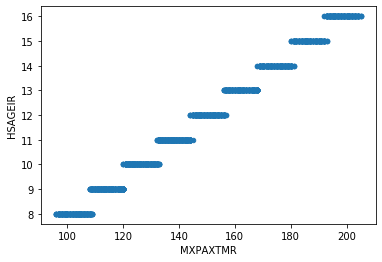

In [4964]:
youth_final.plot.scatter('MXPAXTMR','HSAGEIR')

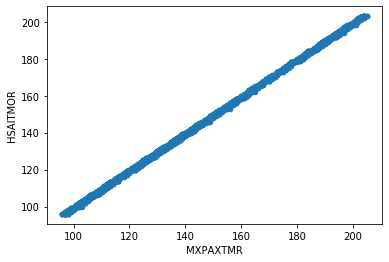

In [4965]:
youth_final.plot.scatter('MXPAXTMR', 'HSAITMOR')

In [4966]:
youth_final.head(2)

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,HYG2,HYG4,HYG7,HYG8,HYG12,HSAITMOR,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,2.0,2.0,NaN,2,2,196,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,0.0,0.0,0.0,16.0,2.0,NaN,NaN,NaN,1012.0,5.0,5999.0,2252.0,3132.0,3496.0,3508.0,3510.0,3343.0,1713.0,1.0,4.0,17:55,7.0,22.0,2.0,13749.61,197.0,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,2.0,2.0,NaN,2,2,198,2.0,2.0,2.0,2.0,2.0,4.0,2.0,NaN,NaN,0.0,0.0,16.0,2.0,NaN,NaN,NaN,1013.0,5.0,8577.0,3128.0,4406.0,5117.0,5117.0,5119.0,4541.0,2431.0,1.0,4.0,17:54,8.0,20.0,1.0,1792.14,200.0,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN


After all of the exclusions, the youth_final dataframe has 2812 entries.

In [4967]:
youth.cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
682,ICD-9-CM code-9th,HYK11AO,2087,2092.0,6
683,For how long been taking (days)-9th,HYK12SO,2093,2097.0,5
684,Main respondents relationship to SP,HYM1,2098,2099.0,2
685,Was SP present during any of interview,HYM2,2100,NaN,1


## Reviewing adult file

In [4968]:
cols = nh.cols
cols

,description,variable,position,end position,length
0,Sequence number,SEQN,1,5.0,5
1,Family sequence number,DMPFSEQ,6,10.0,5
2,Examination/interview status,DMPSTAT,11,NaN,1
3,Race-ethnicity,DMARETHN,12,NaN,1
4,Race,DMARACER,13,NaN,1
...,...,...,...,...,...
1233,BP statement read to SP (years 5 and 6),HAZA12,3336,NaN,1
1234,Average K1 BP from household and MEC,HAZMNK1R,3337,3339.0,3
1235,Number of BP's used for average K1,HAZNOK1R,3340,3341.0,2
1236,Average K5 BP from household and MEC,HAZMNK5R,3342,3344.0,3


In [4969]:
cols[cols.description.str.contains('(?:smok|cig)')]

,description,variable,position,end position,length
259,Anyone living here smoke cigs in home,HFF1,1356,NaN,1
260,# persons who smoke cigarettes in home,HFF2R,1357,1358.0,2
261,Cigarettes per day person 1 smokes,HFF3A,1359,1361.0,3
262,Cigarettes per day person 2 smokes,HFF3B,1362,1364.0,3
263,Cigarettes per day person 3 smokes,HFF3C,1365,1367.0,3
264,Cigarettes per day person 4 smokes,HFF3D,1368,1370.0,3
265,Cigarettes per day person 5 smokes,HFF3E,1371,1373.0,3
266,Cigarettes per day person 6 smokes,HFF3F,1374,1376.0,3
419,Doctor told stop smoking for HBP,HAE4D3,1606,NaN,1
428,Now quit smoking for high blood pressure,HAE5D3,1615,NaN,1


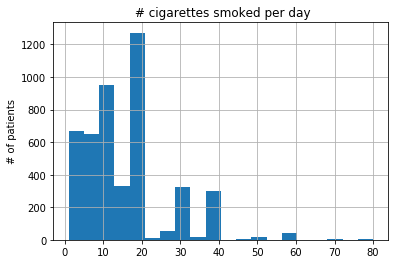

In [4970]:
nh.hist_amount('HAR4S');

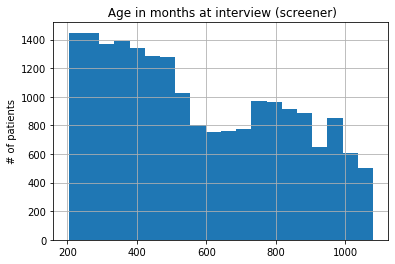

In [4971]:
nh.hist_amount('HSAITMOR',outliers=1200);

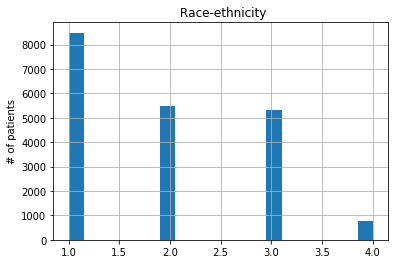

In [4972]:
nh.hist_amount('DMARETHN', outliers=25);

In [4973]:
cols[cols.description.str.contains('weight|pounds') & ~cols.description.str.contains('(sample|interview|weighting|exam)')]

/usr/local/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,description,variable,position,end position,length
210,Mother's weight calculated in pounds,HFC2S,1300,NaN,1
212,Father's weight calculated in pounds,HFC4S,1302,NaN,1
414,Doctor told control/lose weight for HBP,HAE4B,1601,NaN,1
424,Now controlling or losing weight for HBP,HAE5B,1611,NaN,1
435,Doctor told lose weight for HBC,HAE8B,1622,NaN,1
439,Now losing weight to lower cholesterol,HAE9B,1626,NaN,1
444,"On own for HBC, controlled/lost weight",HAE11B,1631,NaN,1
599,Difficulty lifting or carrying 10 pounds,HAH4,1807,NaN,1
705,Consider self over/under/right weight,HAM11,1964,NaN,1
707,Tried to lose weight in past 12 months,HAM13,1966,NaN,1


In [4974]:
cols[cols.description.str.contains('stand') ]

,description,variable,position,end position,length
450,If stand still is chest pain relieved,HAF5,1637,NaN,1
466,Leg pain begin while stand still/sitting,HAF15,1658,NaN,1
472,Is leg pain relieved if you stand still,HAF21,1664,NaN,1
478,Problem with ability to speak/understand,HAF27,1670,NaN,1
604,Difficulty standing from armless chair,HAH9,1812,NaN,1


Test Markdown

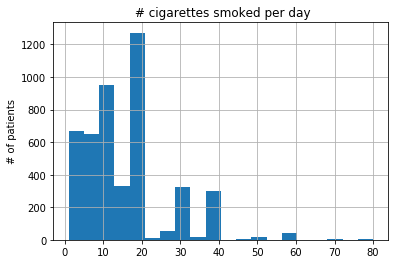

In [4975]:
nh.hist_amount('HAR4S');

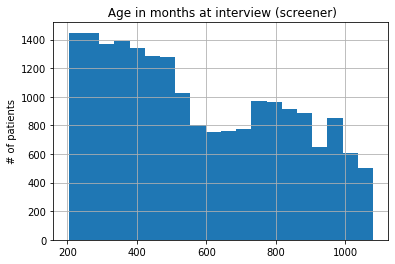

In [4976]:
nh.hist_amount('HSAITMOR',outliers=1200);

## Now analyze adult_final

In [4977]:
adult_final.head()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,21,2,NaN,NaN,261,NaN,2.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,21.0,2.0,NaN,NaN,NaN,1008.0,5.0,10513.0,3576.0,4640.0,5650.0,5884.0,5988.0,4085.0,1230.0,1.0,4.0,09:25,11.0,22.0,1.0,1735.14,262.0,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,32,2,NaN,NaN,384,NaN,2.0,2.0,2.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,32.0,2.0,NaN,NaN,NaN,1008.0,5.0,9205.0,2545.0,3089.0,3523.0,3535.0,3536.0,3722.0,1303.0,1.0,4.0,17:43,9.0,24.0,2.0,1725.01,384.0,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
52,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,50,2,NaN,NaN,602,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,50.0,2.0,NaN,NaN,NaN,1012.0,5.0,11424.0,3781.0,4658.0,5104.0,5301.0,5514.0,5684.0,1868.0,1.0,4.0,09:24,13.0,21.0,1.0,1398.57,603.0,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,19,2,NaN,NaN,235,NaN,2.0,2.0,2.0,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN,1012.0,8.0,9183.0,2986.0,3651.0,3899.0,3981.0,4009.0,5075.0,2496.0,1.0,4.0,14:10,8.0,24.0,2.0,4368.57,236.0,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
84,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,23,2,NaN,NaN,280,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,23.0,2.0,NaN,NaN,NaN,1604.0,5.0,9885.0,2729.0,3147.0,3486.0,3489.0,3490.0,4916.0,1641.0,1.0,4.0,18:12,10.0,21.0,2.0,2069.97,280.0,157.0,82.1,72.45,2,2.0,3.0,280.0,NaN,NaN,NaN


In [4978]:
adult_final[adult_final.SPPFEV1==8888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [4979]:
adult_final[adult_final.SPPFEV3==88888]
# this shows rows with 88888 in SPPFEV3 - 45, 2518, 3216, 5167 etc
# Then want replace with NaN

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


after running replace there are no longer FEV3 of 88888

In [4980]:
adult_final['SPPFEV3'].isnull().sum()

0

In [4981]:
adult_final[adult_final.SPPFEV3==88888]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [4982]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
count,5073.0,5073.0,5073.000000,5073.0,5073.0,5073.000000,5073.000000,5073.00000,5073.000000,5073.0,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.0,0.0,0.0,5073.000000,0.0,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,0.0,0.0,0.0,0.0,0.0,5073.000000,5073.0,0.0,0.0,0.0,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,0.0,0.0,0.0
mean,2.0,2.0,2.003548,2.0,2.0,2.001183,1.980879,2.00138,2.002365,2.0,2.001183,2.020106,1.354425,2.005519,2.307707,1.626848,39.372955,2.0,NaN,NaN,479.773507,NaN,2.186872,2.185689,2.185098,2.044155,2.151390,5.582101,NaN,NaN,NaN,NaN,NaN,39.372955,2.0,NaN,NaN,NaN,1222.888429,6.206978,7446.038439,2487.747487,3140.096393,3618.102306,3742.666667,3812.080032,3327.499704,1230.763651,1.001183,3.848610,9.463434,23.479204,1.626848,9507.961541,478.851370,165.459905,1486.970333,1649.413116,1.354425,2.005519,2.307707,479.773507,NaN,NaN,NaN
std,0.0,0.0,0.145879,0.0,0.0,0.084240,0.172627,0.09828,0.119122,0.0,0.084240,0.358523,0.525896,0.828781,0.951575,0.483690,19.004432,0.0,NaN,NaN,264.284355,NaN,1.042364,1.039166,1.039556,1.119806,1.061007,1.503155,NaN,NaN,NaN,NaN,NaN,19.004432,0.0,NaN,NaN,NaN,750.903984,1.609482,2195.915530,683.952284,898.768430,1034.974122,1047.826091,1048.486978,1339.473637,734.707525,0.059561,0.656761,3.864459,1.746676,0.483690,12734.777498,227.985088,9.798107,11064.291529,37407.413588,0.525896,0.828781,0.951575,264.284355,NaN,NaN,NaN
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,NaN,NaN,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,668.000000,342.000000,624.000000,738.000000,738.000000,740.000000,243.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,66.300000,32.000000,1.000000,1.000000,1.000000,204.000000,NaN,NaN,NaN
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,24.000000,2.0,NaN,NaN,292.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,24.000000,2.0,NaN,NaN,NaN,1010.000000,5.000000,5966.000000,2042.000000,2528.000000,2911.000000,3026.000000,3098.000000,2391.000000,659.000000,1.000000,4.000000,7.000000,23.000000,1.000000,2151.830000,293.000000,158.300000,83.300000,60.500000,1.000000,1.000000,1.000000,292.000000,NaN,NaN,NaN
50%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,34.000000,2.0,NaN,NaN,412.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,34.000000,2.0,NaN,NaN,NaN,1015.000000,5.000000,7236.000000,2448.000000,3087.000000,3521.000000,3629.000000,3687.000000,3300.000000,1155.000000,1.000000,4.000000,9.000000,23.000000,2.000000,4002.180000,413.000000,164.800000,86.500000,69.950000,1.000000,2.000000,3.000000,412.000000,NaN,NaN,NaN
75%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,52.000000,2.0,NaN,NaN,625.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,6.00000

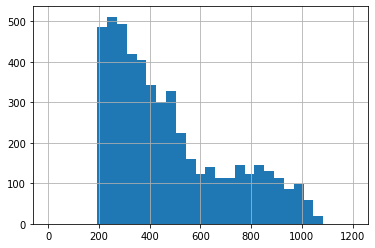

In [4983]:
adult_final.HSAITMOR.hist(bins='auto', range=(0,1200))

# change bad/blank data to NaN in adult_final then youth_final

from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  SPPFEF75 1832 with 8888
  HSAITMOR 10 with 9999
  
  mapping = {8888: np.nan)
  
  adult_final.update_where( 
      (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
  )
  
  Also need HSAITMOR_exam with 9999
  


In [4984]:

(adult_final.update_where( (adult_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (adult_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (adult_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (adult_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (adult_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (adult_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (adult_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (adult_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,21,2,NaN,NaN,261.0,NaN,2.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,21.0,2.0,NaN,NaN,NaN,1008.0,5.0,10513.0,3576.0,4640.0,5650.0,5884.0,5988.0,4085.0,1230.0,1.0,4.0,09:25,11.0,22.0,1.0,1735.14,262.0,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN
4,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,32,2,NaN,NaN,384.0,NaN,2.0,2.0,2.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,32.0,2.0,NaN,NaN,NaN,1008.0,5.0,9205.0,2545.0,3089.0,3523.0,3535.0,3536.0,3722.0,1303.0,1.0,4.0,17:43,9.0,24.0,2.0,1725.01,384.0,162.2,86.1,61.65,1,3.0,1.0,384.0,NaN,NaN,NaN
52,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,50,2,NaN,NaN,602.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,50.0,2.0,NaN,NaN,NaN,1012.0,5.0,11424.0,3781.0,4658.0,5104.0,5301.0,5514.0,5684.0,1868.0,1.0,4.0,09:24,13.0,21.0,1.0,1398.57,603.0,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN
60,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,19,2,NaN,NaN,235.0,NaN,2.0,2.0,2.0,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN,1012.0,8.0,9183.0,2986.0,3651.0,3899.0,3981.0,4009.0,5075.0,2496.0,1.0,4.0,14:10,8.0,24.0,2.0,4368.57,236.0,175.3,89.3,74.20,2,2.0,3.0,235.0,NaN,NaN,NaN
84,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,23,2,NaN,NaN,280.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,23.0,2.0,NaN,NaN,NaN,1604.0,5.0,9885.0,2729.0,3147.0,3486.0,3489.0,3490.0,4916.0,1641.0,1.0,4.0,18:12,10.0,21.0,2.0,2069.97,280.0,157.0,82.1,72.45,2,2.0,3.0,280.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53558,2,2,2,2,2,2,2,2,2,2,2,2,1,1,3,2,55,2,NaN,NaN,663.0,NaN,2.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,55.0,2.0,NaN,NaN,NaN,1017.0,5.0,6688.0,2223.0,2626.0,2886.0,2981.0,3016.0,3626.0,1279.0,1.0,4.0,09:48,8.0,22.0,2.0,9519.51,664.0,163.1,83.3,64.10,1,1.0,3.0,663.0,NaN,NaN,NaN
53567,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,1,36,2,NaN,NaN,432.0,NaN,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,36.0,2.0,NaN,NaN,NaN,1011.0,4.0,8860.0,2797.0,3348.0,3699.0,3800.0,3841.0,4043.0,1268.0,1.0,4.0,13:34,9.0,20.0,1.0,1953.48,433.0,158.7,84.4,74.55,1,3.0,1.0,432.0,NaN,NaN,NaN
53592,2,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,19,2,NaN,NaN,235.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,19.0,2.0,NaN,NaN,NaN,1018.0,5.0,7425.0,2771.0,3642.0,3831.0,3860.0,3862.0,4624.0,2695.0,1.0,4.0,13:44,7.0,25.0,2.0,1195.42,236.0,166.8,85.5,53.20,1,3.0,1.0,235.0,NaN,NaN,NaN


In [4985]:
(youth_final.update_where( (youth_final['SPPFEV3'] == 88888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV6'] == 88888), 'SPPFEV6',np.nan)
.update_where( (youth_final['SPPFVC'] == 88888), 'SPPFVC',np.nan)
.update_where( (youth_final['SPPMMEF'] == 88888), 'SPPMMEF',np.nan)
.update_where( (youth_final['SPPEXPIR'] == 88), 'SPPEXPIR',np.nan)
.update_where( (youth_final['SPPFEF75'] == 8888), 'SPPFEV3',np.nan)
.update_where( (youth_final['SPPFEV05'] == 8888), 'SPPFEV05',np.nan)
.update_where( (youth_final['SPPFEV1'] == 8888), 'SPPFEV1',np.nan)
.update_where( (youth_final['HSAITMOR'] == 9999), 'HSAITMOR',np.nan)
) 

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,HYG2,HYG4,HYG7,HYG8,HYG12,HSAITMOR,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
14,2,2,2,16,2,1,1,3,NaN,NaN,2.0,2.0,NaN,2,2,196.0,2.0,2.0,2.0,2.0,2.0,4.0,1.0,2.0,0.0,0.0,0.0,16.0,2.0,NaN,NaN,NaN,1012.0,5.0,5999.0,2252.0,3132.0,3496.0,3508.0,3510.0,3343.0,1713.0,1.0,4.0,17:55,7.0,22.0,2.0,13749.61,197.0,166.9,87.0,47.50,1,1.0,3.0,196.0,NaN,NaN,NaN
16,2,2,1,16,2,1,3,1,NaN,NaN,2.0,2.0,NaN,2,2,198.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,NaN,NaN,0.0,0.0,16.0,2.0,NaN,NaN,NaN,1013.0,5.0,8577.0,3128.0,4406.0,5117.0,5117.0,5119.0,4541.0,2431.0,1.0,4.0,17:54,8.0,20.0,1.0,1792.14,200.0,167.6,89.2,62.65,1,3.0,1.0,198.0,NaN,NaN,NaN
20,2,2,2,10,2,1,1,3,NaN,NaN,NaN,NaN,NaN,2,2,127.0,2.0,2.0,2.0,2.0,2.0,9.0,2.0,NaN,NaN,0.0,0.0,10.0,2.0,NaN,NaN,NaN,1012.0,9.0,4820.0,1686.0,2214.0,2493.0,2493.0,2494.0,2469.0,1158.0,1.0,4.0,09:41,8.0,23.0,2.0,7802.53,127.0,148.0,75.5,36.15,1,1.0,3.0,127.0,NaN,NaN,NaN
30,2,2,2,11,2,1,3,1,NaN,NaN,NaN,NaN,NaN,2,2,143.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,NaN,NaN,0.0,0.0,11.0,2.0,NaN,NaN,NaN,1008.0,6.0,7808.0,2547.0,2928.0,3079.0,3088.0,3176.0,4887.0,1883.0,1.0,4.0,09:40,7.0,24.0,2.0,7008.23,144.0,156.0,88888.0,46.67,1,3.0,1.0,143.0,NaN,NaN,NaN
33,2,2,2,14,2,1,3,1,NaN,NaN,2.0,2.0,NaN,2,2,178.0,2.0,2.0,2.0,2.0,2.0,5.0,1.0,2.0,0.0,0.0,0.0,14.0,2.0,NaN,NaN,NaN,1501.0,5.0,6778.0,2362.0,3360.0,3939.0,4015.0,4020.0,3116.0,1730.0,1.0,4.0,10:22,8.0,24.0,2.0,5777.61,179.0,164.6,84.9,56.00,1,3.0,1.0,178.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53566,2,2,1,10,2,2,2,3,NaN,NaN,NaN,NaN,NaN,2,2,131.0,2.0,2.0,2.0,2.0,2.0,7.0,2.0,NaN,NaN,0.0,0.0,10.0,2.0,NaN,NaN,NaN,1023.0,7.0,3828.0,1507.0,1918.0,2073.0,2082.0,2104.0,2535.0,1222.0,1.0,4.0,17:47,10.0,26.0,1.0,2007.33,133.0,146.0,70.5,42.50,2,2.0,3.0,131.0,NaN,NaN,NaN
53576,2,2,2,10,2,2,2,3,NaN,NaN,NaN,NaN,NaN,2,2,129.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,NaN,NaN,0.0,0.0,10.0,2.0,NaN,NaN,NaN,1013.0,6.0,4283.0,1501.0,1885.0,2078.0,2078.0,2079.0,2285.0,972.0,1.0,4.0,08:56,4.0,23.0,2.0,2494.14,130.0,146.6,74.6,38.80,2,2.0,3.0,129.0,NaN,NaN,NaN
53579,2,2,1,15,2,2,2,3,NaN,NaN,2.0,2.0,NaN,2,2,181.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,NaN,NaN,0.0,0.0,15.0,2.0,NaN,NaN,NaN,1011.0,5.0,9920.0,3343.0,4132.0,4264.0,4264.0,4266.0,5959.0,3231.0,1.0,4.0,10:22,6.0,25.0,1.0,3604.90,182.0,170.3,89.7,66.00,2,2.0,3.0,181.0,NaN,NaN,NaN


Determine how many NaN there are for each parameter;
There are 22 missing values in adult_final

In [4986]:

# print ("youth rows cols ", youth_final.shape)
print ("Youth FEV3 ", youth_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", youth_final['SPPFEV6'].isnull().sum(),
       " FVC ", youth_final['SPPFVC'].isnull().sum(),
       " MMEF ", youth_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", youth_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", youth_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", youth_final['SPPFEV05'].isnull().sum())
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum()
      )

Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0
Adult FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0


prior to deleting null rows 
adult rows cols  (4925, 73)
Adult FEV3  22  FEV6  22  FVC  0  MMEF  22  EXPIR  5  FEF75  0  FEV05  22  FEV1  0
youth rows cols  (2780, 67)
Youth FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0

Now remove the adult rows which have null values in FEV3 and see if that clears all the rest of NaN
When do that says is 4903, which is 22 less, but when print adult_final back to 4925

In [4987]:
adult_final = adult_final.dropna(subset=['SPPFEV3'])

Need also drop those with HSAITMOR that are null

In [4988]:
adult_final = adult_final.dropna(subset=['HSAITMOR'])

In [4989]:
print ("adult rows cols ",adult_final.shape)
print ("Adult FEV3 ", adult_final['SPPFEV3'].isnull().sum(), 
       " FEV6 ", adult_final['SPPFEV6'].isnull().sum(),
       " FVC ", adult_final['SPPFVC'].isnull().sum(),
       " MMEF ", adult_final['SPPMMEF'].isnull().sum(),
       " EXPIR ", adult_final['SPPEXPIR'].isnull().sum(),
       " FEF75 ", adult_final['SPPFEF75'].isnull().sum(),
       " FEV05 ", adult_final['SPPFEV05'].isnull().sum(),
       " FEV1 ", adult_final['SPPFEV1'].isnull().sum(),
       " HSAITMOR ", adult_final['HSAITMOR'].isnull().sum()
      )

adult rows cols  (5072, 66)
Adult FEV3  0  FEV6  0  FVC  0  MMEF  0  EXPIR  0  FEF75  0  FEV05  0  FEV1  0  HSAITMOR  0


In [4990]:
youth_final.shape

(2779, 60)

Now change blank data (8888 or 88888) to NaN
for variables 
Example below creates new df wind2 from wind
mapping = {-9999.0: np.nan}
wind2 = (
    wind
    .find_replace(
        usgs_pr_id=mapping,
        p_tnum=mapping,
        p_cap=mapping,
        t_cap=mapping,
        t_hh=mapping,
        t_rd=mapping,
        t_rsa=mapping,
        t_ttlh=mapping,
    )
)
wind2.head()

Example below replaces data with nan
(
    wind.update_where(
        (wind['p_year'] < 1887) | (wind['p_year'] > 2018), 'p_year', np.nan
    )
    .update_where((wind['t_hh'] <= 0) | (wind['t_hh'] >= 1000), 't_hh', np.nan)
    .update_where((wind['xlong'] < -161.76) | (wind['xlong'] > -68.01), 'xlong', np.nan)
);
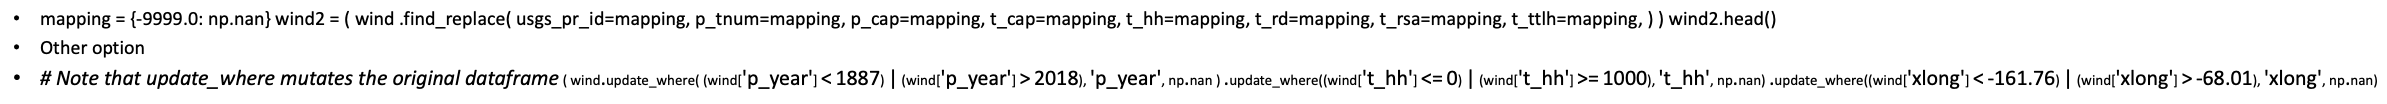

## Create new fields in adult_final and youth_final

Create new fields (XoY = X/Y) in youth_final and adult_final

In [4991]:
oldvariables = [ 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF', 'SPPFEF75', 'SPPEXPIR']

## Create new variables in adult_final final and youth_final
including nonratio

newvariables = ['FEV1OFVC', 'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFVC', 'FEV6OFVC']

def createvariables(df):
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC
    return

In [7305]:
def createvariables(df):
    df['FEF75OFVC']= df.SPPFEF75 / df.SPPFVC * 100
    df['FEF75OPEFR']= df.SPPFEF75 / df.SPPPEAK * 100
    df['FEV1OFVC'] = df.SPPFEV1 / df.SPPFVC * 100
    df['FEV1OFEV3']= df.SPPFEV1 / df.SPPFEV3 * 100
    df['FEV1OFEV6']= df.SPPFEV1 / df.SPPFEV6 * 100
    df['PEFROFVC'] = df.SPPPEAK / df.SPPFVC
    df['PEFROFEV6']= df.SPPPEAK / df.SPPFEV6
    df['PEFROFEV1'] = df.SPPPEAK / df.SPPFEV1
    df['FEV3OFEV6'] = df.SPPFEV3 / df.SPPFEV6 * 100
    df['FEV3OFVC'] = df.SPPFEV3 / df.SPPFVC * 100
    df['FEV6OFVC'] = df.SPPFEV6 / df.SPPFVC * 100
    df['MMEFOPEFR'] = df.SPPMMEF / df.SPPPEAK * 100
    df['MMEFOFVC'] = df.SPPMMEF / df.SPPFVC
    df['FEV05OFEV3'] = df.SPPFEV05 / df.SPPFEV3 * 100
    df['FEV05OFVC'] = df.SPPFEV05 / df.SPPFVC * 100
    df['FEV05'] = df.SPPFEV05 / 1000
    df['FEV1'] = df.SPPFEV1 / 1000
    df['FEV3'] = df.SPPFEV3 / 1000
    df['FEV6'] = df.SPPFEV6 / 1000
    df['FVC'] = df.SPPFVC / 1000
    df['PEFR'] = df.SPPPEAK / 1000
    df['MMEF'] = df.SPPMMEF / 1000 
    df['FEF75'] = df.SPPFEF75 / 1000
    df['FEV05'] = df.SPPFEV05 / 1000
    df['EXPIR'] = df.SPPEXPIR
    return
    

createvariables(adult_final) then youth_final

In [7306]:
createvariables(adult_final)

In [7307]:
createvariables(youth_final)

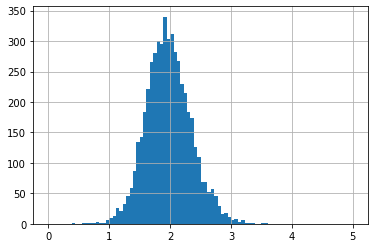

In [7308]:
adult_final.PEFROFVC.hist(bins='auto', range=(0,5))

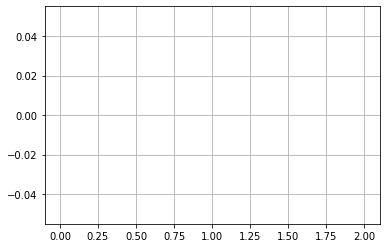

In [7309]:
adult_final.MMEFOPEFR.hist(bins='auto', range=(0,2))

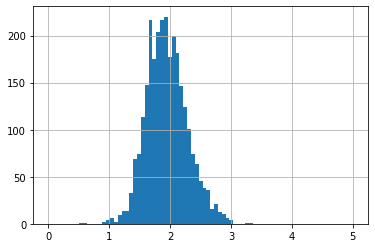

In [7310]:
youth_final.PEFROFVC.hist(bins='auto', range=(0,5))

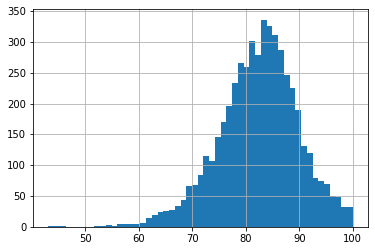

In [7311]:
adult_final.FEV1OFVC.hist(bins='auto')

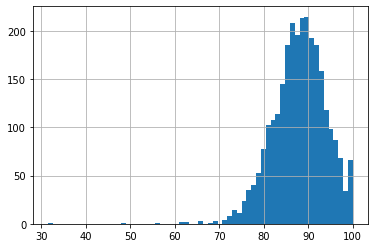

In [7312]:
youth_final.FEV1OFVC.hist(bins='auto')

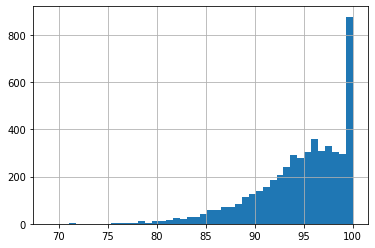

In [7313]:
adult_final.FEV3OFVC.hist(bins='auto')

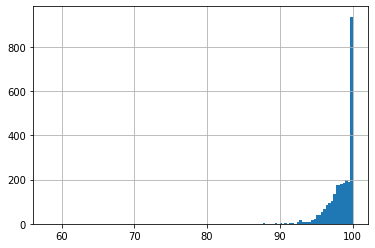

In [7314]:
youth_final.FEV3OFVC.hist(bins='auto')

In [7315]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR
count,5072.0,5072.0,5072.000000,5072.0,5072.0,5072.000000,5072.000000,5072.00000,5072.000000,5072.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.0,0.0,0.0,5072.000000,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,0.0,0.0,0.0,0.0,0.0,5072.000000,5072.0,0.0,0.0,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,0.0,0.0,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000
mean,2.0,2.0,2.003549,2.0,2.0,2.001183,1.980875,2.00138,2.002366,2.0,2.001183,2.020110,1.354298,2.005521,2.307571,1.626972,39.368888,2.0,NaN,NaN,477.896688,NaN,2.186909,2.185726,2.185134,2.044361,2.151617,5.581033,NaN,NaN,NaN,NaN,NaN,39.368888,2.0,NaN,NaN,NaN,1222.833399,6.206033,7446.075315,2487.741522,3140.080047,3618.051065,3742.540812,3811.944992,3327.735607,1230.897279,1.001183,3.848580,9.462934,23.478904,1.626972,9509.350414,478.802642,165.459838,1487.246767,1649.725728,1.354298,2.005521,2.307571,477.896688,NaN,NaN,NaN,82.329550,86.835001,83.870744,1.973390,2.012040,2.397811,96.499212,94.676906,98.061877,44.650552,0.877635,3.140080,3.618051,3.742541,7.446075,3.327736,1.230897,65.623766,2.487742,3.811945,9.462934,69.234718,32.102933,16.442006
std,0.0,0.0,0.145894,0.0,0.0,0.084248,0.172643,0.09829,0.119133,0.0,0.084248,0.358558,0.525869,0.828863,0.951619,0.483657,19.004098,0.0,NaN,NaN,228.006757,NaN,1.042464,1.039265,1.039655,1.119820,1.060988,1.501376,NaN,NaN,NaN,NaN,NaN,19.004098,0.0,NaN,NaN,NaN,750.967789,1.608233,2196.130465,684.019587,898.856290,1035.069729,1047.891054,1048.546233,1339.500305,734.718307,0.059567,0.656823,3.864676,1.746718,0.483657,12735.648830,227.981145,9.799072,11065.364893,37411.095146,0.525869,0.828863,0.951619,228.006757,NaN,NaN,NaN,7.476514,4.914946,6.321382,0.369559,0.371278,0.401884,2.646665,4.626367,2.570017,13.518111,0.302111,0.898856,1.035070,1.047891,2.196130,1.339500,0.734718,7.887579,0.684020,1.048546,3.864676,6.907059,18.285388,9.202403
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,NaN,NaN,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,668.000000,342.000000,624.000000,738.000000,738.000000,740.000000,243.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,66.300000,32.000000,1.000000,1.000000,1.000000,204.000000,NaN,NaN,NaN,43.076923,48.214286,44.204322,0.437173,0.437459,0.989630,77.325581,68.923077,79.421852,7.407407,0.119059,0.624000,0.738000,0.738000,0.668000,0.243000,0.050000,22.382199,0.342000,0.740000,1.000000,24.428571,1.381597,0.786287
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.00000

In [7316]:
adult_final.BMPHT.std()

9.79907179981488

In [7317]:
adult_final.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR
count,5072.0,5072.0,5072.000000,5072.0,5072.0,5072.000000,5072.000000,5072.00000,5072.000000,5072.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.0,0.0,0.0,5072.000000,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,0.0,0.0,0.0,0.0,0.0,5072.000000,5072.0,0.0,0.0,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,0.0,0.0,0.0,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000,5072.000000
mean,2.0,2.0,2.003549,2.0,2.0,2.001183,1.980875,2.00138,2.002366,2.0,2.001183,2.020110,1.354298,2.005521,2.307571,1.626972,39.368888,2.0,NaN,NaN,477.896688,NaN,2.186909,2.185726,2.185134,2.044361,2.151617,5.581033,NaN,NaN,NaN,NaN,NaN,39.368888,2.0,NaN,NaN,NaN,1222.833399,6.206033,7446.075315,2487.741522,3140.080047,3618.051065,3742.540812,3811.944992,3327.735607,1230.897279,1.001183,3.848580,9.462934,23.478904,1.626972,9509.350414,478.802642,165.459838,1487.246767,1649.725728,1.354298,2.005521,2.307571,477.896688,NaN,NaN,NaN,82.329550,86.835001,83.870744,1.973390,2.012040,2.397811,96.499212,94.676906,98.061877,44.650552,0.877635,3.140080,3.618051,3.742541,7.446075,3.327736,1.230897,65.623766,2.487742,3.811945,9.462934,69.234718,32.102933,16.442006
std,0.0,0.0,0.145894,0.0,0.0,0.084248,0.172643,0.09829,0.119133,0.0,0.084248,0.358558,0.525869,0.828863,0.951619,0.483657,19.004098,0.0,NaN,NaN,228.006757,NaN,1.042464,1.039265,1.039655,1.119820,1.060988,1.501376,NaN,NaN,NaN,NaN,NaN,19.004098,0.0,NaN,NaN,NaN,750.967789,1.608233,2196.130465,684.019587,898.856290,1035.069729,1047.891054,1048.546233,1339.500305,734.718307,0.059567,0.656823,3.864676,1.746718,0.483657,12735.648830,227.981145,9.799072,11065.364893,37411.095146,0.525869,0.828863,0.951619,228.006757,NaN,NaN,NaN,7.476514,4.914946,6.321382,0.369559,0.371278,0.401884,2.646665,4.626367,2.570017,13.518111,0.302111,0.898856,1.035070,1.047891,2.196130,1.339500,0.734718,7.887579,0.684020,1.048546,3.864676,6.907059,18.285388,9.202403
min,2.0,2.0,2.000000,2.0,2.0,2.000000,1.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,17.000000,2.0,NaN,NaN,204.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,668.000000,342.000000,624.000000,738.000000,738.000000,740.000000,243.000000,50.000000,1.000000,1.000000,1.000000,14.000000,1.000000,225.930000,204.000000,131.700000,66.300000,32.000000,1.000000,1.000000,1.000000,204.000000,NaN,NaN,NaN,43.076923,48.214286,44.204322,0.437173,0.437459,0.989630,77.325581,68.923077,79.421852,7.407407,0.119059,0.624000,0.738000,0.738000,0.668000,0.243000,0.050000,22.382199,0.342000,0.740000,1.000000,24.428571,1.381597,0.786287
25%,2.0,2.0,2.000000,2.0,2.0,2.000000,2.000000,2.00000,2.000000,2.0,2.000000,2.000000,1.000000,1.000000,1.00000

In [7318]:
print (adult_final.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV3' 'FEV1OFEV6' 'PEFROFVC'
 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFEV6' 'FEV3OFVC' 'FEV6OFVC' 'MMEFOPEFR'
 'MMEFOFVC' 'FEV1' 'FEV3' 'FEV6' 'PEFR' 'MMEF' 'FEF75' 'FEV05OFVC' 'FEV05'
 'FVC' 'EXPIR' 'FEV05OFEV3' 'FEF75OFVC' 'FEF75OPEFR']


In [7319]:
print (youth_final.columns.values)

['HYE1G' 'HYE1H' 'HSSEX' 'HSAGEIR' 'HSAGEU' 'DMARACER' 'DMARETHN'
 'DMAETHNR' 'HXPAXTMR' 'HXPSESSR' 'HYG2' 'HYG4' 'HYG7' 'HYG8' 'HYG12'
 'HSAITMOR' 'SPPQ1' 'SPPQ2' 'SPPQ3' 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1'
 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B' 'HSAGEIR_exam' 'HSAGEU_exam'
 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2' 'SPPTECH1' 'SPPTRIAL'
 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6' 'SPPFVC' 'SPPMMEF'
 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR' 'SPPTEMP'
 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV3' 'FEV1OFEV6' 'PEFROFVC'
 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFEV6' 'FEV3OFVC' 'FEV6OFVC' 'MMEFOPEFR'
 'MMEFOFVC' 'FEV1' 'FEV3' 'FEV6' 'PEFR' 'MMEF' 'FEF75' 'FEV05OFVC' 'FEV05'
 'FVC' 'EXPIR' 'FEV05OFEV3' 'FEF75OFVC' 'FEF75OPEFR']


youth and adult has two MXPAXTMR

In [7320]:
youth_final.describe()

,HYE1G,HYE1H,HSSEX,HSAGEIR,HSAGEU,DMARACER,DMARETHN,DMAETHNR,HXPAXTMR,HXPSESSR,HYG2,HYG4,HYG7,HYG8,HYG12,HSAITMOR,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR
count,2779.0,2779.0,2779.000000,2779.000000,2779.0,2779.000000,2779.000000,2779.000000,0.0,0.0,1268.000000,1268.000000,292.000000,2779.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,364.000000,363.0,2779.0,2779.000000,2779.000000,2779.0,0.0,0.0,0.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,0.0,0.0,0.0,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000,2779.000000
mean,2.0,2.0,1.520331,11.549478,2.0,1.423174,2.097877,2.274559,NaN,NaN,2.033123,2.033123,26.976027,2.0,2.002159,144.059374,2.179201,2.179201,2.177762,1.966535,2.137100,6.225261,1.874415,2.035714,0.0,0.0,0.001799,11.549478,2.0,NaN,NaN,NaN,1203.910759,6.730838,5395.127384,1922.562433,2465.397625,2765.670025,2801.377114,2809.475711,2929.051098,1328.233537,1.005398,3.860741,6.503059,23.366679,1.520331,7168.467416,144.969773,150.412990,1131.901116,11561.221555,1.423174,2.097877,2.274559,144.059374,NaN,NaN,NaN,87.963854,89.351321,88.219346,1.946054,1.951705,2.207533,98.688473,98.393323,99.695892,54.527063,1.059390,2.465398,2.765670,2.801377,5.395127,2.929051,1.328234,69.068279,1.922562,2.809476,6.503059,70.148837,47.639367,24.666718
std,0.0,0.0,0.499676,2.485519,0.0,0.540760,0.786261,0.961743,NaN,NaN,0.444744,0.444744,147.234050,0.0,0.113817,29.997847,1.021503,1.021503,1.022459,1.134556,1.048288,1.754659,0.380959,0.482577,0.0,0.0,0.050165,2.485519,0.0,NaN,NaN,NaN,735.215924,1.805386,1724.882277,587.375293,782.607503,885.518907,892.039170,892.893113,1069.445510,625.266840,0.127160,0.631290,2.598577,1.511101,0.499676,9895.484513,30.031070,14.270978,9621.932221,100525.881670,0.540760,0.786261,0.961743,29.997847,NaN,NaN,NaN,5.975914,5.120141,5.818598,0.335535,0.335106,0.318400,1.564510,1.940881,0.750709,10.956238,0.274791,0.782608,0.885519,0.892039,1.724882,1.069446,0.625267,7.565261,0.587375,0.892893,2.598577,7.174856,17.640025,8.728152
min,2.0,2.0,1.000000,8.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,2.000000,2.000000,1.000000,2.0,2.000000,96.000000,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.0,0.0,0.000000,8.000000,2.0,NaN,NaN,NaN,1001.000000,2.000000,723.000000,334.000000,468.000000,734.000000,734.000000,736.000000,144.000000,77.000000,1.000000,1.000000,1.000000,16.000000,1.000000,214.250000,96.000000,115.000000,58.200000,18.250000,1.000000,1.000000,1.000000,96.000000,NaN,NaN,NaN,31.621622,52.848379,41.306267,0.516216,0.583065,1.172145,75.992939,58.175676,76.554054,18.848168,0.097297,0.468000,0.734000,0.734000,0.723000,0.144000,0.077000,22.567568,0.334000,0.736000,1.000000,30.148992,5.202703,4.288052
25%,2.0,2.0,1.000000,9.000000,2.0,1.000000,1.000000,1.000000,NaN,NaN,2.000000,2.000000,1.000000,2.0,2.000000,119.000000,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.000000,2.000000,0.0,0.0,0.000000,9.000000,2.0,NaN,NaN,NaN,1008.000000,5.0

Created other data bases to analyze

adult m20overb m20overcma f18overb f18overcma

In [7321]:
m20overb  = adult_final.query(('MXPAXTMR >= 240 & HSSEX == 1 & DMARETHN == 2'))
m20overcma  = adult_final.query(('MXPAXTMR >= 240 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overcma = adult_final.query(('MXPAXTMR >= 216 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN ==3)'))
f18overb = adult_final.query(('MXPAXTMR >= 216 & HSSEX == 2 & DMARETHN == 2 '))
m20overc  = adult_final.query(('MXPAXTMR >= 240 & HSSEX == 1 & DMARETHN == 1'))
m20overma  = adult_final.query(('MXPAXTMR >= 240 & HSSEX == 1 & DMARETHN == 3'))
f18overc = adult_final.query(('MXPAXTMR >= 216 & HSSEX == 2 & DMARETHN == 1 '))
f18overma = adult_final.query(('MXPAXTMR >= 216 & HSSEX == 2 & DMARETHN == 3 '))
# DMARETHN – 1 non-Hispanic white, 2 non-hispanic black, 3 Mexican American, 4 other

In [7322]:
f18overb.describe()

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR
count,957.0,957.0,957.000000,957.0,957.0,957.0,957.000000,957.0,957.000000,957.0,957.0,957.000000,957.0,957.0,957.0,957.0,957.000000,957.0,0.0,0.0,957.000000,0.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,0.0,0.0,0.0,0.0,0.0,957.000000,957.0,0.0,0.0,0.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.0,957.000000,957.000000,957.000000,957.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.0,957.0,957.0,957.000000,0.0,0.0,0.0,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,2.0,2.0,2.006270,2.0,2.0,2.0,1.978056,2.0,2.006270,2.0,2.0,2.013584,2.0,2.0,3.0,2.0,37.180773,2.0,NaN,NaN,451.739812,NaN,2.169279,2.169279,2.167189,1.994775,2.141066,5.884013,NaN,NaN,NaN,NaN,NaN,37.180773,2.0,NaN,NaN,NaN,1209.954023,6.580982,6507.408568,2100.802508,2596.403344,2949.336468,3042.385580,3090.070010,2952.672936,1076.009404,1.0,3.711599,8.810867,23.611285,2.0,4234.547910,452.643678,162.906374,1290.302194,1003.421818,2.0,2.0,3.0,451.739812,NaN,NaN,NaN,83.891003,87.977981,85.217290,2.123774,2.158382,2.531401,96.780666,95.230486,98.358807,45.065367,0.954824,2.596403,2.949336,3.042386,6.507409,2.952673,1.076009,68.087495,2.100803,3.090070,8.810867,71.408761,34.625141,16.444638
std,0.0,0.0,0.193952,0.0,0.0,0.0,0.146576,0.0,0.193952,0.0,0.0,0.297871,0.0,0.0,0.0,0.0,16.763358,0.0,NaN,NaN,201.141721,NaN,0.994008,0.994008,0.995413,1.091511,1.012452,1.667473,NaN,NaN,NaN,NaN,NaN,16.763358,0.0,NaN,NaN,NaN,664.790894,1.769386,1562.010483,475.911508,590.406904,650.479668,646.638698,638.461673,1135.021598,614.270300,0.0,0.884786,3.925132,1.569651,0.0,2865.350612,201.156623,6.394909,10285.026579,28731.261220,0.0,0.0,0.0,201.141721,NaN,NaN,NaN,7.236988,4.750512,6.196622,0.398068,0.397461,0.426348,2.678521,4.361287,2.360484,13.327176,0.325463,0.590407,0.650480,0.646639,1.562010,1.135022,0.614270,7.964998,0.475912,0.638462,3.925132,6.882337,19.162268,8.926879
min,2.0,2.0,2.000000,2.0,2.0,2.0,1.000000,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,3.0,2.0,17.000000,2.0,NaN,NaN,215.000000,NaN,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,17.000000,2.0,NaN,NaN,NaN,1001.000000,3.000000,1395.000000,614.000000,899.000000,1029.000000,1029.000000,1030.000000,272.000000,76.000000,1.0,1.000000,1.000000,14.000000,2.0,1035.280000,216.000000,136.400000,71.500000,35.350000,2.0,2.0,3.0,215.000000,NaN,NaN,NaN,53.934911,65.176975,56.369821,0.814485,0.843137,1.252341,77.325581,76.302083,83.115339,7.407407,0.141667,0.899000,1.029000,1.029000,1.395000,0.272000,0.076000,34.206128,0.614000,1.030000,1.000000,40.341656,2.792506,1.558800
25%,2.0,2.0,2.000000,2.0,2.0,2.0,2.000000,2.0,2.000000,2.0,2.0,2.000000,2.0,2.0,3.0,2.0,24.000000,2.0,NaN,NaN,289.000000,NaN,2.000000,2.000000,2.000000,2.000000,2.000000,5.000000,NaN,NaN,NaN,NaN,NaN,24.000000,2.0,NaN,NaN,NaN,1011.000000,5.000000,5500.000000,1788.000000,2201.000000,2548.000000,2634.000000,2670.000000,2132.000000,607.000000,1.0,4.000000,6.000000,23.000000,2.0,2513.810000,289.000000,158.400000,81.800000,

## Make dataframes mlt20 and flt18 for b, c, ma and cma combining adult final and youth final

In [7323]:
adult_final.shape

(5072, 90)

In [7324]:
youth_final.shape

(2779, 84)

In [7325]:
print (adult_final.columns)

Index(['HAR1', 'HAR23', 'HAR26', 'HAC1E', 'HAC1F', 'HAC1G', 'HAC1O', 'HAL6',
       'HAL10', 'HAL1', 'HAL3', 'HAL5', 'DMARACER', 'DMARETHN', 'DMAETHNR',
       'HSSEX', 'HSAGEIR', 'HSAGEU', 'HXPAXTMR', 'HXPSESSR', 'HSAITMOR',
       'HAR4S', 'SPPQ1', 'SPPQ2', 'SPPQ3', 'SPPQ4', 'SPPQ5', 'SPPMANEU',
       'MYPB1', 'MYPB3', 'MYPB11', 'MYPB27A', 'MYPB27B', 'HSAGEIR_exam',
       'HSAGEU_exam', 'HXPAXTMR_exam', 'HXPSESSR_exam', 'HXPEJ6A2', 'SPPTECH1',
       'SPPTRIAL', 'SPPPEAK', 'SPPFEV05', 'SPPFEV1', 'SPPFEV3', 'SPPFEV6',
       'SPPFVC', 'SPPMMEF', 'SPPFEF75', 'SPPTYPE', 'SPPREPRO', 'SPPTIME',
       'SPPEXPIR', 'SPPTEMP', 'HSSEX_exam', 'WTPFHX6', 'MXPAXTMR', 'BMPHT',
       'BMPSITHT', 'BMPWT', 'DMARACER_exam', 'DMARETHN_exam', 'DMAETHNR_exam',
       'HSAITMOR_exam', 'HXPG1', 'HXPG2A', 'HXPG2B', 'FEV1OFVC', 'FEV1OFEV3',
       'FEV1OFEV6', 'PEFROFVC', 'PEFROFEV6', 'PEFROFEV1', 'FEV3OFEV6',
       'FEV3OFVC', 'FEV6OFVC', 'MMEFOPEFR', 'MMEFOFVC', 'FEV1', 'FEV3', 'FEV6',
       'PEFR', 

In [7326]:
mlt20b = pd.concat([adult_final.query(('MXPAXTMR < 240 & HSSEX == 1 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 2'))])
mlt20cma = pd.concat([adult_final.query(('MXPAXTMR < 240 & HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 1 & (DMARETHN == 1 | DMARETHN == 3)'))])
flt18b = pd.concat([adult_final.query(('MXPAXTMR < 216 & HSSEX == 2 & DMARETHN == 2 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 2'))])
flt18cma = pd.concat([adult_final.query(('MXPAXTMR < 216 & HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3) ')), youth_final.query(('HSSEX == 2 & (DMARETHN == 1 | DMARETHN == 3)'))])
mlt20c = pd.concat([adult_final.query(('MXPAXTMR < 240 & HSSEX == 1 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 1'))])
mlt20ma = pd.concat([adult_final.query(('MXPAXTMR < 240 & HSSEX == 1 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 1 & DMARETHN == 3'))])
flt18c = pd.concat([adult_final.query(('MXPAXTMR < 216 & HSSEX == 2 & DMARETHN == 1 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 1'))])
flt18ma = pd.concat([adult_final.query(('MXPAXTMR < 216 & HSSEX == 2 & DMARETHN == 3 ')), youth_final.query(('HSSEX == 2 & DMARETHN == 3'))])

# Create data bases for all male/female cma, black for ratios

Groups for ratios
All male cma  mallcma = pd.concat([m20overcma, mlt20cma])
All male black  mallb = pd.concat([m20overb, mlt20b])
All female cma  fallcma = pd.concat([f18overcma, flt18cma])
All female black  fallb = pd.concat([f18overb, flt18b])
All male c  mallc = pd.concat([m20overc, mlt20c])
All male ma  mallma = pd.concat([m20overma, mlt20ma])
All female c  fallc = pd.concat([f18overc, flt18c])
All female ma  fallma = pd.concat([f18overma, flt18ma])

In [7327]:
mallcma = pd.concat([m20overcma, mlt20cma])
mallb = pd.concat([m20overb, mlt20b])
fallcma = pd.concat([f18overcma, flt18cma])
fallb = pd.concat([f18overb, flt18b])
mallc = pd.concat([m20overc, mlt20c])
mallma = pd.concat([m20overma, mlt20ma])
fallc = pd.concat([f18overc, flt18c])
fallma = pd.concat([f18overma, flt18ma])

## Check variable created

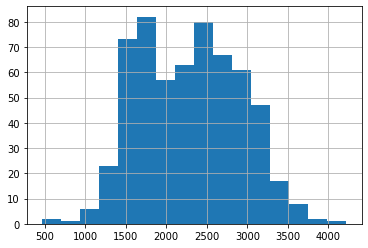

In [7328]:
flt18b.SPPFEV1.hist(bins='auto')

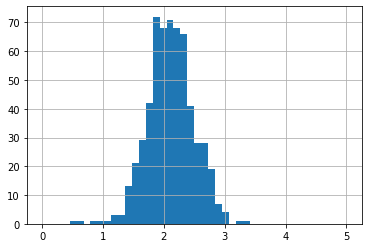

In [7329]:
flt18b.PEFROFVC.hist(bins='auto', range=(0,5))

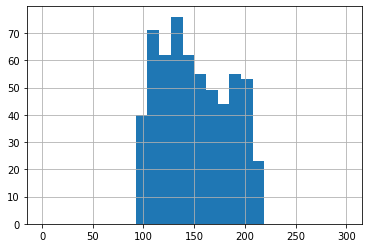

In [7330]:
flt18b.HSAITMOR.hist(bins='auto', range=(0,300))

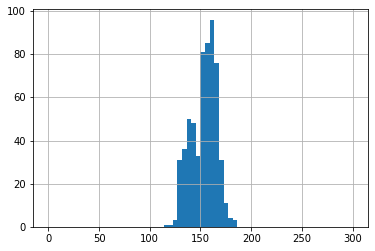

In [7331]:
flt18b.BMPHT.hist(bins='auto', range=(0,300))

# Frames to Analyze
arrange so in proper order

framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]

In [7332]:
framestoanalyze = [mlt20cma, m20overcma, mlt20b, m20overb, 
                   flt18cma,  f18overcma, flt18b, f18overb, 
                   mlt20c, m20overc, mlt20ma, m20overma, 
                   flt18c, f18overc, flt18ma, f18overma, 
                   mallcma, mallb, mallc, mallma,
                   fallcma, fallb, fallc, fallma]

# framesto analyze names

m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20ovecma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

In [7333]:
m20overb.name = 'm20overb'
m20overcma.name = 'm20overcma'
f18overb.name = 'f18overb'
f18overcma.name = 'f18overcma'
mlt20b.name = 'mlt20b'
mlt20cma.name = 'mlt20cma'
flt18b.name = 'flt18b'
flt18cma.name = 'flt18cma'
mallcma.name = 'mallcma'
mallb.name = 'mallb'
fallcma.name = 'fallcma'
fallb.name = 'fallb'
m20overc.name = 'm20overc'
m20overma.name = 'm20overma'
f18overc.name = 'f18overc'
f18overma.name = 'f18overma'
mlt20c.name = 'mlt20c'
mlt20ma.name = 'mlt20ma'
flt18c.name = 'flt18c'
flt18ma.name = 'flt18ma'
mallma.name = 'mallma'
mallc.name = 'mallc'
fallma.name = 'fallma'
fallc.name = 'fallc'

## Variables non-ratio

In [7334]:
# varsnonratio = [ 'SPPEXPIR','SPPFEF75', 'SPPFEV1', 'SPPFEV3', 'SPPFEV6', 'SPPFVC',  'SPPMMEF', 'SPPPEAK']
varsnonratio = [ 'EXPIR','FEF75', 'FEV05', 'FEV1', 'FEV3', 'FEV6', 'FVC',  'MMEF', 'PEFR']


In [7335]:
print (varsnonratio[0])

EXPIR


## Variables ratio

In [7336]:
varsratio= ['FEF75OFVC', 'FEF75OPEFR', 'FEV05OFEV3', 'FEV05OFVC', 'FEV1OFEV3',  'FEV1OFEV6', 'FEV1OFVC', 'FEV3OFEV6','FEV3OFVC', 
            'FEV6OFVC', 'MMEFOFVC', 'MMEFOPEFR', 'PEFROFEV1', 'PEFROFEV6', 'PEFROFVC']


## Now fit curves

using example in lmfit.github.io/lmfit-py/model.html

import matplotlib.pyplot as plt

In [7337]:
import matplotlib.pyplot as plt

## from sklearn.linear_model import LinearRegression

In [7338]:
from sklearn.linear_model import LinearRegression

# Linear Regression Age  linear_regage (data, y_var)

In [7339]:
# age = 'HSAGEIR'/12 - or age in months/12
def linear_regage(data, y_var):
    X = data['MXPAXTMR']/12  # to convert to year do months at exam
    X = np.array(X).reshape(-1, 1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ", ", lr.coef_, ", ", lr.score(X, y), ", ", data.loc[:,y_var].std(), ", ", data.loc[:,y_var].count())
 # now returns values rather than print - intercept, slope, R2, std, count
    return lr.intercept_, lr.coef_, lr.score(X, y),  data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [7340]:
for x in varsratio:
    print (x)

FEF75OFVC
FEF75OPEFR
FEV05OFEV3
FEV05OFVC
FEV1OFEV3
FEV1OFEV6
FEV1OFVC
FEV3OFEV6
FEV3OFVC
FEV6OFVC
MMEFOFVC
MMEFOPEFR
PEFROFEV1
PEFROFEV6
PEFROFVC


## For all frames, for all ratios to analyze, do regression vs age & save in resultsratioand index dfnvarn
## Table 4

print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation')
for y in framestoanalyze:
Save results in dataframe resultsratio

In [7890]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratio = pd.DataFrame(columns = column_names)
resultsratio.name = 'resultsratio'
print (resultsratio)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratio:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', round(intercept,3), ',', round(slope,4), ',', 
               round(r2,4), ',', round(std,3), ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratio = resultsratio.append(df2, ignore_index=True)    
print ('at end')
resultsratio.set_index('dfnvarn', inplace=True)
print (resultsratio)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dfnvarn, dataframe,  variable,        intercept,          slope,            R squared,         standard deviation,  count
mlt20cmaFEF75OFVC , mlt20cma , FEF75OFVC , 43.997 , 0.0596 , 0.0002 , 15.638 , 1019
mlt20cmaFEF75OPEFR , mlt20cma , FEF75OPEFR , 24.405 , 0.0162 , 0.0 , 8.179 , 1019
mlt20cmaFEV05OFEV3 , mlt20cma , FEV05OFEV3 , 71.878 , -0.3196 , 0.0249 , 6.627 , 1019
mlt20cmaFEV05OFVC , mlt20cma , FEV05OFVC , 70.074 , -0.2677 , 0.0159 , 6.948 , 1019
mlt20cmaFEV1OFEV3 , mlt20cma , FEV1OFEV3 , 89.603 , -0.115 , 0.0059 , 4.887 , 1019
mlt20cmaFEV1OFEV6 , mlt20cma , FEV1OFEV6 , 87.754 , -0.0665 , 0.0015 , 5.525 , 1019
mlt20cmaFEV1OFVC , mlt20cma , FEV1OFVC , 87.3 , -0.0513 , 0.0009 , 5.636 , 1019
mlt20cmaFEV3OFEV6 , mlt20cma , FEV3OFEV6 , 97.881 , 0.0536 , 0.0145 , 1.454 , 1019
mlt20cmaFEV3OFVC , mlt20cma , FEV3OFVC , 97.36 , 0.07

# regression for non-ratios height_age_reg(data, y_var)

In [7891]:
def height_age_reg(data, y_var):
# convert agemonths to years
    X_age = data['MXPAXTMR']/12
    X_age = np.array(X_age).reshape(-1, 1)
    X_age = np.hstack((X_age, X_age**2))
    X_height = data['BMPHT']**2
    X_height = np.array(X_height).reshape(-1, 1)
    X = np.concatenate((X_age, X_height), axis=1)
    y = data[y_var]
    lr = LinearRegression().fit(X, y)
        # do linear regression fit on X, y
 #   print(data.name, ", ",y_var, ", ",lr.intercept_, ",", lr.coef_, ",", lr.score(X, y), ",",  data.loc[:,y_var].std(), ",",  data.loc[:,y_var].count())
    return data.name, y_var, lr.intercept_, lr.coef_, lr.score(X, y), data.loc[:,y_var].std(), data.loc[:,y_var].count()

In [7892]:
for x in varsnonratio:
    print (x)

EXPIR
FEF75
FEV05
FEV1
FEV3
FEV6
FVC
MMEF
PEFR


# Create Resultsnonratio with all of regression results for all dataframes all nonratio variables

In [7893]:
# First initialize resultsratio dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "b1", "b2", "b3", "r2", "std", "count"]
# print (column_names)
resultsnonratio = pd.DataFrame(columns = column_names)
resultsnonratio.name = 'resultsnonratio'
print (resultsnonratio)
print ('Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
print ('dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsnonratio:
  #       print(y, " ", xx)
         reg = height_age_reg(y,xx)
         dbname, var, intercept, coef, r2, std, count = reg
         b1, b2, b3, = coef 
                  
         dfnvarn = y.name + xx
         print (dfnvarn, ',', dbname, ',', var, ',',round(intercept,5), ',',round(b1,5), ',',round(b2,7), ',',
                round(b3,8), ',',round(r2,5), ',',round(std,5), ',',count)
         #  Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]  
            
         df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          
         resultsnonratio = resultsnonratio.append(df2, ignore_index=True)
print ('at end')
resultsnonratio.set_index('dfnvarn', inplace=True)
print (resultsnonratio)            

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, b1, b2, b3, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height
dfnvarn, dataframe ,  variable,        intercept,   [b1. b2. b3]. ,            R squared,         standard deviation   count
mlt20cmaEXPIR , mlt20cma , EXPIR , 4.2507 , 0.23852 , -0.0027296 , 2.39e-06 , 0.04774 , 2.50577 , 1019
mlt20cmaFEF75 , mlt20cma , FEF75 , -0.16266 , -0.08964 , 0.0045808 , 8.45e-05 , 0.51921 , 0.74895 , 1019
mlt20cmaFEV05 , mlt20cma , FEV05 , -0.02278 , -0.09372 , 0.0061888 , 9.929e-05 , 0.86286 , 0.79308 , 1019
mlt20cmaFEV1 , mlt20cma , FEV1 , -0.12327 , -0.15548 , 0.0087919 , 0.00014659 , 0.89895 , 1.06123 , 1019
mlt20cmaFEV3 , mlt20cma , FEV3 , -0.03847 , -0.20932 , 0.0110769 , 0.00017218 , 0.90726 , 1.22065 , 1019
mlt20cmaFEV6 , mlt20cma , FEV6 , -0.0028 , -0.21192 , 0.0112363 , 0.00017284 , 0.90532 , 1.2311 , 1019
mlt20cmaFVC , mlt20cma , FVC , 0.01195 , -0.212

## ****** Now percent predicted - create variables for ratios first

In [7896]:
def createvarspp(df):
    vn = df.name + 'FEV05OFEV3'
    df['FEV05OFEV3PP'] = 100 * df.FEV05OFEV3 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'FEV05OFVC'
    df['FEV05OFVCPP'] = 100 * df.FEV05OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPP'] = 100 * df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'FEF75OFVC'
    df['FEF75OFVCPP'] = 100 * df.FEF75OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))  
    vn = df.name + 'FEF75OPEFR'
    df['FEF75OPEFRPP'] = 100 * df.FEF75OPEFR / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))  
    vn = df.name + 'FEV05OFVC'
    df['FEV05OFVCPP'] = 100 * df.FEV05OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))  
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV3'
    df['FEV1OFEV3PP']= 100 * df.FEV1OFEV3 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))

    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PP']= 100 * df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPP'] = 100 * df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6PP']= 100 * df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1PP'] = 100 * df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV3OFEV6'
    df['FEV3OFEV6PP'] = 100 * df.FEV3OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'FEV3OFVC'
    df['FEV3OFVCPP'] = 100 * df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPP'] = 100 * df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFOFVC'
    df['MMEFOFVCPP'] = 100 * df.MMEFOFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFOPEFR'
    df['MMEFOPEFRPP'] = 100 * df.MMEFOPEFR / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

For all dataframes, create ppvar values (shows caveat but works)

In [7897]:
for y in framestoanalyze:
    createvarspp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [7898]:
def createvarsPred(df):
    vn = df.name + 'FEF75OFVC'
    df['FEF75OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEF75OPEFR'
    df['FEF75OPEFRPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV1OFVC'
    df['FEV1OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV05OFEV3'
    df['FEV05OFEV3Pred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV05OFVC'
    df['FEV05OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

#    print (vn)
 #   vn = df.name + 'PEFROFVC'
 #   df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV1OFEV3'
    df['FEV1OFEV3Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'PEFROFVC'
    df['PEFROFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'PEFROFEV6'
    df['PEFROFEV6Pred']= (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'PEFROFEV1'
    df['PEFROFEV1Pred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV3OFEV6'
    df['FEV3OFEV6Pred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV3OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV6OFVC'
    df['FEV6OFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFOFVC'
    df['MMEFOFVCPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFOPEFR'
    df['MMEFOPEFRPred'] = (resultsratio.loc[vn, 'intercept'] + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))


In [7899]:
for y in framestoanalyze:
    createvarsPred(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [7900]:
print (m20overb.columns.values)

['HAR1' 'HAR23' 'HAR26' 'HAC1E' 'HAC1F' 'HAC1G' 'HAC1O' 'HAL6' 'HAL10'
 'HAL1' 'HAL3' 'HAL5' 'DMARACER' 'DMARETHN' 'DMAETHNR' 'HSSEX' 'HSAGEIR'
 'HSAGEU' 'HXPAXTMR' 'HXPSESSR' 'HSAITMOR' 'HAR4S' 'SPPQ1' 'SPPQ2' 'SPPQ3'
 'SPPQ4' 'SPPQ5' 'SPPMANEU' 'MYPB1' 'MYPB3' 'MYPB11' 'MYPB27A' 'MYPB27B'
 'HSAGEIR_exam' 'HSAGEU_exam' 'HXPAXTMR_exam' 'HXPSESSR_exam' 'HXPEJ6A2'
 'SPPTECH1' 'SPPTRIAL' 'SPPPEAK' 'SPPFEV05' 'SPPFEV1' 'SPPFEV3' 'SPPFEV6'
 'SPPFVC' 'SPPMMEF' 'SPPFEF75' 'SPPTYPE' 'SPPREPRO' 'SPPTIME' 'SPPEXPIR'
 'SPPTEMP' 'HSSEX_exam' 'WTPFHX6' 'MXPAXTMR' 'BMPHT' 'BMPSITHT' 'BMPWT'
 'DMARACER_exam' 'DMARETHN_exam' 'DMAETHNR_exam' 'HSAITMOR_exam' 'HXPG1'
 'HXPG2A' 'HXPG2B' 'FEV1OFVC' 'FEV1OFEV3' 'FEV1OFEV6' 'PEFROFVC'
 'PEFROFEV6' 'PEFROFEV1' 'FEV3OFEV6' 'FEV3OFVC' 'FEV6OFVC' 'MMEFOPEFR'
 'MMEFOFVC' 'FEV1' 'FEV3' 'FEV6' 'PEFR' 'MMEF' 'FEF75' 'FEV05OFVC' 'FEV05'
 'FVC' 'EXPIR' 'FEV05OFEV3' 'FEF75OFVC' 'FEF75OPEFR' 'FEV1OFVCPP'
 'FEF75OFVCPP' 'FEF75OPEFRPP' 'FEV05OFVCPP' 'FEV1OFEV3PP' 'FEV1OFE

Check can refer to resultsratio value

In [7901]:
print(resultsratio)

                      dfname         var  intercept     slope        r2  \
dfnvarn                                                                   
mlt20cmaFEF75OFVC   mlt20cma   FEF75OFVC  43.997043  0.059610  0.000155   
mlt20cmaFEF75OPEFR  mlt20cma  FEF75OPEFR  24.404570  0.016176  0.000042   
mlt20cmaFEV05OFEV3  mlt20cma  FEV05OFEV3  71.878072 -0.319622  0.024857   
mlt20cmaFEV05OFVC   mlt20cma   FEV05OFVC  70.074012 -0.267688  0.015863   
mlt20cmaFEV1OFEV3   mlt20cma   FEV1OFEV3  89.603159 -0.115008  0.005920   
...                      ...         ...        ...       ...       ...   
fallmaMMEFOFVC        fallma    MMEFOFVC   1.228693 -0.007390  0.200766   
fallmaMMEFOPEFR       fallma   MMEFOPEFR  64.696127 -0.390138  0.271009   
fallmaPEFROFEV1       fallma   PEFROFEV1   2.042195  0.006506  0.098032   
fallmaPEFROFEV6       fallma   PEFROFEV6   1.887790  0.001661  0.007330   
fallmaPEFROFVC        fallma    PEFROFVC   1.907593  0.000180  0.000088   

                        

In [7902]:
vn = 'm20overbFEV1OFVC'
print(resultsratio.loc[vn, 'intercept'] )

89.35850283626387


In [7903]:
print(resultsnonratio)

                 dfname    var  intercept        b1        b2        b3  \
dfnvarn                                                                   
mlt20cmaEXPIR  mlt20cma  EXPIR   4.250705  0.238521 -0.002730  0.000002   
mlt20cmaFEF75  mlt20cma  FEF75  -0.162655 -0.089642  0.004581  0.000084   
mlt20cmaFEV05  mlt20cma  FEV05  -0.022779 -0.093723  0.006189  0.000099   
mlt20cmaFEV1   mlt20cma   FEV1  -0.123267 -0.155483  0.008792  0.000147   
mlt20cmaFEV3   mlt20cma   FEV3  -0.038465 -0.209320  0.011077  0.000172   
...                 ...    ...        ...       ...       ...       ...   
fallmaFEV3       fallma   FEV3  -1.211661  0.029324 -0.000526  0.000170   
fallmaFEV6       fallma   FEV6  -1.257441  0.033674 -0.000553  0.000171   
fallmaFVC        fallma    FVC  -1.270163  0.035250 -0.000546  0.000170   
fallmaMMEF       fallma   MMEF  -0.382485  0.023652 -0.000646  0.000152   
fallmaPEFR       fallma   PEFR  -1.443157  0.083787 -0.001217  0.000270   

                     r2 

In [7904]:
vn = 'm20overbFEV1'
print(resultsnonratio.loc[vn, 'intercept'] )

0.8251704909398718


Now create PP Nonratio PP  FEV1PP, PEFRPP, FVCPP, FEV3PP, FEV6PP, MMEFPP, FEF75PP, EXPIRPP  from resultsnonratio

In [7905]:
resultsnonratio  # sometimes has not set dfnvarn as target

,dfname,var,intercept,b1,b2,b3,r2,std,count
dfnvarn,,,,,,,,,
mlt20cmaEXPIR,mlt20cma,EXPIR,4.250705,0.238521,-0.002730,0.000002,0.047742,2.505771,1019
mlt20cmaFEF75,mlt20cma,FEF75,-0.162655,-0.089642,0.004581,0.000084,0.519212,0.748954,1019
mlt20cmaFEV05,mlt20cma,FEV05,-0.022779,-0.093723,0.006189,0.000099,0.862858,0.793078,1019
mlt20cmaFEV1,mlt20cma,FEV1,-0.123267,-0.155483,0.008792,0.000147,0.898951,1.061234,1019
mlt20cmaFEV3,mlt20cma,FEV3,-0.038465,-0.209320,0.011077,0.000172,0.907262,1.220654,1019
...,...,...,...,...,...,...,...,...,...
fallmaFEV3,fallma,FEV3,-1.211661,0.029324,-0.000526,0.000170,0.700850,0.702037,1562
fallmaFEV6,fallma,FEV6,-1.257441,0.033674,-0.000553,0.000171,0.694852,0.710179,1562
fallmaFVC,fallma,FVC,-1.270163,0.035250,-0.000546,0.000170,0.686958,0.709138,1562


In [7906]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratiopp(df):
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PP'] = 100 * df.FEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV05'
    df['FEV05PP'] = 100 * df.FEV05 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPP'] =  100 * df.FVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'PEFR'
    df['PEFRPP'] = 100 * df.PEFR / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV3'
    df['FEV3PP'] = 100 * df.FEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PP'] = 100 * df.FEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR/ 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPP'] = 100 * df.MMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEF75'
    df['FEF75PP'] = 100 * df.FEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'EXPIR'
    df['EXPIRPP'] = 100 * df.EXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

Create predFVCmFEV6

In [7907]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarsnonratioPred(df):
    vn = df.name + 'FEV1'
    df['FEV1Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV05'
    df['FEV05Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'PEFR'
    df['PEFRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV3'
    df['FEV3Pred'] =  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEF75'
    df['FEF75Pred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'EXPIR'
    df['EXPIRPred'] = (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [7908]:

# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')

def createvarpredFVCmFEV6(df):
        vn = df.name + 'FVC'
        vnb = df.name + 'FEV6'
        df['predFVCmFEV6'] = (resultsnonratio.loc[vn, 'intercept'] 
                          + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                          + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                          + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT ) 
        - (resultsnonratio.loc[vnb, 'intercept'] 
                          + resultsnonratio.loc[vnb, 'b1'] * (df.MXPAXTMR / 12)  
                          + resultsnonratio.loc[vnb, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                          + resultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )
    


In [7909]:
resultsnonratio.describe()

,intercept,b1,b2,b3,r2,std
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,0.098325,0.033909,0.000333,0.000129,0.594591,1.267834
std,1.927275,0.177227,0.006179,0.000076,0.224327,0.884679
min,-4.567670,-0.391629,-0.033548,-0.000108,0.004053,0.448722
25%,-1.100910,-0.027427,-0.000849,0.000085,0.451255,0.713697
50%,-0.122592,0.014082,-0.000330,0.000138,0.640770,0.929064
75%,0.704769,0.062217,0.000074,0.000172,0.775998,1.374519
max,7.150709,1.058396,0.023371,0.000355,0.918735,4.076097


For all dataframes create varsnonratiopp and varsnonratioPred

In [7910]:
for y in framestoanalyze:
    print(y.name)
    createvarsnonratiopp(y)
    createvarsnonratioPred(y)
    

mlt20cma
mlt20cmaFEV1
m20overcma
m20overcmaFEV1
mlt20b
mlt20bFEV1
m20overb
m20overbFEV1
flt18cma
flt18cmaFEV1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

f18overcma
f18overcmaFEV1
flt18b
flt18bFEV1
f18overb
f18overbFEV1
mlt20c
mlt20cFEV1
m20overc
m20overcFEV1
mlt20ma
mlt20maFEV1
m20overma
m20overmaFEV1
flt18c
flt18cFEV1
f18overc
f18overcFEV1
flt18ma
flt18maFEV1
f18overma
f18overmaFEV1
mallcma
mallcmaFEV1
mallb
mallbFEV1
mallc
mallcFEV1
mallma
mallmaFEV1
fallcma
fallcmaFEV1
fallb
fallbFEV1
fallc
fallcFEV1
fallma
fallmaFEV1


In [7911]:
for y in framestoanalyze:
 #   print(y.name)
    createvarpredFVCmFEV6(y)
    

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


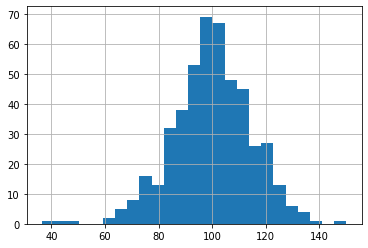

In [7912]:
m20overb.FEV1PP.hist(bins='auto')

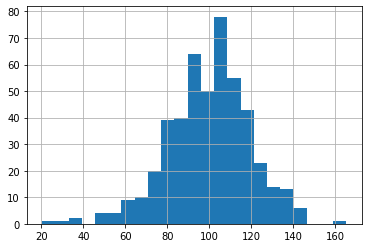

In [7913]:
m20overb.PEFRPP.hist(bins='auto')

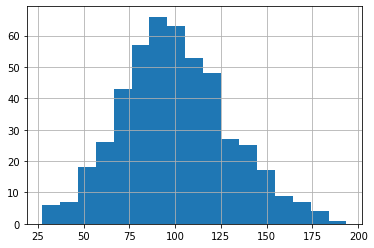

In [7914]:
m20overb.MMEFPP.hist(bins='auto')

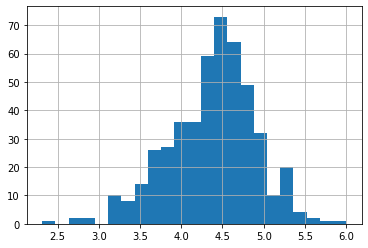

In [7915]:
m20overb.predFVCmFEV6.hist(bins='auto')

In [7916]:
m20overb.MMEFPP.describe()

count    477.000000
mean     100.045530
std       29.565351
min       27.320472
25%       80.107790
50%       97.874427
75%      118.790969
max      193.526496
Name: MMEFPP, dtype: float64

In [7917]:
pd.set_option('display.max_columns', 999)

In [7918]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR,FEV1OFVCPP,FEF75OFVCPP,FEF75OPEFRPP,FEV05OFVCPP,FEV1OFEV3PP,FEV1OFEV6PP,PEFROFVCPP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFEV6PP,FEV3OFVCPP,FEV6OFVCPP,MMEFOFVCPP,MMEFOPEFRPP,FEF75OFVCPred,FEF75OPEFRPred,FEV1OFVCPred,FEV05OFVCPred,FEV1OFEV3Pred,FEV1OFEV6Pred,PEFROFVCPred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFEV6Pred,FEV3OFVCPred,FEV6OFVCPred,MMEFOFVCPred,MMEFOPEFRPred,FEV1PP,FEV05PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FEV05Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,MMEFPPOFVCPP,FEF75PPOFVCPP,MMEFPPOPEFRPP,PEFRPPOFVCPPPP,PEFRPPOFEV1PPPP,FEF75PPOFVCPPPP,MMEFPPOFVCPPPP,MMEFPPOPEFRPPPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh,FEV1OFVCLLNPredhansen,FEV1OFEV6LLNPredhansen,FEV3OFVCLLNPredhansen,FEV3OFEV6LLNPredhansen,FEV1PPh,FVCPPh,PEFRPPh,FEV6PPh,MMEFPPh,predFVCmFEV6h,FEV1LLNPredh,FVCLLNPredh,PEFRLLNPredh,FEV6LLNPredh,MMEFLLNPredh,FEV1PPdiff,FVCPPdiff,PEFRPPdiff,MMEFPPdiff,FEV6PPdiff,FEV1OFVCPPdiff,FEV1OFEV6PPdiff,FEF75OFVCPPc,FEF75OPEFRPPc,FEV1OFVCPPc,FEV1OFEV3PPc,FEV1OFEV6PPc,PEFROFVCPPc,PEFROFEV6PPc,PEFROFEV1PPc,FEV3OFVCPPc,FEV6OFVCPPc,MMEFOFVCPPc,MMEFOPEFRc,MMEFPPOPEFRPPPPc,MMEFPPOFVCPPPPc,PEFRPPOFVCPPPPc,PEFRPPOFEV1PPPPc,FEF75PPOFVCPPPPc,FEV1PPc,FEV05PPc,FVCPPc,PEFRPPc,FEV3PPc,FEV6PPc,MMEFPPc,FEF75PPc,EXPIRPPc,FEF75OFVCPPcma,FEF75OPEFRPPcma,FEV1OFVCPPcma,FEV1OFEV3PPcma,FEV05OFEV3PPcma,FEV05OFVCPPcma,FEV1OFEV6PPcma,PEFROFVCPPcma,PEFROFEV6PPcma,PEFROFEV1PPcma,FEV3OFVCPPcma,FEV3OFEV6PPcma,FEV6OFVCPPcma,MMEFOFVCPPcma,MMEFOPEFRPPcma,MMEFPPOPEFRPPPPcma,MMEFPPOFVCPPPPcma,PEFRPPOFVCPPPPcma,PEFRPPOFEV1PPPPcma,FEF75PPOFVCPPPPcma,FEV05PPcma,FEV1PPcma,FVCPPcma,PEFRPPcma,FEV3PPcma,FEV6PPcma,MMEFPPcma,FEF75PPcma,EXPIRPPcma,FEF75OFVCPPbest,FEF75OPEFRPPbest,FEV05OFVCPPbest,FEV05OFEV3PPbest,FEV1OFVCPPbest,PEFROFVCbest,FEV1OFEV3PPbest,FEV1OFEV6PPbest,PEFROFVCPPbest,PEFROFEV6PPbest,PEFROFEV1PPbest,FEV3OFVCPPbest,FEV6OFVCPPbest,MMEFOFVCPPbest,MMEFOPEFRPPbest,MMEFPPOPEFRPPPPbest,MMEFPPOFVCPPPPbest,PEFRPPOFVCPPPPbest,PEFRPPOFEV1PPPPbest,FEF75PPOFVCPPPPbest,FEV05PPbest,FEV1PPbest,FVCPPbest,PEFRPPbest,FEV3PPbest,FEV6PPbest,MMEFPPbest,FEF75PPbest,EXPIRPPbest,FEV05OFEV3Pred,FEV05OFEV3PP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,32,2,NaN,NaN,388.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,32.0,2.0,NaN,NaN,NaN,1003.0,5.0,7938.0,2706.0,3408.0,3948.0,4129.0,4250.0,3244.0,974.0,1.0,4.0,09:00,12.0,24.0,1.0,4821.01,389.0,172.5,84.9,80.25,2,2.0,3.0,388.0,NaN,NaN,NaN,80.188235,86.322188,82.538145,1.867765,1.922499,2.329225,95.616372,92.894118,97.152941,40.866717,0.763294,3.408,3.948,4.129,7.938,3.244,0.974,63.670588,2.706,4.250,12.0,68.541033,22.917647,12.270093,96.429821,67.701526,76.785924,96.081811,99.237247,97.873915,87.891905,89.193275,91.359263,98.708094,97.282441,98.581924,84.502510,96.173029,33.851005,15.979613,83.157092,66.267056,86.985674,84.331096,2.125070,2.155431,2.549523,96.867813,98.550462,98.550462,0.903280,42.492908,96.476640,95.463627,100.498374,87.462163,97.704425,99.037933,82.2

Has many values as 88888 for SPPTIME, and 8888.0 SPPFEF75 AND SPPFEV05, 88888.0 for SPPMMEF, SPPFEV3, SPPFEV05, SPPFEV6
  from NHANES doc, SPPPEAK 1596 with 8888
  SPPFEV05 1832 with 8888
  SPPFEV1 1596 with 8888
  SPPFEV3 1832 with 88888
  SPPFEV6 1832 with 88888
  SPPFVC 1596 with 88888
  SPPMMEF 1832 with 88888
  SPPEXPIR 1638 with 88
  so need replace those in adult and youth files

So when doing analysis need ignore values of 8888

In [7919]:
m20overb[m20overb.MMEFPP > 20]

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR,FEV1OFVCPP,FEF75OFVCPP,FEF75OPEFRPP,FEV05OFVCPP,FEV1OFEV3PP,FEV1OFEV6PP,PEFROFVCPP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFEV6PP,FEV3OFVCPP,FEV6OFVCPP,MMEFOFVCPP,MMEFOPEFRPP,FEF75OFVCPred,FEF75OPEFRPred,FEV1OFVCPred,FEV05OFVCPred,FEV1OFEV3Pred,FEV1OFEV6Pred,PEFROFVCPred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFEV6Pred,FEV3OFVCPred,FEV6OFVCPred,MMEFOFVCPred,MMEFOPEFRPred,FEV1PP,FEV05PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FEV05Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,MMEFPPOFVCPP,FEF75PPOFVCPP,MMEFPPOPEFRPP,PEFRPPOFVCPPPP,PEFRPPOFEV1PPPP,FEF75PPOFVCPPPP,MMEFPPOFVCPPPP,MMEFPPOPEFRPPPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh,FEV1OFVCLLNPredhansen,FEV1OFEV6LLNPredhansen,FEV3OFVCLLNPredhansen,FEV3OFEV6LLNPredhansen,FEV1PPh,FVCPPh,PEFRPPh,FEV6PPh,MMEFPPh,predFVCmFEV6h,FEV1LLNPredh,FVCLLNPredh,PEFRLLNPredh,FEV6LLNPredh,MMEFLLNPredh,FEV1PPdiff,FVCPPdiff,PEFRPPdiff,MMEFPPdiff,FEV6PPdiff,FEV1OFVCPPdiff,FEV1OFEV6PPdiff,FEF75OFVCPPc,FEF75OPEFRPPc,FEV1OFVCPPc,FEV1OFEV3PPc,FEV1OFEV6PPc,PEFROFVCPPc,PEFROFEV6PPc,PEFROFEV1PPc,FEV3OFVCPPc,FEV6OFVCPPc,MMEFOFVCPPc,MMEFOPEFRc,MMEFPPOPEFRPPPPc,MMEFPPOFVCPPPPc,PEFRPPOFVCPPPPc,PEFRPPOFEV1PPPPc,FEF75PPOFVCPPPPc,FEV1PPc,FEV05PPc,FVCPPc,PEFRPPc,FEV3PPc,FEV6PPc,MMEFPPc,FEF75PPc,EXPIRPPc,FEF75OFVCPPcma,FEF75OPEFRPPcma,FEV1OFVCPPcma,FEV1OFEV3PPcma,FEV05OFEV3PPcma,FEV05OFVCPPcma,FEV1OFEV6PPcma,PEFROFVCPPcma,PEFROFEV6PPcma,PEFROFEV1PPcma,FEV3OFVCPPcma,FEV3OFEV6PPcma,FEV6OFVCPPcma,MMEFOFVCPPcma,MMEFOPEFRPPcma,MMEFPPOPEFRPPPPcma,MMEFPPOFVCPPPPcma,PEFRPPOFVCPPPPcma,PEFRPPOFEV1PPPPcma,FEF75PPOFVCPPPPcma,FEV05PPcma,FEV1PPcma,FVCPPcma,PEFRPPcma,FEV3PPcma,FEV6PPcma,MMEFPPcma,FEF75PPcma,EXPIRPPcma,FEF75OFVCPPbest,FEF75OPEFRPPbest,FEV05OFVCPPbest,FEV05OFEV3PPbest,FEV1OFVCPPbest,PEFROFVCbest,FEV1OFEV3PPbest,FEV1OFEV6PPbest,PEFROFVCPPbest,PEFROFEV6PPbest,PEFROFEV1PPbest,FEV3OFVCPPbest,FEV6OFVCPPbest,MMEFOFVCPPbest,MMEFOPEFRPPbest,MMEFPPOPEFRPPPPbest,MMEFPPOFVCPPPPbest,PEFRPPOFVCPPPPbest,PEFRPPOFEV1PPPPbest,FEF75PPOFVCPPPPbest,FEV05PPbest,FEV1PPbest,FVCPPbest,PEFRPPbest,FEV3PPbest,FEV6PPbest,MMEFPPbest,FEF75PPbest,EXPIRPPbest,FEV05OFEV3Pred,FEV05OFEV3PP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
215,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,32,2,NaN,NaN,388.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,32.0,2.0,NaN,NaN,NaN,1003.0,5.0,7938.0,2706.0,3408.0,3948.0,4129.0,4250.0,3244.0,974.0,1.0,4.0,09:00,12.0,24.0,1.0,4821.01,389.0,172.5,84.9,80.25,2,2.0,3.0,388.0,NaN,NaN,NaN,80.188235,86.322188,82.538145,1.867765,1.922499,2.329225,95.616372,92.894118,97.152941,40.866717,0.763294,3.408,3.948,4.129,7.938,3.244,0.974,63.670588,2.706,4.250,12.0,68.541033,22.917647,12.270093,96.429821,67.701526,76.785924,96.081811,99.237247,97.873915,87.891905,89.193275,91.359263,98.708094,97.282441,98.581924,84.502510,96.173029,33.851005,15.979613,83.157092,66.267056,86.985674,84.331096,2.125070,2.155431,2.549523,96.867813,98.550462,98.550462,0.903280,42.492908,96.476640,95.463627,100.498374,87.462163,97.704425,99.037933,82.2

Now create variables that depend on PP - PEFRPPOFVCPP, and PEFRPPOFEV1PP, 
then regression vs age in resultsppvars in form dfvartnam, bo, b1
then new value %pred
then 

create PEFRpp/FEV1pp and PEFRpp/FVCpp for all dataframes # need add MMEFpp/FVCpp and FEF75ppOFVCpp

# Should this be ppopppp

In [7920]:
def createvariablesppopp(df):
    df['PEFRPPOFEV1PP'] = 100 * df.PEFRPP / df.FEV1PP
    df['PEFRPPOFVCPP']= 100 * df.PEFRPP/ df.FVCPP
    df['MMEFPPOFVCPP']= 100 * df.MMEFPP/ df.FVCPP
    df['FEF75PPOFVCPP']= 100 * df.FEF75PP/ df.FVCPP
    df['MMEFPPOPEFRPP']= 100 * df.MMEFPP/ df.PEFRPP
    return

In [7921]:
for y in framestoanalyze:
    createvariablesppopp(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

linear regression of PEFRpp/FEV1pP, PEFRpp/FVCpp, MMEFpp/FVCpp, FEF75pp/FVCpp vs age into resultsratiopp; for all dataframes

In [7922]:
varsratioppopp= ['FEF75PPOFVCPP','MMEFPPOFVCPP','MMEFPPOPEFRPP','PEFRPPOFEV1PP', 'PEFRPPOFVCPP']

In [7923]:
# First initialize resultsratiopp dataframe
column_names = ["dfnvarn","dfname", "var", "intercept", "slope", "r2", "std", "count"]
# print (column_names)
resultsratioppopp = pd.DataFrame(columns = column_names)
resultsratioppopp.name = 'resultsratiopp'
print (resultsratioppopp)
print ('Linear Regression of variables in form y = intercept + slope * age')
print ('dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count')
for y in framestoanalyze:
  #  print (y.name)
    for xx in varsratioppopp:
 #       print(y, " ", xx)
        reg = linear_regage (y,xx)
        intercept, slope, r2, std, count = reg
        slope, = slope
        dfnvarn = y.name + xx
        print (dfnvarn, ',', y.name, ',', xx, ',', round(intercept,3), ',', round(slope,5), ',',
               round(r2,4), ',', round(std,3), ',',count)
    #   now need save these in array of dataframe.variable, intercept slope
        var = y.name
    
#  Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count] 

        df2 = {'dfnvarn': dfnvarn, 'dfname': y.name, 'var': xx, 'intercept': intercept, 'slope':slope, 'r2':r2, 'std':std, 'count':count}                          
        resultsratioppopp = resultsratioppopp.append(df2, ignore_index=True)    
print ('at end')
resultsratioppopp.set_index('dfnvarn', inplace=True)
print (resultsratioppopp)
    
    

Empty DataFrame
Columns: [dfnvarn, dfname, var, intercept, slope, r2, std, count]
Index: []
Linear Regression of variables in form y = intercept + slope * age
dataframe ,  variable,        intercept,          slope,            R squared,         standard deviation,  count
mlt20cmaFEF75PPOFVCPP , mlt20cma , FEF75PPOFVCPP , 103.802 , -0.20723 , 0.0004 , 35.562 , 1019
mlt20cmaMMEFPPOFVCPP , mlt20cma , MMEFPPOFVCPP , 101.93 , -0.09154 , 0.0002 , 24.317 , 1019
mlt20cmaMMEFPPOPEFRPP , mlt20cma , MMEFPPOPEFRPP , 101.474 , -0.08512 , 0.0002 , 18.756 , 1019
mlt20cmaPEFRPPOFEV1PP , mlt20cma , PEFRPPOFEV1PP , 100.226 , -0.00993 , 0.0 , 12.798 , 1019
mlt20cmaPEFRPPOFVCPP , mlt20cma , PEFRPPOFVCPP , 100.754 , -0.02255 , 0.0 , 15.529 , 1019
m20overcmaFEF75PPOFVCPP , m20overcma , FEF75PPOFVCPP , 96.629 , 0.12811 , 0.0017 , 56.614 , 1130
m20overcmaMMEFPPOFVCPP , m20overcma , MMEFPPOFVCPP , 98.55 , 0.06342 , 0.0013 , 32.091 , 1130
m20overcmaMMEFPPOPEFRPP , m20overcma , MMEFPPOPEFRPP , 99.131 , 0.03725 

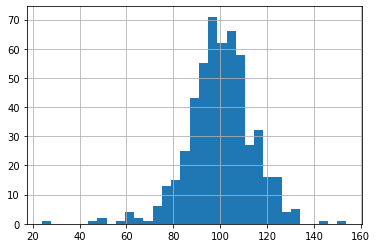

In [7924]:
m20overc.FEV1PP.hist(bins='auto')

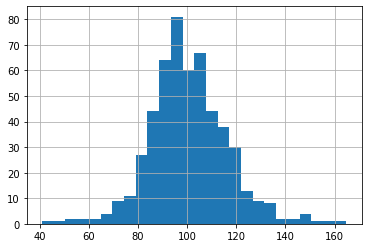

In [7925]:
m20overc.PEFRPPOFVCPP.hist(bins='auto')

Createvarsppopppp for PEFRPPOFVCPPPP PEFRPPOFVCPPPP FEF75PPOFVCPPPP MMEFPPOFVCPPPP

In [7926]:
def createvarsppopppp(df):
    vn = df.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPP'] = 100 * df.PEFRPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                              + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPP'] = 100 * df.PEFRPPOFEV1PP / (resultsratioppopp.loc[vn, 'intercept'] 
                                                + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEF75PPOFVCPP'
    df['FEF75PPOFVCPPPP'] = 100 * df.FEF75PPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                                + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFPPOFVCPP'
    df['MMEFPPOFVCPPPP'] = 100 * df.MMEFPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                                + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'MMEFPPOPEFRPP'
    df['MMEFPPOPEFRPPPP'] = 100 * df.MMEFPPOPEFRPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                                + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    

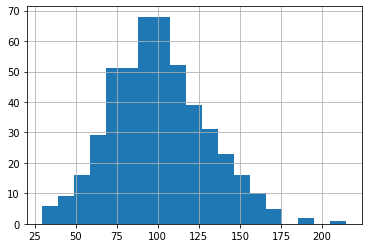

In [7927]:
m20overb.MMEFPPOFVCPP.hist(bins='auto')

In [7928]:
for y in framestoanalyze:
    print (y.name)
    createvarsppopppp(y)

mlt20cma
m20overcma
mlt20b
m20overb
flt18cma
f18overcma
flt18b
f18overb
mlt20c
m20overc
mlt20ma
m20overma
flt18c
f18overc
flt18ma
f18overma
mallcma
mallb
mallc
mallma
fallcma
fallb
fallc
fallma


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

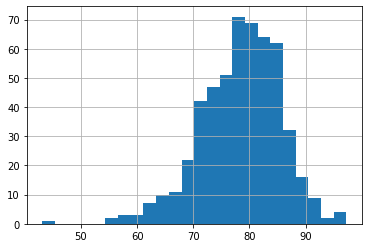

In [7929]:
m20overc.FEV1OFVC.hist(bins='auto')

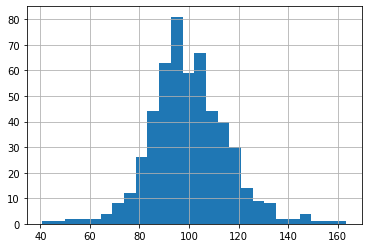

In [7930]:
m20overc.PEFRPPOFVCPPPP.hist(bins='auto')

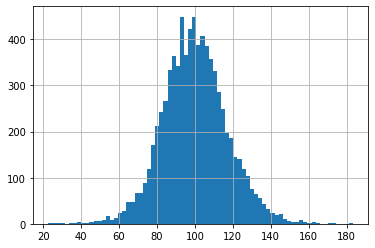

In [7931]:
alltotal.PEFRPPOFVCPPPP.hist(bins='auto')

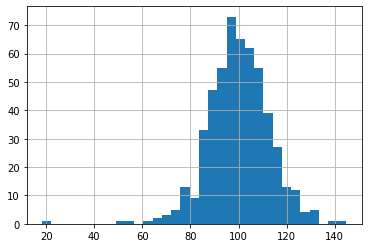

In [7932]:
m20overc.FVCPP.hist(bins='auto')

In [7933]:
std = m20overc.FEV1OFVC.std()
mean = m20overc.FEV1OFVC.mean()
ratio = std / mean # m20overc.FEV1OFVC.std()/m20overc.FEV1OFVC.mean()
print (mean, ratio, ratio* 1.645, mean - (ratio*1.645))
print (.876 * mean)

78.43415611725942 0.09152031280451582 0.15055091456342853 78.283605202696
68.70832075871925


says mean FEV1/FVC .788, lower limit if use std for all data .645

The std is smaller for %predicted than for actual value
so to get 5% lower limit can use %predicted - 1.645 * std

In [7934]:
std = m20overc.FEV1OFVCPP.std()
mean = m20overc.FEV1OFVCPP.mean()
ratio = std/mean # m20overc.FEV1OFVCPP.std()/m20overc.FEV1OFVCPP.mean()
print (mean, ratio, ratio*1.645, mean - (ratio*1.645))

99.99990260407344 0.07965684392410938 0.13103550825515992 99.86886709581827


says mean FEV1/FVC %pred is 100% and lower limit .876 of that
if use prior mean FEV1/FVC of .788, .876 of that is .69 which is higher than .645

Try saving variables to array

In [7935]:
print (m20overc.name)
print (varsratio[1])
dfvar = m20overc.name + varsratio[1]
print (dfvar)

m20overc
FEF75OPEFR
m20overcFEF75OPEFR


In [7936]:
print (resultsratio)

                      dfname         var  intercept     slope        r2  \
dfnvarn                                                                   
mlt20cmaFEF75OFVC   mlt20cma   FEF75OFVC  43.997043  0.059610  0.000155   
mlt20cmaFEF75OPEFR  mlt20cma  FEF75OPEFR  24.404570  0.016176  0.000042   
mlt20cmaFEV05OFEV3  mlt20cma  FEV05OFEV3  71.878072 -0.319622  0.024857   
mlt20cmaFEV05OFVC   mlt20cma   FEV05OFVC  70.074012 -0.267688  0.015863   
mlt20cmaFEV1OFEV3   mlt20cma   FEV1OFEV3  89.603159 -0.115008  0.005920   
...                      ...         ...        ...       ...       ...   
fallmaMMEFOFVC        fallma    MMEFOFVC   1.228693 -0.007390  0.200766   
fallmaMMEFOPEFR       fallma   MMEFOPEFR  64.696127 -0.390138  0.271009   
fallmaPEFROFEV1       fallma   PEFROFEV1   2.042195  0.006506  0.098032   
fallmaPEFROFEV6       fallma   PEFROFEV6   1.887790  0.001661  0.007330   
fallmaPEFROFVC        fallma    PEFROFVC   1.907593  0.000180  0.000088   

                        

new variable %pred ratios

data.loc['m20overbFEV1OFVC']

In [7937]:
height_age_reg(m20overb, 'SPPFEV1')

('m20overb',
 'SPPFEV1',
 825.1704909398691,
 array([-2.46473338e+01, -8.45343713e-03,  1.18131769e-01]),
 0.47603248573592255,
 721.6876855783175,
 477)

## now need do the same using Hankinson equations
Hvarlistnonratio - FEV1, FVC, FEV6, MMEF, PEF
Hvarlistratio - FEV1OFEV6, FEV1OFVC
need first enter Hresults into hresultsratio names intercept, slope 
  H has same equation for youth and adults for ratios
and Hresults into hresultsnonratio with names intercept, b1, b2
Can read from excel or csv file - data = pd.read_csv("filename.csv"); then data.head() to look at first five lines
then createvarsratiopph and createvarsnonratiopph for each in hvarlistratio and hvarlistnonratio
then creatediffsppratio and creatediffsppnonratio for each in hvarlistratio and hvarlistnonratio
the show mean and std of each variable

In [7938]:
# hvarlistnonratio = [ 'SPPFEV1', 'SPPFEV6', 'SPPFVC','SPPPEAK','SPPMMEF']
hvarlistnonratio = [ 'FEV1', 'FEV6', 'FVC','PEFR','MMEF']

In [7939]:
hvarlistratio = ['FEV1OFVC','FEV1OFEV6']

## Create dataframes hresultsratio hresultsnonratio from the csv files

In [7940]:
import os

In [7941]:
os.getcwd()

'/Users/doug/Documents/nhanes'

In [7942]:
os.listdir(os.getcwd())

['.DS_Store',
 'nhanes.doug.ipynb',
 'NHANES analysis',
 'nhanes',
 'nhanes.doug-Copy1.ipynb',
 '__pycache__',
 'nhanes_loader.py',
 'nhanes.ipynb',
 '.gitignore',
 'master',
 '.ipynb_checkpoints',
 '.git',
 'data']

In [7943]:
hresultsratio = pd.read_csv("data/hankinson_ratio.csv")
hresultsratio.set_index('dfnvarn', inplace=True)
print (hresultsratio)

                        dfname        var  intercept   slope  llnintercept  \
dfnvarn                                                                      
m20overbFEV1OFEV6     m20overb  FEV1OFEV6     88.841 -0.1305        78.979   
m20overbFEV1OFVC      m20overb   FEV1OFVC     89.239 -0.1828        78.822   
m20overcFEV1OFEV6     m20overc  FEV1OFEV6     87.340 -0.1382        78.372   
m20overcFEV1OFVC      m20overc   FEV1OFVC     88.066 -0.2066        78.388   
m20overmaFEV1OFEV6   m20overma  FEV1OFEV6     89.388 -0.1534        80.810   
m20overmaFEV1OFVC    m20overma   FEV1OFVC     90.024 -0.2186        80.925   
f18overbFEV1OFEV6     f18overb  FEV1OFEV6     91.229 -0.1558        81.396   
f18overbFEV1OFVC      f18overb   FEV1OFVC     91.655 -0.2039        80.978   
f18overcFEV1OFEV6     f18overc  FEV1OFEV6     90.107 -0.1563        81.307   
f18overcFEV1OFVC      f18overc   FEV1OFVC     90.809 -0.2125        81.015   
f18overmaFEV1OFEV6   f18overma  FEV1OFEV6     91.664 -0.1670    

In [7944]:
hansenresultsratio = pd.read_csv("data/hansen_ratio.csv")
hansenresultsratio.set_index('dfnvarn', inplace=True)
print (hansenresultsratio)

                       dfname        var  intercept  slope
dfnvarn                                                   
m20overbFEV1OFEV6    m20overb  FEV1OFEV6      76.15 -0.085
f18overbFEV1OFEV6    f18overb  FEV1OFEV6      81.50 -0.150
m20overcFEV1OFEV6    m20overc  FEV1OFEV6      73.80 -0.045
f18overcFEV1OFEV6    f18overc  FEV1OFEV6      78.00 -0.097
m20overmaFEV1OFEV6  m20overma  FEV1OFEV6      78.90 -0.104
f18overmaFEV1OFEV6  f18overma  FEV1OFEV6      82.20 -0.150
m20overbFEV1OFVC     m20overb   FEV1OFVC      76.80 -0.194
f18overbFEV1OFVC     f18overb   FEV1OFVC      84.60 -0.301
m20overcFEV1OFVC     m20overc   FEV1OFVC      74.50 -0.120
f18overcFEV1OFVC     f18overc   FEV1OFVC      80.20 -0.214
m20overmaFEV1OFVC   m20overma   FEV1OFVC      80.00 -0.225
f18overmaFEV1OFVC   f18overma   FEV1OFVC      85.00 -0.290
m20overbFEV3OFEV6    m20overb  FEV3OFEV6      96.65 -0.094
f18overbFEV3OFEV6    f18overb  FEV3OFEV6      97.80 -0.110
m20overcFEV3OFEV6    m20overc  FEV3OFEV6      96.45 -0.0

In [7945]:
hresultsratio.head()

,dfname,var,intercept,slope,llnintercept,r2
dfnvarn,,,,,,
m20overbFEV1OFEV6,m20overb,FEV1OFEV6,88.841,-0.1305,78.979,0.0937
m20overbFEV1OFVC,m20overb,FEV1OFVC,89.239,-0.1828,78.822,0.1538
m20overcFEV1OFEV6,m20overc,FEV1OFEV6,87.340,-0.1382,78.372,0.2151
m20overcFEV1OFVC,m20overc,FEV1OFVC,88.066,-0.2066,78.388,0.3448
m20overmaFEV1OFEV6,m20overma,FEV1OFEV6,89.388,-0.1534,80.810,0.1711


In [7946]:
hresultsnonratio = pd.read_csv("data/hankinson_nonratio.csv")
hresultsnonratio.set_index('dfnvarn', inplace=True)
print (hresultsnonratio)

                  dfname   var  intercept       b1        b2        b3  \
dfnvarn                                                                  
mlt20cFEV1        mlt20c  FEV1    -0.7453 -0.04106  0.004477  0.000141   
mlt20cFEV6        mlt20c  FEV6    -0.3119 -0.18612  0.009717  0.000182   
mlt20cFVC         mlt20c   FVC    -0.2584 -0.20415  0.010133  0.000186   
mlt20cPEFR        mlt20c  PEFR    -0.5962 -0.12357  0.013135  0.000250   
mlt20cMMEF        mlt20c  MMEF    -1.0863  0.13939  0.000000  0.000103   
m20overcFEV1    m20overc  FEV1     0.5536 -0.01303 -0.000172  0.000141   
m20overcFEV6    m20overc  FEV6     0.1102 -0.00842 -0.000223  0.000182   
m20overcFVC     m20overc   FVC    -0.1933  0.00064 -0.000269  0.000186   
m20overcPEFR    m20overc  PEFR     1.0523  0.08272 -0.001301  0.000250   
m20overcMMEF    m20overc  MMEF     2.7006 -0.04995  0.000000  0.000103   
mlt20bFEV1        mlt20b  FEV1    -0.7048 -0.05711  0.004316  0.000132   
mlt20bFEV6        mlt20b  FEV6    -0.5

In [7947]:
hresultsnonratio.head()

,dfname,var,intercept,b1,b2,b3,llnb3,r2
dfnvarn,,,,,,,,
mlt20cFEV1,mlt20c,FEV1,-0.7453,-0.04106,0.004477,0.000141,0.000116,0.8510
mlt20cFEV6,mlt20c,FEV6,-0.3119,-0.18612,0.009717,0.000182,0.000153,0.8692
mlt20cFVC,mlt20c,FVC,-0.2584,-0.20415,0.010133,0.000186,0.000157,0.8668
mlt20cPEFR,mlt20c,PEFR,-0.5962,-0.12357,0.013135,0.000250,0.000176,0.7808
mlt20cMMEF,mlt20c,MMEF,-1.0863,0.13939,0.000000,0.000103,0.000053,0.5601


In [7948]:
def createvarsratiopph(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
 # was   df['FEV1OFVCPPh'] = (df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
  #                                     + hresultsratio.loc[vn, 'slope'] * (df.HSAITMOR/ 12)))*100
    df['FEV1OFVCPPh'] = 100 * (df.FEV1OFVC / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12)))
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPh']= 100 * (df.FEV1OFEV6 / (hresultsratio.loc[vn, 'intercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12)))
    

In [7949]:
def createvarsratiollnPredh(df):
    vn = df.name + 'FEV1OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCLLNPredh'] = (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
    print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6LLNPredh']= (hresultsratio.loc[vn, 'llnintercept'] \
                                       + hresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    

In [7950]:
def createvarsratiollnPredhansen(df):
    vn = df.name + 'FEV1OFVC'
 #   print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV1OFVCLLNPredhansen'] = (hansenresultsratio.loc[vn, 'intercept'] \
                                       + hansenresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
 #   print (vn)
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV1OFEV6'
    df['FEV1OFEV6LLNPredhansen']= (hansenresultsratio.loc[vn, 'intercept'] \
                                       + hansenresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = df.name + 'FEV3OFVC'
#    print (vn)
 #   print(hresultsratio.loc[vn, 'dfname'])
 #   print(hresultsratio.loc[vn, 'slope'])

 #   print(hresultsratio.loc[vn, 'intercept'])
    df['FEV3OFVCLLNPredhansen'] = (hansenresultsratio.loc[vn, 'intercept'] \
                                       + hansenresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR/ 12))
 #   vn = df.name + 'FEV1OFEV6'
#    print (vn)
    vn = df.name + 'FEV3OFEV6'

    df['FEV3OFEV6LLNPredhansen']= (hansenresultsratio.loc[vn, 'intercept'] 
                                   + hansenresultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

In [7951]:
def createvarsnonratiopph(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1PPh'] = 100 * df.FEV1 / (hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.MXPAXTMR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPPh'] = 100 * df.FVC / (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEFR'
    df['PEFRPPh'] = 100 * df.PEFR /(hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6PPh'] = 100 * df.FEV6 / (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPPh'] = 100 * df.MMEF / (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [7952]:
def createvarsnonratioPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1Predh'] =(hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.MXPAXTMR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                       + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEFR'
    df['PEFRPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6Predh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )


In [7953]:
def createvarsnonratiollnPredh(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FEV1'
    print (vn)
    df['FEV1LLNPredh'] = (hresultsnonratio.loc[vn, 'intercept']  
                                       + hresultsnonratio.loc[vn, 'b1']  * (df.MXPAXTMR / 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3'] * df.BMPHT * df.BMPHT )
    vn = df.name + 'FVC'
    df['FVCLLNPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']
                                      * df.BMPHT * df.BMPHT )
    vn = df.name + 'PEFR'
    df['PEFRLLNPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'FEV6'
    df['FEV6LLNPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )
    vn = df.name + 'MMEF'
    df['MMEFLLNPredh'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                       + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR/ 12)  
                                       + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                       + hresultsnonratio.loc[vn, 'llnb3']* df.BMPHT * df.BMPHT )


In [7954]:
def createvarpredFVCmFEV6h(df):
# variables in form y = intercept + b1 * age + b2 * age * age + b3 * height * height')
    vn = df.name + 'FVC'
    vnb = df.name + 'FEV6'
    df['predFVCmFEV6h'] = (hresultsnonratio.loc[vn, 'intercept'] 
                                      + hresultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                      + hresultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                      + hresultsnonratio.loc[vn, 'b3'] * df.BMPHT * df.BMPHT ) 
    - (hresultsnonratio.loc[vnb, 'intercept'] 
                                      + hresultsnonratio.loc[vnb, 'b1'] * (df.MXPAXTMR/ 12)  
                                      + hresultsnonratio.loc[vnb, 'b2'] * (df.MXPAXTMR/ 12)* (df.MXPAXTMR/ 12) 
                                      + hresultsnonratio.loc[vnb, 'b3']* df.BMPHT * df.BMPHT )


In [7955]:
hresultsratio.index

Index(['m20overbFEV1OFEV6', 'm20overbFEV1OFVC', 'm20overcFEV1OFEV6',
       'm20overcFEV1OFVC', 'm20overmaFEV1OFEV6', 'm20overmaFEV1OFVC',
       'f18overbFEV1OFEV6', 'f18overbFEV1OFVC', 'f18overcFEV1OFEV6',
       'f18overcFEV1OFVC', 'f18overmaFEV1OFEV6', 'f18overmaFEV1OFVC',
       'mlt20bFEV1OFEV6', 'mlt20bFEV1OFVC', 'mlt20cFEV1OFEV6',
       'mlt20cFEV1OFVC', 'mlt20maFEV1OFEV6', 'mlt20maFEV1OFVC',
       'flt18bFEV1OFEV6', 'flt18bFEV1OFVC', 'flt18cFEV1OFEV6',
       'flt18cFEV1OFVC', 'flt18maFEV1OFEV6', 'flt18maFEV1OFVC',
       'mallbFEV1OFEV6', 'mallbFEV1OFVC', 'mallcFEV1OFEV6', 'mallcFEV1OFVC',
       'mallmaFEV1OFEV6', 'mallmaFEV1OFVC', 'fallbFEV1OFEV6', 'fallbFEV1OFVC',
       'fallcFEV1OFEV6', 'fallcFEV1OFVC', 'fallmaFEV1OFEV6', 'fallmaFEV1OFVC'],
      dtype='object', name='dfnvarn')

In [7956]:
hratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, 
                   mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma, 
                    mallb, mallc, mallma,  fallb, fallc, fallma]

In [7957]:
hansenframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma]

In [7958]:
hnonratioframestoanalyze = [m20overb,  m20overc, m20overma, f18overb,  f18overc, f18overma, mlt20b,  mlt20c, mlt20ma, flt18b, flt18c, flt18ma ]

In [7959]:
hresultsnonratio.index

Index(['mlt20cFEV1', 'mlt20cFEV6', 'mlt20cFVC', 'mlt20cPEFR', 'mlt20cMMEF',
       'm20overcFEV1', 'm20overcFEV6', 'm20overcFVC', 'm20overcPEFR',
       'm20overcMMEF', 'mlt20bFEV1', 'mlt20bFEV6', 'mlt20bFVC', 'mlt20bPEFR',
       'mlt20bMMEF', 'm20overbFEV1', 'm20overbFEV6', 'm20overbFVC',
       'm20overbPEFR', 'm20overbMMEF', 'mlt20maFEV1', 'mlt20maFEV6',
       'mlt20maFVC', 'mlt20maPEFR', 'mlt20maMMEF', 'm20overmaFEV1',
       'm20overmaFEV6', 'm20overmaFVC', 'm20overmaPEFR', 'm20overmaMMEF',
       'flt18cFEV1', 'flt18cFEV6', 'flt18cFVC', 'flt18cPEFR', 'flt18cMMEF',
       'f18overcFEV1', 'f18overcFEV6', 'f18overcFVC', 'f18overcPEFR',
       'f18overcMMEF', 'flt18bFEV1', 'flt18bFEV6', 'flt18bFVC', 'flt18bPEFR',
       'flt18bMMEF', 'f18overbFEV1', 'f18overbFEV6', 'f18overbFVC',
       'f18overbPEFR', 'f18overbMMEF', 'flt18maFEV1', 'flt18maFEV6',
       'flt18maFVC', 'flt18maPEFR', 'flt18maMMEF', 'f18overmaFEV1',
       'f18overmaFEV6', 'f18overmaFVC', 'f18overmaPEFR', 'f18overmaM

DOES NOT have name for the df after f18overma which is mlt20b
I went back and reran the part that gave names, and now works

In [7960]:
for y in hratioframestoanalyze:
    print (y.name, ' ', y.shape)

m20overb   (477, 259)
m20overc   (528, 259)
m20overma   (602, 259)
f18overb   (957, 259)
f18overc   (1108, 259)
f18overma   (1005, 259)
mlt20b   (599, 262)
mlt20c   (419, 262)
mlt20ma   (600, 262)
flt18b   (590, 262)
flt18c   (409, 262)
flt18ma   (557, 262)
mallb   (1076, 160)
mallc   (947, 160)
mallma   (1202, 160)
fallb   (1547, 160)
fallc   (1517, 160)
fallma   (1562, 160)


In [7961]:
for y in hratioframestoanalyze:
#    print (y.name)
    createvarsratiopph(y)
 #   createvarpredFVCmFEV6h(y) # can't do pred for all
  

m20overbFEV1OFVC
m20overcFEV1OFVC
m20overmaFEV1OFVC
f18overbFEV1OFVC
f18overcFEV1OFVC
f18overmaFEV1OFVC
mlt20bFEV1OFVC
mlt20cFEV1OFVC
mlt20maFEV1OFVC
flt18bFEV1OFVC
flt18cFEV1OFVC
flt18maFEV1OFVC
mallbFEV1OFVC
mallcFEV1OFVC
mallmaFEV1OFVC
fallbFEV1OFVC
fallcFEV1OFVC
fallmaFEV1OFVC


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7962]:
for y in hratioframestoanalyze:
#    print (y.name)
 
 #   createvarpredFVCmFEV6h(y) # can't do pred for all
    createvarsratiollnPredh(y)

m20overbFEV1OFVC
m20overcFEV1OFVC
m20overmaFEV1OFVC
f18overbFEV1OFVC
f18overcFEV1OFVC
f18overmaFEV1OFVC
mlt20bFEV1OFVC
mlt20cFEV1OFVC
mlt20maFEV1OFVC
flt18bFEV1OFVC
flt18cFEV1OFVC
flt18maFEV1OFVC
mallbFEV1OFVC
mallcFEV1OFVC
mallmaFEV1OFVC
fallbFEV1OFVC
fallcFEV1OFVC
fallmaFEV1OFVC


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [7963]:
for y in hansenframestoanalyze:
#    print (y.name)
 #   createvarpredFVCmFEV6h(y) # can't do pred for all
    createvarsratiollnPredhansen(y)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [7964]:
for y in hnonratioframestoanalyze:
#    print (y.name)
    createvarsnonratiopph(y)
    createvarpredFVCmFEV6h(y)
#    createvarsnonratiollnh(y)
    createvarsnonratiollnPredh(y)

m20overbFEV1
m20overbFEV1
m20overcFEV1
m20overcFEV1
m20overmaFEV1
m20overmaFEV1
f18overbFEV1
f18overbFEV1
f18overcFEV1
f18overcFEV1
f18overmaFEV1
f18overmaFEV1
mlt20bFEV1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

mlt20bFEV1
mlt20cFEV1
mlt20cFEV1
mlt20maFEV1
mlt20maFEV1
flt18bFEV1
flt18bFEV1
flt18cFEV1
flt18cFEV1
flt18maFEV1
flt18maFEV1


The predicted FVC should always be more than predicted FEV6 - which it is

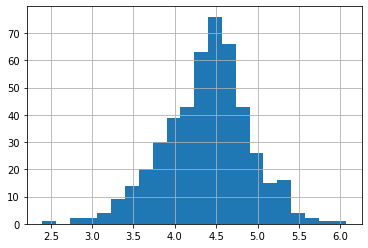

In [7965]:
m20overb.predFVCmFEV6h.hist(bins='auto')

creatediffsppratio and creatediffsppnonratio 

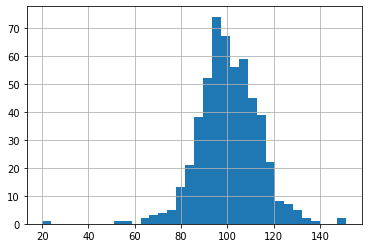

In [7966]:
m20overc.FEV6PPh.hist(bins='auto')

In [7967]:
m20overb.FEV1PPh.describe()

count    477.000000
mean      99.544677
std       14.746462
min       35.206958
25%       91.629122
50%      100.067954
75%      108.692292
max      150.469237
Name: FEV1PPh, dtype: float64

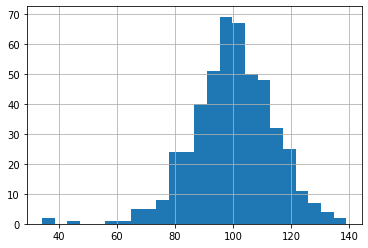

In [7968]:
m20overb.FVCPP.hist(bins='auto')

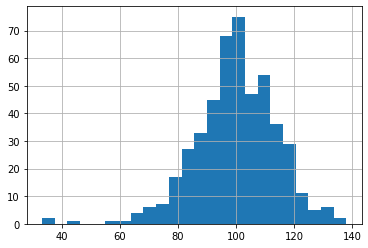

In [7969]:
m20overb.FVCPPh.hist(bins='auto')

scatterplot

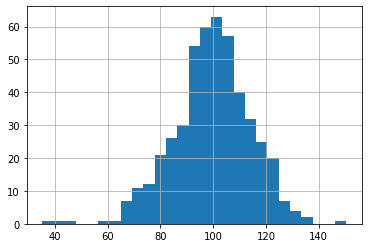

In [7970]:
m20overb.FEV1PPh.hist(bins='auto')

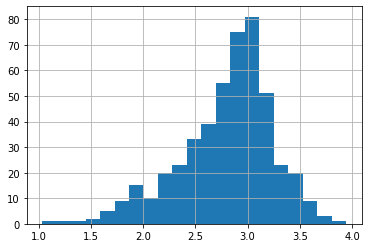

In [7971]:
m20overb.FEV1LLNPredh.hist(bins='auto')

Print numbers that are below Hankinson predicted LLN;  for FEV1 it varies from 1.9 to 7.0%, so there are problems with this LLN
# NEED DO ALSO for ratio
but for y in hratioframestoanalyze

In [7972]:
def printltllnh (df):
    print ("FEV1, ", df.name, ", ",len(df.query('FEV1 < FEV1LLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('FEV1 < FEV1LLNPredh'))/len(df)),4))
    print ("FEV6, ", df.name, ", ",len(df.query('FEV6 < FEV6LLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('FEV6 < FEV6LLNPredh'))/len(df)),4))
    print ("FVC, ", df.name, ", ",len(df.query('FVC < FVCLLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('FVC < FVCLLNPredh'))/len(df)),4))
    print ("MMEF, ", df.name, ", ",len(df.query('MMEF < MMEFLLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('MMEF < MMEFLLNPredh'))/len(df)),4))
    print ("PEFR, ", df.name, ", ",len(df.query('PEFR < PEFRLLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('PEFR < PEFRLLNPredh'))/len(df)),4))  

In [7973]:
print ("parameter, dfname, n below Hankinson LLN, count, fraction below LLN")
for y in hnonratioframestoanalyze:
    printltllnh (y)  

parameter, dfname, n below Hankinson LLN, count, fraction below LLN
FEV1,  m20overb ,  33 ,  477 ,  0.0692
FEV6,  m20overb ,  27 ,  477 ,  0.0566
FVC,  m20overb ,  29 ,  477 ,  0.0608
MMEF,  m20overb ,  24 ,  477 ,  0.0503
PEFR,  m20overb ,  38 ,  477 ,  0.0797
FEV1,  m20overc ,  35 ,  528 ,  0.0663
FEV6,  m20overc ,  28 ,  528 ,  0.053
FVC,  m20overc ,  27 ,  528 ,  0.0511
MMEF,  m20overc ,  22 ,  528 ,  0.0417
PEFR,  m20overc ,  31 ,  528 ,  0.0587
FEV1,  m20overma ,  34 ,  602 ,  0.0565
FEV6,  m20overma ,  40 ,  602 ,  0.0664
FVC,  m20overma ,  36 ,  602 ,  0.0598
MMEF,  m20overma ,  30 ,  602 ,  0.0498
PEFR,  m20overma ,  34 ,  602 ,  0.0565
FEV1,  f18overb ,  45 ,  957 ,  0.047
FEV6,  f18overb ,  43 ,  957 ,  0.0449
FVC,  f18overb ,  49 ,  957 ,  0.0512
MMEF,  f18overb ,  37 ,  957 ,  0.0387
PEFR,  f18overb ,  58 ,  957 ,  0.0606
FEV1,  f18overc ,  58 ,  1108 ,  0.0523
FEV6,  f18overc ,  69 ,  1108 ,  0.0623
FVC,  f18overc ,  72 ,  1108 ,  0.065
MMEF,  f18overc ,  43 ,  1108 ,  0.

In [7974]:
def printratioltllnh (df):
    print ("FEV1OFEV6, ", df.name, ", ",len(df.query('FEV1OFEV6 < FEV1OFEV6LLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('FEV1OFEV6 < FEV1OFEV6LLNPredh'))/len(df)),4))
    print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPredh')), ", ", 
           len(df), ", ", round((len(df.query('FEV1OFVC < FEV1OFVCLLNPredh'))/len(df)),4))
  

In [7975]:
def printratioltllnhansen (df):
    print ("FEV1OFEV6, ", df.name, ", ",len(df.query('FEV1OFEV6 < FEV1OFEV6LLNPredhansen')), ", ", 
           len(df), ", ", round((len(df.query('FEV1OFEV6 < FEV1OFEV6LLNPredhansen'))/len(df)),4))
    print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPredhansen')), ", ", 
           len(df), ", ", round((len(df.query('FEV1OFVC < FEV1OFVCLLNPredhansen'))/len(df)),4))
    print ("FEV3OFEV6, ", df.name, ", ",len(df.query('FEV3OFEV6 < FEV3OFEV6LLNPredhansen')), ", ", 
           len(df), ", ", round((len(df.query('FEV3OFEV6 < FEV3OFEV6LLNPredhansen'))/len(df)),4))
    print ("FEV3OFVC, ", df.name, ", ",len(df.query('FEV3OFVC < FEV3OFVCLLNPredhansen')), ", ", 
           len(df), ", ", round((len(df.query('FEV3OFVC < FEV3OFVCLLNPredhansen'))/len(df)),4))
  

In [7976]:
print ("parameter, dfname, n below Hansen LLN, count, fraction below LLN")
for y in hansenframestoanalyze:
    printratioltllnhansen (y)  

parameter, dfname, n below Hansen LLN, count, fraction below LLN
FEV1OFEV6,  m20overb ,  17 ,  477 ,  0.0356
FEV1OFVC,  m20overb ,  16 ,  477 ,  0.0335
FEV3OFEV6,  m20overb ,  24 ,  477 ,  0.0503
FEV3OFVC,  m20overb ,  17 ,  477 ,  0.0356
FEV1OFEV6,  m20overc ,  32 ,  528 ,  0.0606
FEV1OFVC,  m20overc ,  33 ,  528 ,  0.0625
FEV3OFEV6,  m20overc ,  33 ,  528 ,  0.0625
FEV3OFVC,  m20overc ,  30 ,  528 ,  0.0568
FEV1OFEV6,  m20overma ,  29 ,  602 ,  0.0482
FEV1OFVC,  m20overma ,  27 ,  602 ,  0.0449
FEV3OFEV6,  m20overma ,  28 ,  602 ,  0.0465
FEV3OFVC,  m20overma ,  27 ,  602 ,  0.0449
FEV1OFEV6,  f18overb ,  42 ,  957 ,  0.0439
FEV1OFVC,  f18overb ,  43 ,  957 ,  0.0449
FEV3OFEV6,  f18overb ,  46 ,  957 ,  0.0481
FEV3OFVC,  f18overb ,  58 ,  957 ,  0.0606
FEV1OFEV6,  f18overc ,  61 ,  1108 ,  0.0551
FEV1OFVC,  f18overc ,  55 ,  1108 ,  0.0496
FEV3OFEV6,  f18overc ,  49 ,  1108 ,  0.0442
FEV3OFVC,  f18overc ,  43 ,  1108 ,  0.0388
FEV1OFEV6,  f18overma ,  49 ,  1005 ,  0.0488
FEV1OFVC,  

In [7977]:
print ("parameter, dfname, n below Hankinson LLN, count, fraction below LLN")
for y in hratioframestoanalyze:
    printratioltllnh (y)  

parameter, dfname, n below Hankinson LLN, count, fraction below LLN
FEV1OFEV6,  m20overb ,  27 ,  477 ,  0.0566
FEV1OFVC,  m20overb ,  28 ,  477 ,  0.0587
FEV1OFEV6,  m20overc ,  30 ,  528 ,  0.0568
FEV1OFVC,  m20overc ,  32 ,  528 ,  0.0606
FEV1OFEV6,  m20overma ,  31 ,  602 ,  0.0515
FEV1OFVC,  m20overma ,  34 ,  602 ,  0.0565
FEV1OFEV6,  f18overb ,  38 ,  957 ,  0.0397
FEV1OFVC,  f18overb ,  41 ,  957 ,  0.0428
FEV1OFEV6,  f18overc ,  64 ,  1108 ,  0.0578
FEV1OFVC,  f18overc ,  68 ,  1108 ,  0.0614
FEV1OFEV6,  f18overma ,  55 ,  1005 ,  0.0547
FEV1OFVC,  f18overma ,  58 ,  1005 ,  0.0577
FEV1OFEV6,  mlt20b ,  28 ,  599 ,  0.0467
FEV1OFVC,  mlt20b ,  25 ,  599 ,  0.0417
FEV1OFEV6,  mlt20c ,  25 ,  419 ,  0.0597
FEV1OFVC,  mlt20c ,  19 ,  419 ,  0.0453
FEV1OFEV6,  mlt20ma ,  33 ,  600 ,  0.055
FEV1OFVC,  mlt20ma ,  28 ,  600 ,  0.0467
FEV1OFEV6,  flt18b ,  45 ,  590 ,  0.0763
FEV1OFVC,  flt18b ,  41 ,  590 ,  0.0695
FEV1OFEV6,  flt18c ,  20 ,  409 ,  0.0489
FEV1OFVC,  flt18c ,  18 ,  

In [7978]:
m20overb.query('FEV1PPh < .5').MXPAXTMR

Series([], Name: MXPAXTMR, dtype: float64)

In [7979]:
m20overc.FEV6PPh.describe()

count    528.000000
mean     100.603112
std       13.106025
min       19.922022
25%       92.912318
50%       99.917171
75%      108.845365
max      151.489224
Name: FEV6PPh, dtype: float64

In [7980]:
m20overb.FEV6PPh.describe()

count    477.000000
mean      99.840561
std       13.819266
min       35.060300
25%       91.867470
50%      100.345255
75%      109.000917
max      137.070224
Name: FEV6PPh, dtype: float64

In [7981]:
m20overb.query('FEV6PPh < 0').MXPAXTMR

Series([], Name: MXPAXTMR, dtype: float64)

In [7982]:
m20overma.FEV6PPh.describe()

count    602.000000
mean     100.338196
std       11.622324
min       55.045380
25%       93.025084
50%      100.188414
75%      108.719020
max      142.207897
Name: FEV6PPh, dtype: float64

In [7983]:
m20overb.FVCPPh.describe()

count    477.000000
mean      99.818289
std       13.989320
min       33.305185
25%       91.528927
50%      100.002260
75%      108.885008
max      137.991289
Name: FVCPPh, dtype: float64

FVC m20overb FVCPPh min -.418

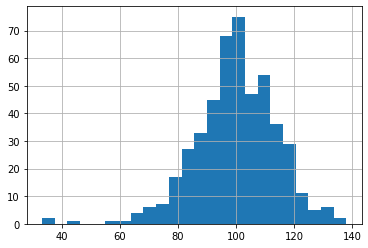

In [7984]:
m20overb.FVCPPh.hist(bins='auto')

should look at all the FVC values for m20overb and see if any are negative
or print the FVC and FVCPPh for all of those and see which is off (is a predicted negative)

In [7985]:
mlt20ma.FVCPPh.describe()

count    600.000000
mean      99.380006
std       10.844172
min       55.622421
25%       91.613165
50%       99.241116
75%      106.985458
max      133.198260
Name: FVCPPh, dtype: float64

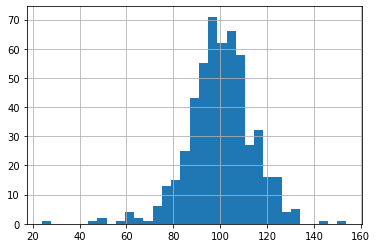

In [7986]:
m20overc.FEV1PP.hist(bins='auto')

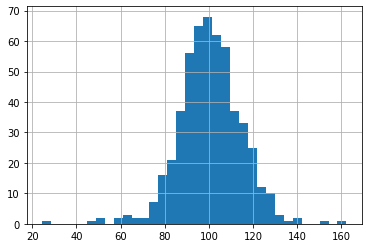

In [7987]:
m20overc.FEV1PPh.hist(bins='auto')

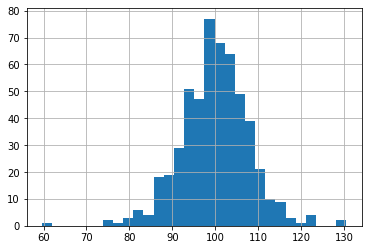

In [7988]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

In [7989]:
def creatediffs(df):
    df['FEV1PPdiff'] = df.FEV1PP - df.FEV1PPh
    df['FVCPPdiff'] = df.FVCPP - df.FVCPPh
    df['PEFRPPdiff'] = df.PEFRPP - df.PEFRPPh
    df['MMEFPPdiff'] = df.MMEFPP - df.MMEFPPh
    df['FEV6PPdiff'] = df.FEV6PP - df.FEV6PPh
    df['FEV1OFVCPPdiff'] = df.FEV1OFVCPP - df.FEV1OFVCPPh
    df['FEV1OFEV6PPdiff'] = df.FEV1OFEV6PP - df.FEV1OFEV6PPh 
    

In [7990]:
m20overc.loc[:,"PEFRPPh"].mean()

100.34936674397373

Has FEV1PP, PEFPPh, but not PEFPP - it is PEFR

In [7991]:
m20overc.loc[:,"PEFRPP"].mean()

100.04838162185125

In [7992]:
for y in hnonratioframestoanalyze:
    print (y.name)
    creatediffs(y)

m20overb
m20overc
m20overma
f18overb
f18overc
f18overma
mlt20b
mlt20c
mlt20ma
flt18b
flt18c
flt18ma


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

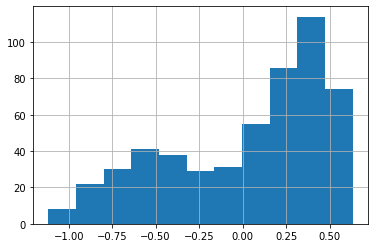

In [7993]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

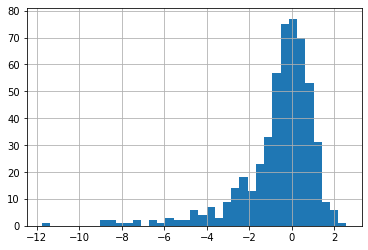

In [7994]:
m20overc.FEV1PPdiff.hist(bins='auto')

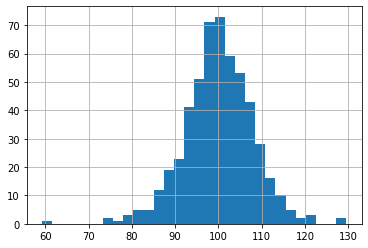

In [7995]:
m20overc.FEV1OFVCPP.hist(bins='auto')

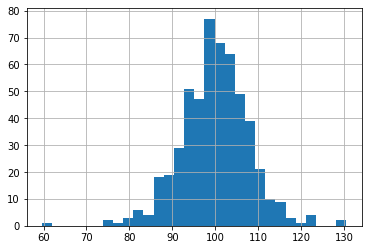

In [7996]:
m20overc.FEV1OFVCPPh.hist(bins='auto')

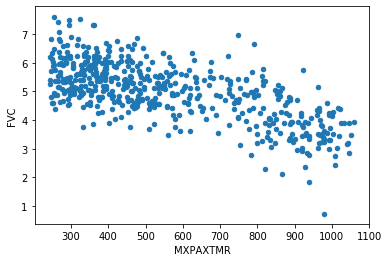

In [7997]:
m20overc.plot.scatter('MXPAXTMR', 'FVC')

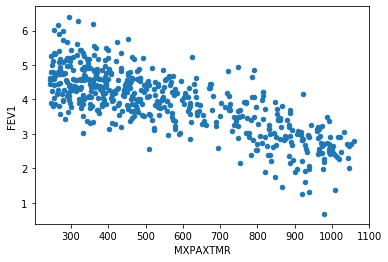

In [7998]:
m20overc.plot.scatter('MXPAXTMR', 'FEV1')

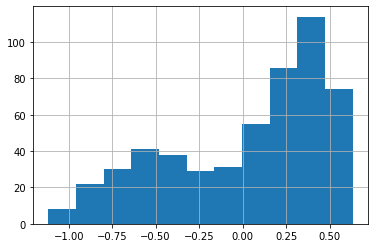

In [7999]:
m20overc.FEV1OFVCPPdiff.hist(bins='auto')

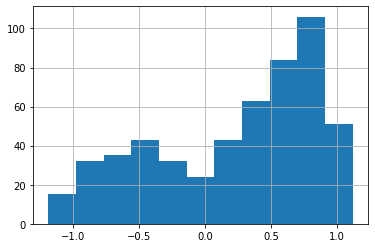

In [8000]:
m20overc.FEV1OFEV6PPdiff.hist(bins='auto')

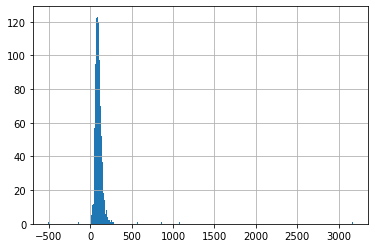

In [8001]:
mallma.FEF75PP.hist(bins='auto')

There is male with FEF75PP >5 (about 27)

In [8002]:
mallma.query('FEF75PP > 5')  #.HSAITMOR

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,FEF75OFVCPP,FEF75OPEFRPP,FEV05OFVCPP,FEV1OFEV3PP,FEV1OFEV6PP,PEFROFVCPP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFEV6PP,FEV3OFVCPP,FEV6OFVCPP,MMEFOFVCPP,MMEFOPEFRPP,FEF75OFVCPred,FEF75OPEFRPred,FEV1OFVCPred,FEV05OFVCPred,FEV1OFEV3Pred,FEV1OFEV6Pred,PEFROFVCPred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFEV6Pred,FEV3OFVCPred,FEV6OFVCPred,MMEFOFVCPred,MMEFOPEFRPred,FEV1PP,FEV05PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FEV05Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,MMEFPPOFVCPP,FEF75PPOFVCPP,MMEFPPOPEFRPP,PEFRPPOFVCPPPP,PEFRPPOFEV1PPPP,FEF75PPOFVCPPPP,MMEFPPOFVCPPPP,MMEFPPOPEFRPPPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh,FEV05OFEV3Pred,FEV05OFEV3PP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,21,2,NaN,NaN,261.0,NaN,2.0,2.0,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,21.0,2.0,NaN,NaN,NaN,1008.0,5.0,10513.0,3576.0,4640.0,5650.0,5884.0,5988.0,4085.0,1230.0,1.0,4.0,09:25,11.0,22.0,1.0,1735.14,262.0,178.8,93.1,81.60,1,3.0,1.0,261.0,NaN,NaN,NaN,77.488310,82.123894,78.857920,1.755678,1.786710,2.265733,96.023114,94.355377,98.263193,38.856654,0.682198,4.640,5.650,5.884,10.513,4.085,1.230,59.719439,3.576,5.988,11.0,63.292035,20.541082,11.699800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.805034,51.104031,54.168608,89.724485,93.374784,91.607942,92.673545,93.424769,101.990159,98.162394,97.323956,99.167131,71.110136,76.116387,40.194641,21.598857,85.334817,66.558687,87.950826,86.081968,1.894476,1.912458,2.221521,97.820672,99.088470,99.088470,0.959354,51.048999,99.659533,100.303119,109.823444,103.003070,106.180757,108.491711,79.552723,54.687757,134.359509,4.655852,3.565193,5.452388,10.206492,5.321115,5.423456,5.134959,2.249132,8.186990,5.452388,103.354960,93.789692,72.436923,49.796068,77.233352,93.181295,102.995985,48.682657,71.924024,76.893415,90.894063,91.653940,76.152233,77.460767,68.613399,92.244425
52,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1,3,1,1,50,2,NaN,NaN,602.0,NaN,2.0,2.0,2.0,2.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,50.0,2.0,NaN,NaN,NaN,1012.0,5.0,11424.0,3781.0,4658.0,5104.0,5301.0,5514.0,5684.0,1868.0,1.0,4.0,09:24,13.0,21.0,1.0,1398.57,603.0,178.2,95.4,79.60,1,3.0,1.0,602.0,NaN,NaN,NaN,84.475880,91.261755,87.870213,2.071817,2.155065,2.452555,96.283720,92.564382,96.137106,49.754902,1.030831,4.658,5.104,5.301,11.424,5.684,1.868,68.570910,3.781,5.514,13.0,74.079154,33.877403,16.351541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106.558826,140.249218,134.834962,107.714673,106.352530,107.398995,103.599456,104.385619,97.390327,101.077206,100.338569,99.322778,133.614128,128.533394,24.155146,12.127078,79.276286,63.659768,85.810611,81.816607,1.999834,2.064523,2.518273,95.257600,96.792607,96.792607,0.771498,38.709708,108.074898,110.304543,103.123561,107.885163,102.150961,101.769626,131.136459,129.730712,109.073577,4.309974,3.427783,5.346984,10.589037,4.996527,5.208823,4.334416,1.439906,11.918560,5.346984,99.824441,104.617375,127.164402,125.801234,121.551894,103.935006,100.160667,97.703501,122.573679,119.218634,106.878257,107.579077,69.940350,73.101650,68.

There is a black with MMEFPP < 0 with age 963 months. 80 yo with MMEF 826, but MMEFPP -32.97 and FEF75 PP of - 0.28 - age is over 80 so should be excluded since over 80 years old which is 960; so delete those over 80 or HSAITMOR > 960
There is a black with FEF75 < 0 with HSAITMOR 937

In [8003]:
mallb.query('MMEFPP < 0')  

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,FEF75OFVCPP,FEF75OPEFRPP,FEV05OFVCPP,FEV1OFEV3PP,FEV1OFEV6PP,PEFROFVCPP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFEV6PP,FEV3OFVCPP,FEV6OFVCPP,MMEFOFVCPP,MMEFOPEFRPP,FEF75OFVCPred,FEF75OPEFRPred,FEV1OFVCPred,FEV05OFVCPred,FEV1OFEV3Pred,FEV1OFEV6Pred,PEFROFVCPred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFEV6Pred,FEV3OFVCPred,FEV6OFVCPred,MMEFOFVCPred,MMEFOPEFRPred,FEV1PP,FEV05PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FEV05Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,MMEFPPOFVCPP,FEF75PPOFVCPP,MMEFPPOPEFRPP,PEFRPPOFVCPPPP,PEFRPPOFEV1PPPP,FEF75PPOFVCPPPP,MMEFPPOFVCPPPP,MMEFPPOPEFRPPPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh,FEV05OFEV3Pred,FEV05OFEV3PP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [8004]:
mallb.query('FEF75PP < 0')  

,HAR1,HAR23,HAR26,HAC1E,HAC1F,HAC1G,HAC1O,HAL6,HAL10,HAL1,HAL3,HAL5,DMARACER,DMARETHN,DMAETHNR,HSSEX,HSAGEIR,HSAGEU,HXPAXTMR,HXPSESSR,HSAITMOR,HAR4S,SPPQ1,SPPQ2,SPPQ3,SPPQ4,SPPQ5,SPPMANEU,MYPB1,MYPB3,MYPB11,MYPB27A,MYPB27B,HSAGEIR_exam,HSAGEU_exam,HXPAXTMR_exam,HXPSESSR_exam,HXPEJ6A2,SPPTECH1,SPPTRIAL,SPPPEAK,SPPFEV05,SPPFEV1,SPPFEV3,SPPFEV6,SPPFVC,SPPMMEF,SPPFEF75,SPPTYPE,SPPREPRO,SPPTIME,SPPEXPIR,SPPTEMP,HSSEX_exam,WTPFHX6,MXPAXTMR,BMPHT,BMPSITHT,BMPWT,DMARACER_exam,DMARETHN_exam,DMAETHNR_exam,HSAITMOR_exam,HXPG1,HXPG2A,HXPG2B,FEV1OFVC,FEV1OFEV3,FEV1OFEV6,PEFROFVC,PEFROFEV6,PEFROFEV1,FEV3OFEV6,FEV3OFVC,FEV6OFVC,MMEFOPEFR,MMEFOFVC,FEV1,FEV3,FEV6,PEFR,MMEF,FEF75,FEV05OFVC,FEV05,FVC,EXPIR,FEV05OFEV3,FEF75OFVC,FEF75OPEFR,HYE1G,HYE1H,HYG2,HYG4,HYG7,HYG8,HYG12,FEV1OFVCPP,FEF75OFVCPP,FEF75OPEFRPP,FEV05OFVCPP,FEV1OFEV3PP,FEV1OFEV6PP,PEFROFVCPP,PEFROFEV6PP,PEFROFEV1PP,FEV3OFEV6PP,FEV3OFVCPP,FEV6OFVCPP,MMEFOFVCPP,MMEFOPEFRPP,FEF75OFVCPred,FEF75OPEFRPred,FEV1OFVCPred,FEV05OFVCPred,FEV1OFEV3Pred,FEV1OFEV6Pred,PEFROFVCPred,PEFROFEV6Pred,PEFROFEV1Pred,FEV3OFEV6Pred,FEV3OFVCPred,FEV6OFVCPred,MMEFOFVCPred,MMEFOPEFRPred,FEV1PP,FEV05PP,FVCPP,PEFRPP,FEV3PP,FEV6PP,MMEFPP,FEF75PP,EXPIRPP,FEV1Pred,FEV05Pred,FVCPred,PEFRPred,FEV3Pred,FEV6Pred,MMEFPred,FEF75Pred,EXPIRPred,predFVCmFEV6,PEFRPPOFEV1PP,PEFRPPOFVCPP,MMEFPPOFVCPP,FEF75PPOFVCPP,MMEFPPOPEFRPP,PEFRPPOFVCPPPP,PEFRPPOFEV1PPPP,FEF75PPOFVCPPPP,MMEFPPOFVCPPPP,MMEFPPOPEFRPPPP,FEV1OFVCPPh,FEV1OFEV6PPh,FEV1OFVCLLNPredh,FEV1OFEV6LLNPredh,FEV05OFEV3Pred,FEV05OFEV3PP
SEQN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
17920,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,3,1,78,2,NaN,NaN,937.0,NaN,2.0,2.0,2.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,78.0,2.0,NaN,NaN,NaN,1005.0,8.0,3289.0,1530.0,2259.0,2932.0,3229.0,3536.0,1215.0,256.0,1.0,4.0,10:00,17.0,22.0,1.0,1566.52,937.0,163.7,80.8,62.90,2,2.0,3.0,937.0,NaN,NaN,NaN,63.885747,77.046385,69.959740,0.930147,1.018582,1.455954,90.802106,82.918552,91.317873,36.941320,0.343609,2.259,2.932,3.229,3.289,1.215,0.256,43.269231,1.530,3.536,17.0,52.182810,7.239819,7.783521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,85.620269,56.544460,130.087806,71.024791,91.774767,89.365439,43.162201,45.214656,51.269348,97.375330,93.259579,95.740611,55.381254,128.036810,12.803764,5.983282,74.615214,60.921307,83.951599,78.285007,2.155004,2.252769,2.839814,93.249600,95.380500,95.380500,0.620442,28.852109,143.063694,117.128672,149.693970,73.669008,150.031702,148.417835,173.637283,-586.433405,139.931622,1.579017,1.306256,2.362153,4.464564,1.954254,2.175615,0.699735,-0.043654,12.148791,2.362153,51.493852,49.213076,115.994841,-391.754860,235.699229,48.622336,51.956766,-351.119335,90.584703,181.587936,85.220348,88.949446,64.548367,68.789125,68.439152,76.247015
35742,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,2,3,1,80,2,NaN,NaN,963.0,NaN,2.0,2.0,2.0,2.0,2.0,8.0,NaN,NaN,NaN,NaN,NaN,80.0,2.0,NaN,NaN,NaN,1011.0,10.0,4248.0,1351.0,1646.0,1952.0,2121.0,2372.0,826.0,105.0,1.0,4.0,15:56,13.0,23.0,1.0,3323.58,964.0,155.2,76.2,57.05,2,2.0,3.0,963.0,NaN,NaN,NaN,69.392917,84.323770,77.604903,1.790894,2.002829,2.580802,92.032060,82.293423,89.418212,19.444444,0.348229,1.646,1.952,2.121,4.248,0.826,0.105,56.956155,1.351,2.372,13.0,69.211066,4.426644,2.471751,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.535012,37.725370,45.254090,93.910858,100.634610,99.522207,82.991390,88.664479,90.367971,98.882590,92.888584,93.896636,57.415283,69.082566,11.733866,5.461940,74.189243,60.649169,83.792018,77.977474,2.157927,2.258885,2.855881,93.072057,95.230475,95.230475,0.606510,28.146674,160.767727,152.696469,136.894578,134.247443,147.735204,137.702420,1883.281097,-30.597736,106.890692,1.023837,0.884762,1.732720,3.164306,1.321283,1.540278,0.043860,-0.343163,12.161957,1.732720,83.503976,98.066297,1375.716357,-22.351314,1402.843177,96.859383,84.287460,-19.957202,1065.478925,1071.223373,93.077307,99.039535,64.137067,68.495500,68.38313

In [8005]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].mean()

0.2316943249222765

In [8006]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].std()

0.6158465647391176

In [8007]:
m20overc.loc[:,"FEV1OFEV6PPdiff"].count()

528

In [8008]:
hdifflist =  ['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff', 'MMEFPPdiff','PEFRPPdiff','FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']

In [8009]:
print(hdifflist)

['FEV1PPdiff', 'FEV6PPdiff', 'FVCPPdiff', 'MMEFPPdiff', 'PEFRPPdiff', 'FEV1OFVCPPdiff', 'FEV1OFEV6PPdiff']


In [8010]:
m20overc.loc[:,"FEV1OFVC"].count()

528


for y in hdifflist:
  print(m20overc.name, ", ", y, ", ", df.loc[:,y].count())
  


Now want to get mean, stdev of the diffs for our caucasian and Hankinson caucasian (then black, then MA)
First need create combinued data set of all caucasian allc - mlt20c, m20overc, flt18c, f18overc (then black, MA)
Then get mean, stdev for each parameter - for each parameter print mean, stdev, n

create allc - mlt20c, m20overc, flt18c, f18overc
create allb - mlt20b, m20overb, flt18b, f18overb
create allma - mlt20ma, m20overma, flt18ma, f18overma
create all - allc, allb, allma


In [8011]:
allc = pd.concat([mlt20c, m20overc, flt18c, f18overc])
allb = pd.concat([mlt20b, m20overb, flt18b, f18overb])
allma = pd.concat([mlt20ma, m20overma, flt18ma, f18overma])
all = pd.concat([allc, allb, allma])

In [8012]:
allc.name = "allc"
allb.name = "allb"
allma.name = "allma"
all.name = "all"

In [8013]:
print (allc.name)

allc


In [8014]:
print("dataframe, variable, mean, STD, count")
ftoa = [allc, allb, allma, all]
for df in ftoa:
    print (df.name)
    for y in hdifflist:
        print(df.name, ", ", y, ", ", round(df.loc[:,y].mean(),4), ", ", round(df.loc[:,y].std(),4), ", ", df.loc[:,y].count())

  


dataframe, variable, mean, STD, count
allc
allc ,  FEV1PPdiff ,  -0.0806 ,  2.5385 ,  2464
allc ,  FEV6PPdiff ,  -0.2142 ,  2.0953 ,  2464
allc ,  FVCPPdiff ,  -0.1008 ,  1.658 ,  2464
allc ,  MMEFPPdiff ,  -0.5367 ,  6.8662 ,  2464
allc ,  PEFRPPdiff ,  0.3797 ,  2.0028 ,  2464
allc ,  FEV1OFVCPPdiff ,  -0.157 ,  0.5413 ,  2464
allc ,  FEV1OFEV6PPdiff ,  -0.069 ,  0.5619 ,  2464
allb
allb ,  FEV1PPdiff ,  0.2678 ,  1.7945 ,  2623
allb ,  FEV6PPdiff ,  -0.0411 ,  1.8804 ,  2623
allb ,  FVCPPdiff ,  -0.0562 ,  1.8294 ,  2623
allb ,  MMEFPPdiff ,  1.2185 ,  3.8548 ,  2623
allb ,  PEFRPPdiff ,  0.546 ,  2.5037 ,  2623
allb ,  FEV1OFVCPPdiff ,  0.0722 ,  0.8779 ,  2623
allb ,  FEV1OFEV6PPdiff ,  0.0917 ,  0.7206 ,  2623
allma
allma ,  FEV1PPdiff ,  0.2043 ,  1.419 ,  2764
allma ,  FEV6PPdiff ,  0.1299 ,  1.2136 ,  2764
allma ,  FVCPPdiff ,  0.1272 ,  1.1211 ,  2764
allma ,  MMEFPPdiff ,  0.4621 ,  3.3226 ,  2764
allma ,  PEFRPPdiff ,  0.3101 ,  1.5258 ,  2764
allma ,  FEV1OFVCPPdiff ,  -0.

want to compare MA %predicted of Caucasian and black %predicted to Caucasian
so create new variables for each parameter variablePPc for all groups (Caucasian should be 1.00)
then show mean, STD, count for each variable
expect MA to be close to Caucasian, Black to be 10% lower for non-ratio, and similar for ratio
for all groups, for all variables, create PPc
Then show the PPc

Add new PPc - need figure with to compare with Caucasian c vs for all

In [8020]:
def createvarsppc(df, dfa):  #calculate variable c - the %predicted using caucasian predicteds 
 #   from results ratio vn which is the caucasian from results ratio caucasian
    vn = dfa.name + 'FEF75OFVC'
    df['FEF75OFVCPPc'] = 100 * df.FEF75OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEF75OPEFR'
    df['FEF75OPEFRPPc'] = 100 * df.FEF75OPEFR / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV05OFEV3'
    df['FEV05OFEV3PPc'] = 100 * df.FEV05OFEV3 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV05OFVC'
    df['FEV05OFVCPPc'] = 100 * df.FEV05OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    
    vn = dfa.name + 'FEV1OFVC'
    df['FEV1OFVCPPc'] = 100 * df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV1OFEV3'
    df['FEV1OFEV3PPc']= 100 * df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))

    vn = dfa.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPc']= 100 * df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))
    vn = dfa.name + 'PEFROFVC'
    df['PEFROFVCPPc'] = 100 * df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFROFEV6'
    df['PEFROFEV6PPc']= 100 * df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFROFEV1'
    df['PEFROFEV1PPc'] = 100 * df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV3OFVC'
    df['FEV3OFVCPPc'] = 100 * df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV6OFVC'
    df['FEV6OFVCPPc'] = 100 * df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'MMEFOFVC'
    df['MMEFOFVCPPc'] = 100 * df.MMEFOFVC / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'MMEFOPEFR'
    df['MMEFOPEFRc'] = 100 * df.MMEFOPEFR / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    
    
    vn = dfa.name + 'MMEFPPOPEFRPP'
    df['MMEFPPOPEFRPPPPc'] = 100 * df.MMEFPPOPEFRPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'MMEFPPOFVCPP'
    df['MMEFPPOFVCPPPPc'] = 100 * df.MMEFPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    vn = dfa.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPPc'] = 100 * df.PEFRPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPPc'] = 100 * df.PEFRPPOFEV1PP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEF75PPOFVCPP'
    df['FEF75PPOFVCPPPPc'] = 100 * df.FEF75PPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
  # not working below for  'MMEFPPOFVCPPPPc', 'FEF75PPOFVCPPPPc'
    vn = dfa.name + 'FEV1'
    df['FEV1PPc'] = 100 * df.FEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV05'
    df['FEV05PPc'] = 100 * df.FEV05 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FVC'
    df['FVCPPc'] =  100 * df.FVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'PEFR'
    df['PEFRPPc'] = 100 * df.PEFR / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV3'
    df['FEV3PPc'] = 100 * df.FEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV6'
    df['FEV6PPc'] = 100 * df.FEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'MMEF'
    df['MMEFPPc'] = 100 * df.MMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEF75'
    df['FEF75PPc'] = 100 * df.FEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'EXPIR'
    df['EXPIRPPc'] = 100 * df.EXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [8021]:
#framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
#                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
#                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]
dfa = m20overc
fta = [m20overb, m20overcma, m20overc, m20overma]
for y in fta:
    createvarsppc(y,dfa)
dfa = f18overc
fta = [f18overb, f18overcma, f18overc, f18overma]
for y in fta:
    createvarsppc(y, dfa)
dfa = mlt20c
fta = [mlt20b, mlt20cma, mlt20c, mlt20ma]
for y in fta:
    createvarsppc(y, dfa)
dfa = flt18c
fta = [flt18b, flt18cma, flt18c, flt18ma]
for y in fta:
    createvarsppc(y, dfa)          
          

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

Create PPvalues array which has mean and stdev of the percent predicted variables

In [8022]:
# create df PPcvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPcvalues= pd.DataFrame(columns = column_names)
PPcvalues.name = 'PPcvalues'
print (PPcvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEF75OFVCPPc','FEF75OPEFRPPc',
           'FEV05OFEV3PPc', 'FEV05OFVCPPc',
           'FEV1OFVCPPc', 'FEV1OFEV3PPc','FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV05PPc','FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc', 
           'FEF75PPOFVCPPPPc','MMEFPPOFVCPPPPc','MMEFPPOPEFRPPPPc', 'PEFRPPOFEV1PPPPc','PEFRPPOFVCPPPPc']
 #   print (df.name)
for df in ftoa:
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPcvalues = PPcvalues.append(df2, ignore_index=True)
  # now set index   
PPcvalues.set_index('dfnvarn', inplace=True)


Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbFEF75OFVCPPc , m20overb ,  FEF75OFVCPPc ,  112.432 ,  52.271 ,  477
m20overbFEF75OPEFRPPc , m20overb ,  FEF75OPEFRPPc ,  100.252 ,  50.674 ,  477
m20overbFEV05OFEV3PPc , m20overb ,  FEV05OFEV3PPc ,  105.551 ,  11.002 ,  477
m20overbFEV05OFVCPPc , m20overb ,  FEV05OFVCPPc ,  106.0 ,  12.783 ,  477
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  102.561 ,  8.165 ,  477
m20overbFEV1OFEV3PPc , m20overb ,  FEV1OFEV3PPc ,  98.72 ,  7.254 ,  477
m20overbFEV1OFEV6PPc , m20overb ,  FEV1OFEV6PPc ,  102.398 ,  7.368 ,  477
m20overbPEFROFVCPPc , m20overb ,  PEFROFVCPPc ,  112.427 ,  20.276 ,  477
m20overbPEFROFEV6PPc , m20overb ,  PEFROFEV6PPc ,  112.217 ,  19.846 ,  477
m20overbPEFROFEV1PPc , m20overb ,  PEFROFEV1PPc ,  109.404 ,  15.918 ,  477
m20overbFEV3OFVCPPc , m20overb ,  FEV3OFVCPPc ,  100.329 ,  3.38 ,  477
m20overbFEV6OFVCPPc , m20overb ,  FEV6OFVCPPc ,  1

In [8023]:
PPcvalues

,dfname,var,mean,std,count
dfnvarn,,,,,
m20overbFEF75OFVCPPc,m20overb,NaN,112.432139,52.271407,477
m20overbFEF75OPEFRPPc,m20overb,NaN,100.251565,50.673749,477
m20overbFEV05OFEV3PPc,m20overb,NaN,105.550780,11.002495,477
m20overbFEV05OFVCPPc,m20overb,NaN,106.000091,12.783351,477
m20overbFEV1OFVCPPc,m20overb,NaN,102.560943,8.165077,477
...,...,...,...,...,...
flt18maFEF75PPOFVCPPPPc,flt18ma,NaN,99.925832,32.354161,557
flt18maMMEFPPOFVCPPPPc,flt18ma,NaN,99.869497,22.067437,557
flt18maMMEFPPOPEFRPPPPc,flt18ma,NaN,100.623921,18.276096,557


Now print the mean, std, count for all the dataframes and PPc variables

In [8024]:
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEF75OFVCPPc', 'FEF75OPEFRPPc','FEV1OFVCPPc', 'FEV1OFEV3PPc','FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV05PPc','FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc',
          'FEF75PPOFVCPPPPc','MMEFPPOFVCPPPPc','MMEFPPOPEFRPPPPc', 'PEFRPPOFEV1PPPPc','PEFRPPOFVCPPPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


dfvarname, dataframe, variable, mean, STD, count
m20overbFEF75OFVCPPc , m20overb ,  FEF75OFVCPPc ,  112.432 ,  52.271 ,  477
m20overbFEF75OPEFRPPc , m20overb ,  FEF75OPEFRPPc ,  100.252 ,  50.674 ,  477
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  102.561 ,  8.165 ,  477
m20overbFEV1OFEV3PPc , m20overb ,  FEV1OFEV3PPc ,  98.72 ,  7.254 ,  477
m20overbFEV1OFEV6PPc , m20overb ,  FEV1OFEV6PPc ,  102.398 ,  7.368 ,  477
m20overbPEFROFVCPPc , m20overb ,  PEFROFVCPPc ,  112.427 ,  20.276 ,  477
m20overbPEFROFEV6PPc , m20overb ,  PEFROFEV6PPc ,  112.217 ,  19.846 ,  477
m20overbPEFROFEV1PPc , m20overb ,  PEFROFEV1PPc ,  109.404 ,  15.918 ,  477
m20overbFEV3OFVCPPc , m20overb ,  FEV3OFVCPPc ,  100.329 ,  3.38 ,  477
m20overbFEV6OFVCPPc , m20overb ,  FEV6OFVCPPc ,  100.146 ,  1.894 ,  477
m20overbFEV05PPc , m20overb ,  FEV05PPc ,  88.149 ,  14.513 ,  477
m20overbFEV1PPc , m20overb ,  FEV1PPc ,  85.316 ,  12.655 ,  477
m20overbFVCPPc , m20overb ,  FVCPPc ,  83.534 ,  11.771 ,  477
m20overbPE

# Now do same for cma (and later for best)

In [8025]:
def createvarsppcma(df, dfa):  #calculate variable cma - the %predicted using caucasian/Mexican american predicteds 
 #   from results ratio vn which is the caucasian/MA from results ratio caucasian/MA
    vn = dfa.name + 'FEF75OFVC'
    df['FEF75OFVCPPcma'] = 100 * df.FEF75OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEF75OPEFR'
    df['FEF75OPEFRPPcma'] = 100 * df.FEF75OPEFR / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV1OFVC'
    df['FEV1OFVCPPcma'] = 100 * df.FEV1OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV1OFEV3'
    df['FEV1OFEV3PPcma']= 100 * df.FEV1OFEV3 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))

    vn = dfa.name + 'FEV05OFEV3'
    df['FEV05OFEV3PPcma']= 100 * df.FEV05OFEV3 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))
    vn = dfa.name + 'FEV05OFVC'
    df['FEV05OFVCPPcma']= 100 * df.FEV05OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))

    vn = dfa.name + 'FEV1OFEV6'
    df['FEV1OFEV6PPcma']= 100 * df.FEV1OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR  / 12))
    vn = dfa.name + 'PEFROFVC'
    df['PEFROFVCPPcma'] = 100 * df.PEFROFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFROFEV6'
    df['PEFROFEV6PPcma']= 100 * df.PEFROFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFROFEV1'
    df['PEFROFEV1PPcma'] = 100 * df.PEFROFEV1 / (resultsratio.loc[vn, 'intercept'] 
                                        + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV3OFVC'
    df['FEV3OFVCPPcma'] = 100 * df.FEV3OFVC / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV3OFEV6'
    df['FEV3OFEV6PPcma'] = 100 * df.FEV3OFEV6 / (resultsratio.loc[vn, 'intercept'] 
                                      + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEV6OFVC'
    df['FEV6OFVCPPcma'] = 100 * df.FEV6OFVC / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    vn = dfa.name + 'MMEFOFVC'
    df['MMEFOFVCPPcma'] = 100 * df.MMEFOFVC / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'MMEFOPEFR'
    df['MMEFOPEFRPPcma'] = 100 * df.MMEFOPEFR / (resultsratio.loc[vn, 'intercept'] 
                                       + resultsratio.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    vn = dfa.name + 'MMEFPPOPEFRPP'
    df['MMEFPPOPEFRPPPPcma'] = 100 * df.MMEFPPOPEFRPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'MMEFPPOFVCPP'
    df['MMEFPPOFVCPPPPcma'] = 100 * df.MMEFPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))

    vn = dfa.name + 'PEFRPPOFVCPP'
    df['PEFRPPOFVCPPPPcma'] = 100 * df.PEFRPPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'PEFRPPOFEV1PP'
    df['PEFRPPOFEV1PPPPcma'] = 100 * df.PEFRPPOFEV1PP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
    vn = dfa.name + 'FEF75PPOFVCPP'
    df['FEF75PPOFVCPPPPcma'] = 100 * df.FEF75PPOFVCPP / (resultsratioppopp.loc[vn, 'intercept'] 
                                      + resultsratioppopp.loc[vn, 'slope'] * (df.MXPAXTMR / 12))
  # not working below for  'MMEFPPOFVCPPPPc', 'FEF75PPOFVCPPPPc'
    vn = dfa.name + 'FEV05'
    df['FEV05PPcma'] = 100 * df.FEV05 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV1'
    df['FEV1PPcma'] = 100 * df.FEV1 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FVC'
    df['FVCPPcma'] =  100 * df.FVC /  (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'PEFR'
    df['PEFRPPcma'] = 100 * df.PEFR / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV3'
    df['FEV3PPcma'] = 100 * df.FEV3 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEV6'
    df['FEV6PPcma'] = 100 * df.FEV6 / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'MMEF'
    df['MMEFPPcma'] = 100 * df.MMEF / (resultsnonratio.loc[vn, 'intercept'] 
                                 + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                 + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                 + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'FEF75'
    df['FEF75PPcma'] = 100 * df.FEF75 / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )
    vn = dfa.name + 'EXPIR'
    df['EXPIRPPcma'] = 100 * df.EXPIR / (resultsnonratio.loc[vn, 'intercept'] 
                                   + resultsnonratio.loc[vn, 'b1'] * (df.MXPAXTMR / 12)  
                                   + resultsnonratio.loc[vn, 'b2'] * (df.MXPAXTMR / 12)* (df.MXPAXTMR / 12) 
                                   + resultsnonratio.loc[vn, 'b3']* df.BMPHT * df.BMPHT )

In [8026]:
#framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
#                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
#                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]
dfa = m20overcma
fta = [m20overb, m20overcma, m20overc, m20overma]
for y in fta:
    createvarsppcma(y,dfa)
dfa = f18overcma
fta = [f18overb, f18overcma, f18overc, f18overma]
for y in fta:
    createvarsppcma(y, dfa)
dfa = mlt20cma
fta = [mlt20b, mlt20cma, mlt20c, mlt20ma]
for y in fta:
    createvarsppcma(y, dfa)
dfa = flt18cma
fta = [flt18b, flt18cma, flt18c, flt18ma]
for y in fta:
    createvarsppcma(y, dfa)          
          

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-do

In [8027]:
# create df PPcmavalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPcmavalues= pd.DataFrame(columns = column_names)
PPcmavalues.name = 'PPcmavalues'
print (PPcmavalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPcmalist = [ 'EXPIRPPcma', 'FEF75PPcma', 'FEV05PPcma', 'FEV1PPcma', 'FEV3PPcma','FEV6PPcma',
           'FVCPPcma',  'MMEFPPcma', 'PEFRPPcma', 
           'FEF75OFVCPPcma', 'FEF75OPEFRPPcma',  
           'FEV05OFEV3PPcma', 'FEV05OFVCPPcma', 
           'FEV1OFVCPPcma', 'FEV1OFEV3PPcma', 'FEV1OFEV6PPcma', 
           'FEV3OFEV6PPcma', 'FEV3OFEV6PPcma','FEV6OFVCPPcma', 
           'MMEFOFVCPPcma', 'MMEFOPEFRPPcma', 'PEFROFEV1PPcma', 'PEFROFEV6PPcma', 'PEFROFVCPPcma',  
           'FEF75PPOFVCPPPPcma','MMEFPPOFVCPPPPcma','MMEFPPOPEFRPPPPcma', 'PEFRPPOFEV1PPPPcma','PEFRPPOFVCPPPPcma']
 #   print (df.name)
for df in ftoa:
    for y in PPcmalist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPcmavalues = PPcmavalues.append(df2, ignore_index=True)
  # now set index   
PPcmavalues.set_index('dfnvarn', inplace=True)


Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbEXPIRPPcma , m20overb ,  EXPIRPPcma ,  92.856 ,  32.849 ,  477
m20overbFEF75PPcma , m20overb ,  FEF75PPcma ,  91.463 ,  39.329 ,  477
m20overbFEV05PPcma , m20overb ,  FEV05PPcma ,  87.174 ,  14.301 ,  477
m20overbFEV1PPcma , m20overb ,  FEV1PPcma ,  85.076 ,  12.609 ,  477
m20overbFEV3PPcma , m20overb ,  FEV3PPcma ,  83.891 ,  11.658 ,  477
m20overbFEV6PPcma , m20overb ,  FEV6PPcma ,  83.764 ,  11.63 ,  477
m20overbFVCPPcma , m20overb ,  FVCPPcma ,  83.616 ,  11.774 ,  477
m20overbMMEFPPcma , m20overb ,  MMEFPPcma ,  90.841 ,  26.942 ,  477
m20overbPEFRPPcma , m20overb ,  PEFRPPcma ,  92.775 ,  18.387 ,  477
m20overbFEF75OFVCPPcma , m20overb ,  FEF75OFVCPPcma ,  107.349 ,  50.19 ,  477
m20overbFEF75OPEFRPPcma , m20overb ,  FEF75OPEFRPPcma ,  97.909 ,  50.59 ,  477
m20overbFEV05OFEV3PPcma , m20overb ,  FEV05OFEV3PPcma ,  102.775 ,  10.692 ,  477
m20overbFE

# Do not understand why not work below

In [8028]:
PPcmavalues

,dfname,var,mean,std,count
dfnvarn,,,,,
m20overbEXPIRPPcma,m20overb,NaN,92.855848,32.848944,477
m20overbFEF75PPcma,m20overb,NaN,91.463236,39.329409,477
m20overbFEV05PPcma,m20overb,NaN,87.174181,14.300670,477
m20overbFEV1PPcma,m20overb,NaN,85.076330,12.609165,477
m20overbFEV3PPcma,m20overb,NaN,83.891088,11.658443,477
...,...,...,...,...,...
flt18maFEF75PPOFVCPPPPcma,flt18ma,NaN,100.008621,32.386109,557
flt18maMMEFPPOFVCPPPPcma,flt18ma,NaN,99.962080,22.087687,557
flt18maMMEFPPOPEFRPPPPcma,flt18ma,NaN,100.293583,18.210297,557


In [8030]:
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]

PPcmalist = ['EXPIRPPcma','FEF75PPcma','FEV05PPcma', 'FEV1PPcma','FEV3PPcma', 'FEV6PPcma','FVCPPcma',
            'MMEFPPcma', 'PEFRPPcma',
            'FEF75OFVCPPcma', 'FEF75OPEFRPPcma',
            'FEV05OFEV3PPcma','FEV05OFVCPPcma', 'FEV1OFEV3PPcma',
            'FEV1OFEV6PPcma','FEV1OFVCPPcma','FEV3OFEV6PPcma', 'FEV3OFVCPPcma', 'FEV6OFVCPPcma', 
            'MMEFOFVCPPcma', 'MMEFOPEFRPPcma', 'PEFROFEV1PPcma',
            'PEFROFEV6PPcma', 'PEFROFVCPPcma', 
            'FEF75PPOFVCPPPPcma','MMEFPPOFVCPPPPcma','MMEFPPOPEFRPPPPcma', 
             'PEFRPPOFEV1PPPPcma','PEFRPPOFVCPPPPcma']
for df in ftoa:
 #   print (df.name)
    for y in PPcmalist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


dfvarname, dataframe, variable, mean, STD, count
m20overbEXPIRPPcma , m20overb ,  EXPIRPPcma ,  92.856 ,  32.849 ,  477
m20overbFEF75PPcma , m20overb ,  FEF75PPcma ,  91.463 ,  39.329 ,  477
m20overbFEV05PPcma , m20overb ,  FEV05PPcma ,  87.174 ,  14.301 ,  477
m20overbFEV1PPcma , m20overb ,  FEV1PPcma ,  85.076 ,  12.609 ,  477
m20overbFEV3PPcma , m20overb ,  FEV3PPcma ,  83.891 ,  11.658 ,  477
m20overbFEV6PPcma , m20overb ,  FEV6PPcma ,  83.764 ,  11.63 ,  477
m20overbFVCPPcma , m20overb ,  FVCPPcma ,  83.616 ,  11.774 ,  477
m20overbMMEFPPcma , m20overb ,  MMEFPPcma ,  90.841 ,  26.942 ,  477
m20overbPEFRPPcma , m20overb ,  PEFRPPcma ,  92.775 ,  18.387 ,  477
m20overbFEF75OFVCPPcma , m20overb ,  FEF75OFVCPPcma ,  107.349 ,  50.19 ,  477
m20overbFEF75OPEFRPPcma , m20overb ,  FEF75OPEFRPPcma ,  97.909 ,  50.59 ,  477
m20overbFEV05OFEV3PPcma , m20overb ,  FEV05OFEV3PPcma ,  102.775 ,  10.692 ,  477
m20overbFEV05OFVCPPcma , m20overb ,  FEV05OFVCPPcma ,  103.146 ,  12.433 ,  477
m20ove

# NOW create best values for PP

In [8031]:
def createvarsppbestcma (df):  #calculate the best values = cma values (called by c, ma, cma)
    df['FEF75OFVCPPbest'] = df['FEF75OFVCPPcma'] 
    df['FEF75OPEFRPPbest'] = df['FEF75OPEFRPPcma']   
    
    df['FEV05OFVCPPbest'] = df['FEV05OFVCPPcma']
    df['FEV05OFEV3PPbest'] = df['FEV05OFEV3PPcma']
    
    df['FEV1OFVCPPbest'] = df['FEV1OFVCPPcma']
    df['PEFROFVCbest'] = df['PEFROFVCPPcma']
    df['FEV1OFEV3PPbest'] = df['FEV1OFEV3PPcma']
    df['FEV1OFEV6PPbest'] = df['FEV1OFEV6PPcma']
    df['PEFROFVCPPbest'] = df['PEFROFVCPPcma']
    df['PEFROFEV6PPbest'] = df['PEFROFEV6PPcma']
    df['PEFROFEV1PPbest'] = df['PEFROFEV1PPcma']   
    df['FEV3OFVCPPbest'] = df['FEV3OFVCPPcma'] 
    df['FEV6OFVCPPbest'] = df['FEV3OFVCPPcma'] 
    df['MMEFOFVCPPbest'] = df['MMEFOFVCPPcma'] 
    df['MMEFOPEFRPPbest'] = df['MMEFOPEFRPPcma'] 
    
    df['MMEFPPOPEFRPPPPbest'] = df['MMEFPPOPEFRPPPPcma']
    df['MMEFPPOFVCPPPPbest'] = df['MMEFPPOFVCPPPPcma']   
    df['PEFRPPOFVCPPPPbest'] = df['PEFRPPOFVCPPPPcma']  
    df['PEFRPPOFEV1PPPPbest'] = df['PEFRPPOFEV1PPPPcma']
    df['FEF75PPOFVCPPPPbest'] = df['FEF75PPOFVCPPPPcma']   
    df['FEV05PPbest'] = df['FEV05PPcma'] 
    df['FEV1PPbest'] = df['FEV1PPcma']  
    df['FVCPPbest'] = df['FVCPPcma']
    df['PEFRPPbest'] = df['PEFRPPcma']   
    df['FEV3PPbest'] = df['FEV3PPcma']  
    df['FEV6PPbest'] = df['FEV6PPcma']  
    df['MMEFPPbest'] = df['MMEFPPcma']
    df['FEF75PPbest'] = df['FEF75PPcma']   
    df['EXPIRPPbest'] = df['EXPIRPPcma']  


In [8032]:
def createvarsppbestb (df):  #calculate the best values = B values (called by B SUBSETS)
    df['FEF75OFVCPPbest'] = df['FEF75OFVCPPcma'] 
    df['FEF75OPEFRPPbest'] = df['FEF75OPEFRPPcma']   
    df['FEV05OFVCPPbest'] = df['FEV05OFVCPPcma']
    df['FEV05OFEV3PPbest'] = df['FEV05OFEV3PPcma']
    df['FEV1OFVCPPbest'] = df['FEV1OFVCPP']
    df['PEFROFVCbest'] = df['PEFROFVCPP']
    df['FEV1OFEV3PPbest'] = df['FEV1OFEV3PP']
    df['FEV1OFEV6PPbest'] = df['FEV1OFEV6PP']
    df['PEFROFVCPPbest'] = df['PEFROFVCPP']
    df['PEFROFEV6PPbest'] = df['PEFROFEV6PP']
    df['PEFROFEV1PPbest'] = df['PEFROFEV1PP']   
    df['FEV3OFVCPPbest'] = df['FEV3OFVCPP']  
    df['FEV6OFVCPPbest'] = df['FEV3OFVCPP'] 
    df['MMEFOFVCPPbest'] = df['MMEFOFVCPP'] 
    df['MMEFOPEFRPPbest'] = df['MMEFOPEFRPP'] 
    df['MMEFPPOPEFRPPPPbest'] = df['MMEFPPOPEFRPPPP']
    df['MMEFPPOFVCPPPPbest'] = df['MMEFPPOFVCPPPP']   
    df['PEFRPPOFVCPPPPbest'] = df['PEFRPPOFVCPPPP']  
    df['PEFRPPOFEV1PPPPbest'] = df['PEFRPPOFEV1PPPP']
    df['FEF75PPOFVCPPPPbest'] = df['FEF75PPOFVCPPPP']   
    df['FEV05PPbest'] = df['FEV05PP']  
    df['FEV1PPbest'] = df['FEV1PP']  
    df['FVCPPbest'] = df['FVCPP']
    df['PEFRPPbest'] = df['PEFRPP']   
    df['FEV3PPbest'] = df['FEV3PP']  
    df['FEV6PPbest'] = df['FEV6PP']  
    df['MMEFPPbest'] = df['MMEFPP']
    df['FEF75PPbest'] = df['FEF75PP']   
    df['EXPIRPPbest'] = df['EXPIRPP']  


In [8033]:
#framestoanalyze = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, 
#                   mlt20b, mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, 
#                   mallcma, mallb, mallc, mallma, fallcma, fallb, fallc, fallma]
fta = [m20overcma, m20overc, m20overma, f18overcma, f18overc, f18overma, 
       mlt20cma, mlt20c, mlt20ma, flt18cma, flt18c, flt18ma]
for y in fta:
    createvarsppbestcma(y) # for y in fta:
 #   createvarsppbestcma(y)
fta = [m20overb, f18overb, mlt20b, flt18b]
for y in fta:
    createvarsppbestb(y)         
          

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

# then recombine to all now that has more PP and best values 

In [8034]:
allc = pd.concat([mlt20c, m20overc, flt18c, f18overc])
allb = pd.concat([mlt20b, m20overb, flt18b, f18overb])
allma = pd.concat([mlt20ma, m20overma, flt18ma, f18overma])
allcma = pd.concat([allc, allma])
alltotal = pd.concat([allc, allb, allma])

In [8035]:
allc.name = "allc"
allb.name = "allb"
allma.name = "allma"
allcma.name = "allcma"
alltotal.name = "alltotal"

# then Do scatter plot of PPbest vs age to assess whether obvious difference of variations by age

#Many patient had expiratory time under 3 seconds

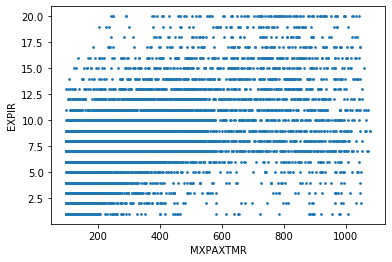

In [8145]:
 alltotal.plot.scatter('MXPAXTMR', 'EXPIR', s = 3)

In [8152]:
def doscatter(y):
  alltotal.plot.scatter('MXPAXTMR', y, s = 2)

# change to AGE rather than MXPAXTMR

In [8628]:
alltotal['AGE'] = alltotal['MXPAXTMR']/12

In [8629]:
def doscatterage(y):
  alltotal.plot.scatter('AGE', y, s = 2)

# PP variation same over age except for FEF75 and MMEF which have higher values above age 600 (50 yo)
so should have different upper and LLN for those
otherwise can have same LLN and ULN from STD for all other variables; and for those with FEF75 and MMEF have

does work for 8 of 8 values, 10 of 10 ratios, 5 of 5 ppopp ratios - 23

In [8153]:
varsppbest = ['EXPIRPPbest', 'FEF75PPbest', 'FEV05PPbest', 'FEV1PPbest', 'FEV3PPbest', 'FEV6PPbest', 'FVCPPbest', 
              'MMEFPPbest', 'PEFRPPbest',
              'FEF75OFVCPPbest', 'FEF75OPEFRPPbest',
              'FEV05OFEV3PPbest', 'FEV05OFVCPPbest', 'FEV1OFEV3PPbest',
              'FEV1OFEV6PPbest', 'FEV1OFVCPPbest','FEV3OFVCPPbest','PEFROFEV1PPbest', 
              'PEFROFEV6PPbest', 'PEFROFVCPPbest', 
              'FEV6OFVCPPbest','MMEFOFVCPPbest', 'MMEFOPEFRPPbest',
              'PEFRPPOFEV1PPPPbest', 'PEFRPPOFVCPPPPbest', 'MMEFPPOFVCPPPPbest', 
              'MMEFPPOPEFRPPPPbest', 'FEF75PPOFVCPPPPbest']

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


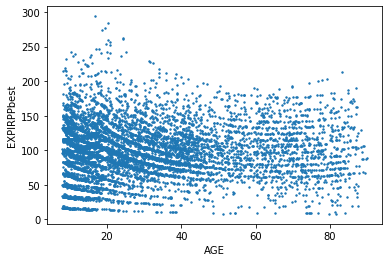

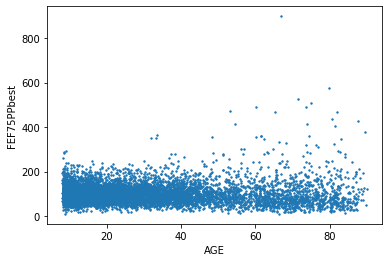

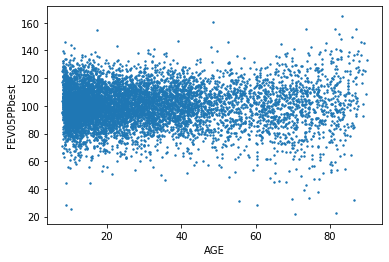

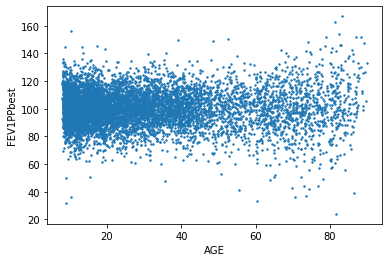

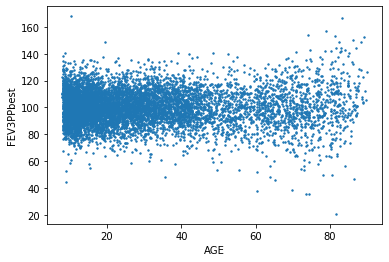

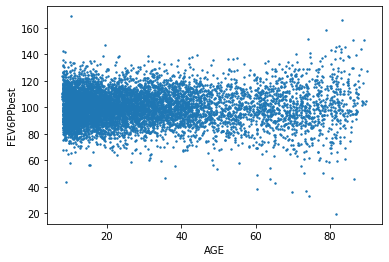

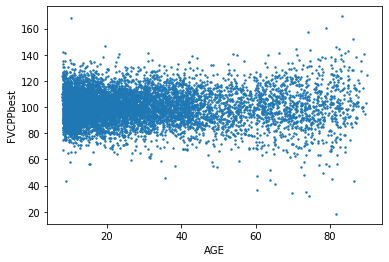

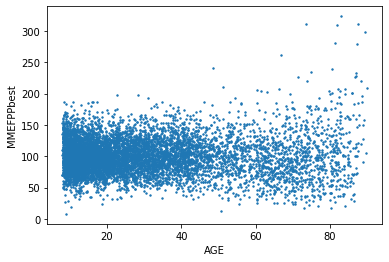

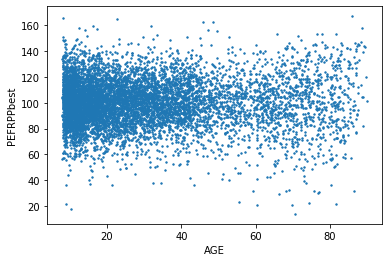

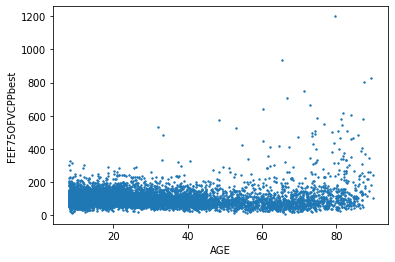

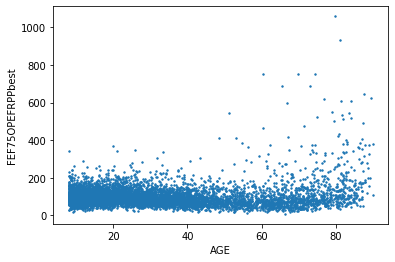

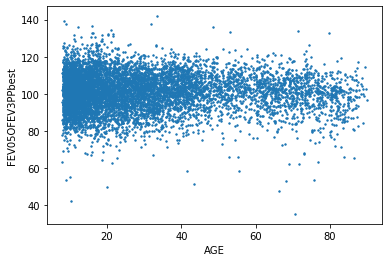

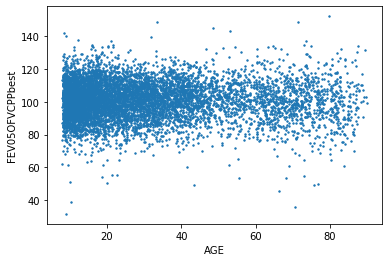

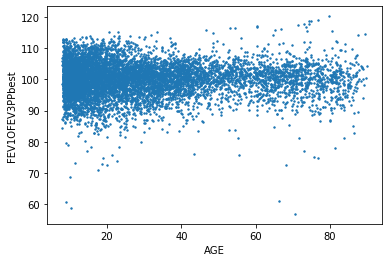

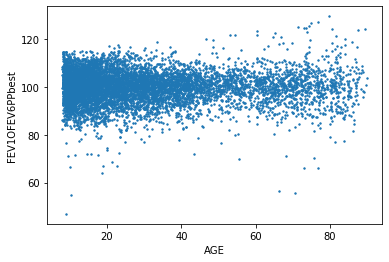

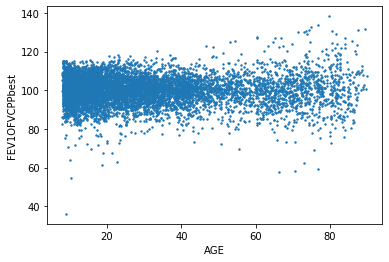

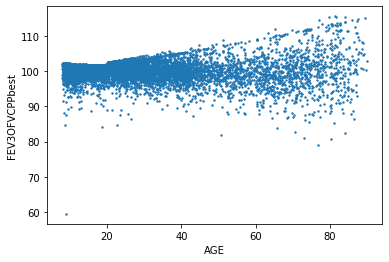

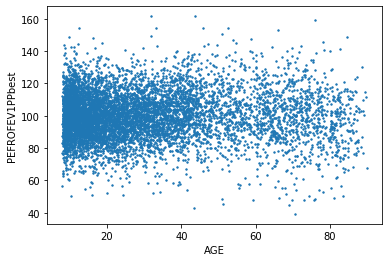

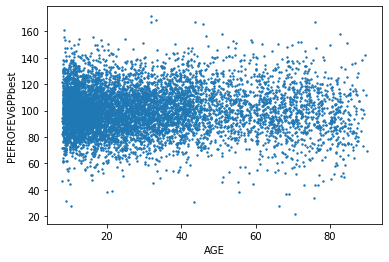

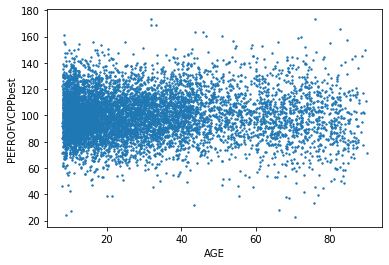

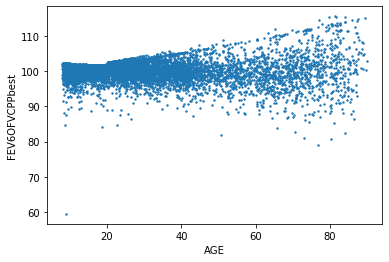

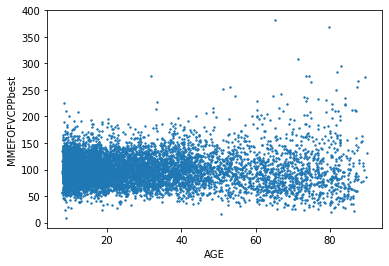

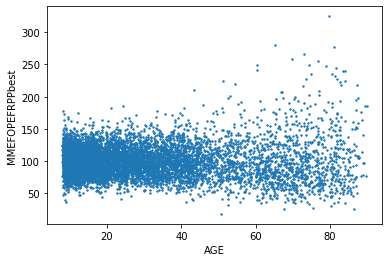

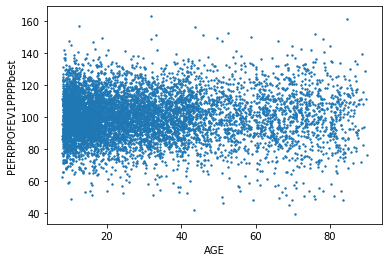

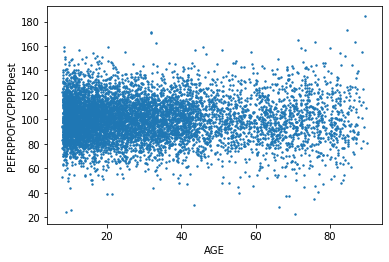

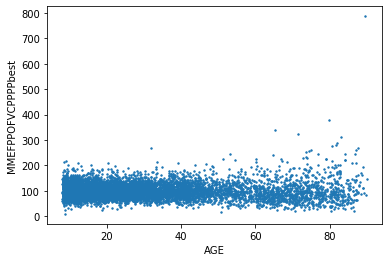

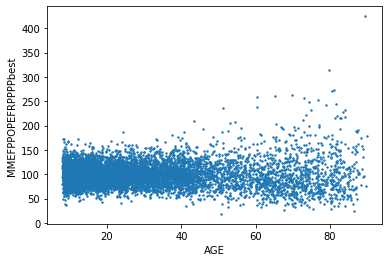

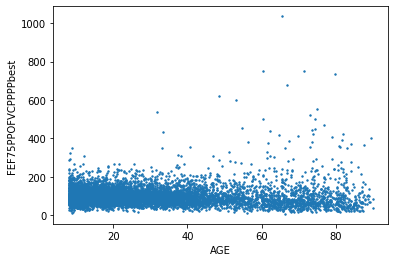

In [8630]:
for y in varsppbest:
    doscatterage(y)

# Create PPbestvalues array which has mean and stdev of the best percent predicted variables

# not work for mallcma
create PPbest - with the mean, STD and count of best %predicted
which should then be used for detemining LLN.  

In [8161]:
# create df PPbestvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPbestvalues= pd.DataFrame(columns = column_names)
PPbestvalues.name = 'PPbestvalues'
print (PPbestvalues.name)
print (PPbestvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b,
           mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma,flt18c, flt18ma, alltotal] # not work for mall
PPlist = ['FEV05OFEV3PP', 'FEV05OFVCPP',
           'FEV1OFEV3PP','FEV1OFEV6PP','FEV1OFVCPP', 'FEV3OFVCPP', 'FEV6OFVCPP',
           'MMEFOFVCPP', 'MMEFOPEFRPP', 'PEFROFEV1PP', 'PEFROFEV6PP', 'PEFROFVCPP',
           'EXPIRPP', 'FEF75PP', 'FEV05PP', 'FEV1PP', 'FEV3PP', 'FEV6PP', 'FVCPP',
           'MMEFPP',  'PEFRPP',
           'FEF75PPOFVCPPPP','MMEFPPOFVCPPPP','MMEFPPOPEFRPPPP', 'PEFRPPOFEV1PPPP','PEFRPPOFVCPPPP']
PPlist = varsppbest
for df in ftoa:
#    print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y,'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPbestvalues = PPbestvalues.append(df2, ignore_index=True)
   
    # now set index   
PPbestvalues.set_index('dfnvarn', inplace=True)


PPbestvalues
Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbEXPIRPPbest , m20overb ,  EXPIRPPbest ,  99.999 ,  35.225 ,  477
m20overbFEF75PPbest , m20overb ,  FEF75PPbest ,  100.029 ,  42.311 ,  477
m20overbFEV05PPbest , m20overb ,  FEV05PPbest ,  100.012 ,  16.393 ,  477
m20overbFEV1PPbest , m20overb ,  FEV1PPbest ,  100.015 ,  14.812 ,  477
m20overbFEV3PPbest , m20overb ,  FEV3PPbest ,  100.006 ,  13.869 ,  477
m20overbFEV6PPbest , m20overb ,  FEV6PPbest ,  100.0 ,  13.838 ,  477
m20overbFVCPPbest , m20overb ,  FVCPPbest ,  99.999 ,  14.025 ,  477
m20overbMMEFPPbest , m20overb ,  MMEFPPbest ,  100.046 ,  29.565 ,  477
m20overbPEFRPPbest , m20overb ,  PEFRPPbest ,  100.004 ,  19.78 ,  477
m20overbFEF75OFVCPPbest , m20overb ,  FEF75OFVCPPbest ,  107.349 ,  50.19 ,  477
m20overbFEF75OPEFRPPbest , m20overb ,  FEF75OPEFRPPbest ,  97.909 ,  50.59 ,  477
m20overbFEV05OFEV3PPbest , m20overb ,  FEV05OFEV3PPb

In [8162]:
print(PPbestvalues)

                               dfname                  var        mean  \
dfnvarn                                                                  
m20overbEXPIRPPbest          m20overb          EXPIRPPbest   99.999055   
m20overbFEF75PPbest          m20overb          FEF75PPbest  100.029383   
m20overbFEV05PPbest          m20overb          FEV05PPbest  100.012423   
m20overbFEV1PPbest           m20overb           FEV1PPbest  100.015339   
m20overbFEV3PPbest           m20overb           FEV3PPbest  100.006147   
...                               ...                  ...         ...   
alltotalPEFRPPOFEV1PPPPbest  alltotal  PEFRPPOFEV1PPPPbest  100.003031   
alltotalPEFRPPOFVCPPPPbest   alltotal   PEFRPPOFVCPPPPbest  100.005582   
alltotalMMEFPPOFVCPPPPbest   alltotal   MMEFPPOFVCPPPPbest  100.065220   
alltotalMMEFPPOPEFRPPPPbest  alltotal  MMEFPPOPEFRPPPPbest  100.035441   
alltotalFEF75PPOFVCPPPPbest  alltotal  FEF75PPOFVCPPPPbest   99.966486   

                                   st

In [8163]:
PPbestvalues

,dfname,var,mean,std,count
dfnvarn,,,,,
m20overbEXPIRPPbest,m20overb,EXPIRPPbest,99.999055,35.225265,477
m20overbFEF75PPbest,m20overb,FEF75PPbest,100.029383,42.310937,477
m20overbFEV05PPbest,m20overb,FEV05PPbest,100.012423,16.393031,477
m20overbFEV1PPbest,m20overb,FEV1PPbest,100.015339,14.811547,477
m20overbFEV3PPbest,m20overb,FEV3PPbest,100.006147,13.869118,477
...,...,...,...,...,...
alltotalPEFRPPOFEV1PPPPbest,alltotal,PEFRPPOFEV1PPPPbest,100.003031,14.226370,7851
alltotalPEFRPPOFVCPPPPbest,alltotal,PEFRPPOFVCPPPPbest,100.005582,17.031662,7851
alltotalMMEFPPOFVCPPPPbest,alltotal,MMEFPPOFVCPPPPbest,100.065220,30.502181,7851


# Now do PPbestlt600 PPbest600over PPbest720over

In [8502]:
alltotallt600 = alltotal.query('MXPAXTMR < 600')
alltotallt600.name = "alltotallt600"
alltotal600over = alltotal.query('MXPAXTMR >= 600')
alltotal600over.name = "alltotal600over"
alltotallt720 = alltotal.query('MXPAXTMR < 720')
alltotallt720.name = "alltotallt720"
alltotal720over = alltotal.query('MXPAXTMR >= 720')
alltotal720over.name = "alltotal720over"

In [8164]:
# create df PPbestvalueslt600 with mean, std, count just for alltotal
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPbestvalueslt600= pd.DataFrame(columns = column_names)
PPbestvalueslt600.name = 'PPbestvalueslt600'
print (PPbestvalueslt600.name)
print (PPbestvalueslt600)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [alltotallt600]
PPlist = varsppbest
for df in ftoa:
#    print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPbestvalueslt600 = PPbestvalueslt600.append(df2, ignore_index=True)
   
    # now set index   
PPbestvalueslt600.set_index('dfnvarn', inplace=True)


PPbestvalueslt600
Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
alltotallt600EXPIRPPbest , alltotallt600 ,  EXPIRPPbest ,  99.756 ,  37.642 ,  6499
alltotallt600FEF75PPbest , alltotallt600 ,  FEF75PPbest ,  100.138 ,  36.594 ,  6499
alltotallt600FEV05PPbest , alltotallt600 ,  FEV05PPbest ,  100.131 ,  13.264 ,  6499
alltotallt600FEV1PPbest , alltotallt600 ,  FEV1PPbest ,  100.115 ,  12.007 ,  6499
alltotallt600FEV3PPbest , alltotallt600 ,  FEV3PPbest ,  100.121 ,  11.736 ,  6499
alltotallt600FEV6PPbest , alltotallt600 ,  FEV6PPbest ,  100.117 ,  11.772 ,  6499
alltotallt600FVCPPbest , alltotallt600 ,  FVCPPbest ,  100.089 ,  11.778 ,  6499
alltotallt600MMEFPPbest , alltotallt600 ,  MMEFPPbest ,  100.323 ,  25.215 ,  6499
alltotallt600PEFRPPbest , alltotallt600 ,  PEFRPPbest ,  100.168 ,  16.894 ,  6499
alltotallt600FEF75OFVCPPbest , alltotallt600 ,  FEF75OFVCPPbest ,  99.6 ,  38.955 ,  6499
alltotallt600FEF7

In [8165]:
# create df PPbestvalues600over with mean, std, count just for alltotal
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPbestvalues600over= pd.DataFrame(columns = column_names)
PPbestvalues600over.name = 'PPbestvalues600over'
print (PPbestvalues600over.name)
print (PPbestvalues600over)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [alltotal600over]
PPlist = varsppbest
for df in ftoa:
#    print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPbestvalues600over = PPbestvalues600over.append(df2, ignore_index=True)
   
    # now set index   
PPbestvalues600over.set_index('dfnvarn', inplace=True)


PPbestvalues600over
Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
alltotal600overEXPIRPPbest , alltotal600over ,  EXPIRPPbest ,  101.325 ,  38.977 ,  1352
alltotal600overFEF75PPbest , alltotal600over ,  FEF75PPbest ,  101.47 ,  70.635 ,  1352
alltotal600overFEV05PPbest , alltotal600over ,  FEV05PPbest ,  99.643 ,  19.027 ,  1352
alltotal600overFEV1PPbest , alltotal600over ,  FEV1PPbest ,  99.881 ,  17.847 ,  1352
alltotal600overFEV3PPbest , alltotal600over ,  FEV3PPbest ,  99.854 ,  16.918 ,  1352
alltotal600overFEV6PPbest , alltotal600over ,  FEV6PPbest ,  99.797 ,  16.699 ,  1352
alltotal600overFVCPPbest , alltotal600over ,  FVCPPbest ,  99.865 ,  17.005 ,  1352
alltotal600overMMEFPPbest , alltotal600over ,  MMEFPPbest ,  99.433 ,  41.242 ,  1352
alltotal600overPEFRPPbest , alltotal600over ,  PEFRPPbest ,  99.4 ,  23.042 ,  1352
alltotal600overFEF75OFVCPPbest , alltotal600over ,  FEF75OFVCPPbest ,  110.143

In [8503]:
# create df PPbestvalueslt720 with mean, std, count just for alltotal
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPbestvalueslt720= pd.DataFrame(columns = column_names)
PPbestvalueslt720.name = 'PPbestvalueslt720'
print (PPbestvalueslt720.name)
print (PPbestvalueslt720)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [alltotallt720]
PPlist = varsppbest
for df in ftoa:
#    print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPbestvalueslt720 = PPbestvalueslt720.append(df2, ignore_index=True)
   
    # now set index   
PPbestvalueslt720.set_index('dfnvarn', inplace=True)


PPbestvalueslt720
Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
alltotallt720EXPIRPPbest , alltotallt720 ,  EXPIRPPbest ,  99.948 ,  37.561 ,  6867
alltotallt720FEF75PPbest , alltotallt720 ,  FEF75PPbest ,  100.16 ,  37.844 ,  6867
alltotallt720FEV05PPbest , alltotallt720 ,  FEV05PPbest ,  100.081 ,  13.425 ,  6867
alltotallt720FEV1PPbest , alltotallt720 ,  FEV1PPbest ,  100.07 ,  12.168 ,  6867
alltotallt720FEV3PPbest , alltotallt720 ,  FEV3PPbest ,  100.047 ,  11.853 ,  6867
alltotallt720FEV6PPbest , alltotallt720 ,  FEV6PPbest ,  100.041 ,  11.871 ,  6867
alltotallt720FVCPPbest , alltotallt720 ,  FVCPPbest ,  100.028 ,  11.879 ,  6867
alltotallt720MMEFPPbest , alltotallt720 ,  MMEFPPbest ,  100.253 ,  25.629 ,  6867
alltotallt720PEFRPPbest , alltotallt720 ,  PEFRPPbest ,  100.081 ,  17.045 ,  6867
alltotallt720FEF75OFVCPPbest , alltotallt720 ,  FEF75OFVCPPbest ,  99.036 ,  39.971 ,  6867
alltotallt720FEF7

In [8504]:
# create df PPbestvalues720over with mean, std, count just for alltotal
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPbestvalues720over= pd.DataFrame(columns = column_names)
PPbestvalues720over.name = 'PPbestvalues720over'
print (PPbestvalues720over.name)
print (PPbestvalues720over)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [alltotal720over]
PPlist = varsppbest
for df in ftoa:
#    print (df.name)
    for y in PPlist:
        print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPbestvalues720over = PPbestvalues600over.append(df2, ignore_index=True)
   
    # now set index   
PPbestvalues720over.set_index('dfnvarn', inplace=True)


PPbestvalues720over
Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
alltotal720overEXPIRPPbest , alltotal720over ,  EXPIRPPbest ,  100.569 ,  40.03 ,  984
alltotal720overFEF75PPbest , alltotal720over ,  FEF75PPbest ,  101.816 ,  75.535 ,  984
alltotal720overFEV05PPbest , alltotal720over ,  FEV05PPbest ,  99.811 ,  20.046 ,  984
alltotal720overFEV1PPbest , alltotal720over ,  FEV1PPbest ,  100.107 ,  18.885 ,  984
alltotal720overFEV3PPbest , alltotal720over ,  FEV3PPbest ,  100.269 ,  17.959 ,  984
alltotal720overFEV6PPbest , alltotal720over ,  FEV6PPbest ,  100.209 ,  17.755 ,  984
alltotal720overFVCPPbest , alltotal720over ,  FVCPPbest ,  100.206 ,  18.134 ,  984
alltotal720overMMEFPPbest , alltotal720over ,  MMEFPPbest ,  99.594 ,  44.194 ,  984
alltotal720overPEFRPPbest , alltotal720over ,  PEFRPPbest ,  99.719 ,  24.24 ,  984
alltotal720overFEF75OFVCPPbest , alltotal720over ,  FEF75OFVCPPbest ,  118.023 ,  

Now print the mean std, count for each variable for alltotal, alltotallt600, alltotalover600

In [8505]:
print (PPbestvalues)

                               dfname                  var        mean  \
dfnvarn                                                                  
m20overbEXPIRPPbest          m20overb          EXPIRPPbest   99.999055   
m20overbFEF75PPbest          m20overb          FEF75PPbest  100.029383   
m20overbFEV05PPbest          m20overb          FEV05PPbest  100.012423   
m20overbFEV1PPbest           m20overb           FEV1PPbest  100.015339   
m20overbFEV3PPbest           m20overb           FEV3PPbest  100.006147   
...                               ...                  ...         ...   
alltotalPEFRPPOFEV1PPPPbest  alltotal  PEFRPPOFEV1PPPPbest  100.003031   
alltotalPEFRPPOFVCPPPPbest   alltotal   PEFRPPOFVCPPPPbest  100.005582   
alltotalMMEFPPOFVCPPPPbest   alltotal   MMEFPPOFVCPPPPbest  100.065220   
alltotalMMEFPPOPEFRPPPPbest  alltotal  MMEFPPOPEFRPPPPbest  100.035441   
alltotalFEF75PPOFVCPPPPbest  alltotal  FEF75PPOFVCPPPPbest   99.966486   

                                   st

In [8506]:
    df = alltotal
    y = 'FEV1OFVCPPbest'
    vn = df.name + 'FEV1OFVCPPbest'
 #   df['FEV1OFVCLLNPred'] = (df.FEV1OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))

print (PPbestvalues.loc[vn,'mean'])

100.00053797028134


In [8507]:
print (varsppbest)

['EXPIRPPbest', 'FEF75PPbest', 'FEV05PPbest', 'FEV1PPbest', 'FEV3PPbest', 'FEV6PPbest', 'FVCPPbest', 'MMEFPPbest', 'PEFRPPbest', 'FEF75OFVCPPbest', 'FEF75OPEFRPPbest', 'FEV05OFEV3PPbest', 'FEV05OFVCPPbest', 'FEV1OFEV3PPbest', 'FEV1OFEV6PPbest', 'FEV1OFVCPPbest', 'FEV3OFVCPPbest', 'PEFROFEV1PPbest', 'PEFROFEV6PPbest', 'PEFROFVCPPbest', 'FEV6OFVCPPbest', 'MMEFOFVCPPbest', 'MMEFOPEFRPPbest', 'PEFRPPOFEV1PPPPbest', 'PEFRPPOFVCPPPPbest', 'MMEFPPOFVCPPPPbest', 'MMEFPPOPEFRPPPPbest', 'FEF75PPOFVCPPPPbest']


In [8509]:
 
    print ("dfvarn, df, var, mean, std, count")
    for df in [alltotal, alltotallt600, alltotal600over, alltotallt720, alltotal720over]:
        for y in varsppbest:
            print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())


dfvarn, df, var, mean, std, count
alltotalEXPIRPPbest , alltotal ,  EXPIRPPbest ,  100.026 ,  37.877 ,  7851
alltotalFEF75PPbest , alltotal ,  FEF75PPbest ,  100.368 ,  44.356 ,  7851
alltotalFEV05PPbest , alltotal ,  FEV05PPbest ,  100.047 ,  14.421 ,  7851
alltotalFEV1PPbest , alltotal ,  FEV1PPbest ,  100.075 ,  13.197 ,  7851
alltotalFEV3PPbest , alltotal ,  FEV3PPbest ,  100.075 ,  12.778 ,  7851
alltotalFEV6PPbest , alltotal ,  FEV6PPbest ,  100.062 ,  12.756 ,  7851
alltotalFVCPPbest , alltotal ,  FVCPPbest ,  100.051 ,  12.83 ,  7851
alltotalMMEFPPbest , alltotal ,  MMEFPPbest ,  100.17 ,  28.621 ,  7851
alltotalPEFRPPbest , alltotal ,  PEFRPPbest ,  100.035 ,  18.103 ,  7851
alltotalFEF75OFVCPPbest , alltotal ,  FEF75OFVCPPbest ,  101.415 ,  54.825 ,  7851
alltotalFEF75OPEFRPPbest , alltotal ,  FEF75OPEFRPPbest ,  98.111 ,  52.689 ,  7851
alltotalFEV05OFEV3PPbest , alltotal ,  FEV05OFEV3PPbest ,  100.998 ,  10.028 ,  7851
alltotalFEV05OFVCPPbest , alltotal ,  FEV05OFVCPPbest ,

Now compare our LLNX (meanX * (1 - 1.645 * STDPPX) to Hankinson LLN (from equation) for each variable and each group.  Have already created variables Xllnh from Hankinson equation.  Need create variables Xlln using our equation.  Create an array which contains the above values (similar to ratiovars)

Check that can do zscore

First create our LLNPred variables which equal predicted mean * (1 - 1.645 * stdpp) for all datatframes for all variables 
problem with mallcmaFEV1OFVCPP
Then create new fields of the LLN diffs for Hankinson variables
Then compare those LLN diffs
Then could also create array with Hansen LLN


In [8510]:
def createvarsllnPred(df):  #calculate the lln for each variable
 #   vn = df.name + 'FEF75OFVCPP'
 #   df['FEF75OFVCLLNPred'] = (df.FEF75OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
 #   vn = df.name + 'FEF75OPEFRPP'
  #  df['FEF75OPEFRLLNPred'] = (df.FEF75OPEFRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
#    vn = df.name + 'FEF75OFVCPP'
 #   df['FEF75OFVCLLNPred'] = (df.FEF75OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
#    vn = df.name + 'FEF75OPEFRPP'
#    df['FEF75OPEFRLLNPred'] = (df.FEF75OPEFRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
#    vn = df.name + 'FEV05OFEV3PP'
 #   df['FEV05OFEV3LLNPred'] = (df.FEV05OFEV3Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
#    vn = df.name + 'FEV05OFVCPP'
#    df['FEV05OFVCPPLLNPred'] = (df.FEV05OFVCPPPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = df.name + 'FEV1OFVCPP'
    df['FEV1OFVCLLNPred'] = (df.FEV1OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = dfa.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))         
    vn = df.name + 'FEV1OFEV6PP'
    df['FEV1OFEV6LLNPred'] = (df.FEV1OFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV6PP'
    df['PEFROFEV6LLNPred'] = (df.PEFROFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV1PP'
    df['PEFROFEV1LLNPred'] = (df.PEFROFEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV3OFVCPP'
    df['FEV3OFVCLLNPred'] = (df.FEV3OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV6OFVCPP'
    df['FEV6OFVCLLNPred'] = (df.FEV6OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = df.name + 'FEV05PP'
    df['FEV05LLNPred'] = (df.FEV05Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV1PP'
    df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FVCPP'
    df['FVCLLNPred'] = (df.FVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'PEFRPP'
    df['PEFRLLNPred'] = (df.PEFRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV3PP'
    df['FEV3LLNPred'] = (df.FEV3Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV6PP'
    df['FEV6LLNPred'] = (df.FEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'MMEFPP'
    df['MMEFLLNPred'] = (df.MMEFPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEF75PP'
    df['FEF75LLNPred'] = (df.FEF75Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'EXPIRPP'
    df['EXPIRLLNPred'] = (df.EXPIRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))

for y in framestoanalyze:
    print (y.name)

Not do creatvarsllnPred for now

In [8511]:
alltotal.name = "alltotal"
ftoa = framestoanalyze
ftoaall = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma,  alltotal]
ftoa = [ftoaall]
# just do for alltotal
# ftoa = [alltotal]
print (alltotal.name)
# for y in ftoa:
 #   createvarsllnPred(y)

alltotal


Now similar to Hankinson show how many are below the LLN  *****
Also need do upperlimitnormal for PEFR, PEFRPP/FVCPP;  but can use``````

Also do upperlimit normal

# Try doing for equation with z-score

Is giving error not finding 

# ?PPValues - or should it be PPValuesbest

In [8512]:
    df = alltotal
#    df = mlt20b
    print (df.name)
    vn = df.name + 'FEV1PPbest'
 #   vn = df.name + 'FEV1' + 'PP'
    print (vn)
    df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPbestvalues.loc[vn, 'std'])))) 
    print ("FEV1, ", df.name, ", ",len(df.query('FEV1 < FEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('FEV1 < FEV1LLNPred'))/len(df)) 

alltotal
alltotalFEV1PPbest
FEV1,  alltotal ,  0 ,  7851 ,  0.0


In [8513]:

    def getfraction (df,var):
        df = alltotal
        vn = df.name + var + "PPbest" 
        vPred = var + "Pred"
        varn3 = var
        varn2 = var
        list = ['EXPIR', 'FEF75', 'FEV1', 'FEV3', 'FEV6', 'FVC', 'MMEF']
 #       print (df.name)
#        print (var, " ",  " ", varn3, " ", vn, " ", vPred)   
#        df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
 #       print (varn2, df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
 #          len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df)) 
        zscore = 1.645
        zscoreu = 1.645
        std = PPbestvalues.loc[vn, 'std']
        zstd = zscore*std
        zstdu = zscoreu * std
  
        fraction =  len(df.query(varn3 + "<" + vPred + "* (1-"  + str(zstd) + ')'))/len(df)
        fractionu =  len(df.query(varn3 + ">" + vPred + "* (1+"  + str(zstd) + ')'))/len(df)


    

        print (df.name, ", ", var, ", ", round(std,4), ", ", round (zscore,4), ", ", round (fraction,5), 
               ", ", round(zscoreu,4), " ", round(fractionu,5))


  #      finalz = zscore
 #       return finalz 
 #          len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df)) 


#    vn = df.name + 'FEV1PP'
#   df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 

In [8514]:
var = "FEV1"
# var = "PEFRPPOFEV1PP"
df = alltotal
vn = df.name + var + "PPbest" 
vPred = var + "Pred"
varn3 = var
varn2 = var 
std = PPbestvalues.loc[vn, 'std']
print (vn, " ", std)

alltotalFEV1PPbest   13.197027910289226


In [8515]:
df = alltotal
print ("dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN")
var = "FEV1"
varlist = ['FEF75', 'FEV05', 'FEV1', 'FEV3', 'FEV6', 'FVC', 
            'MMEF', 'PEFR', 'FEV1OFEV3',
            'FEV1OFEV6', 'FEV1OFVC','FEV3OFVC','PEFROFEV1',
            'PEFROFEV6', 'PEFROFVC', 
            'FEV6OFVC','MMEFOFVC', 'MMEFOPEFR']
   #         'PEFRPPOFEV1PP'] #, 'PEFRPPOFVCPP', 'MMEFPPOFVCPP', 
#           'MMEFPPOPEFRPP', 'FEF75PPOFVCPP']'EXPIR'
for var in varlist:
    getfraction (df, var)

dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN
alltotal ,  FEF75 ,  44.3558 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV05 ,  14.4212 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV1 ,  13.197 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV3 ,  12.7782 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV6 ,  12.7564 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FVC ,  12.8299 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  MMEF ,  28.6207 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  PEFR ,  18.1027 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV1OFEV3 ,  5.4361 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV1OFEV6 ,  6.5762 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV1OFVC ,  7.2892 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV3OFVC ,  3.1141 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  PEFROFEV1 ,  14.4595 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  PEFROFEV6 ,  17.0409 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  PEFROFVC ,  17.3188 ,  1.645 ,  0.0 ,  1.645   0.0
alltotal ,  FEV6OFVC ,  3.11

now is not working from PPvalues for variable PPbest

#Need the variable + "Pred" (e.g. FVCPred, or FEF75OFVCPred - which should be calculated from best values

Now try doing with PPbest for lln, uln

In [8516]:
    df = alltotal
    vPPbest = "FEV1PPbest"
    llnp = 80
    print (len(df))
    fraction =  len(df.query(vPPbest + "<" + str(llnp)))/len(df)
    print (fraction)

7851
0.05629856069290536


Want for each age group, the # in age group, # PPbest below LLN 87.79, # with FEV1OFVC below 70% for FEV1/FVC

THIS shows not good fit to 0.05 young age too low; older too high
so need do separate analysis of LLN for lower ages (<600) and older, with vary older LLN equation

# The following creates output vs age of fraction with FEV1/FVC below 70% pred 
(e.g. meet GOLD COPD criteria)  Along with # in each 2 year age group

In [8639]:
    vPPbest = "FEV1OFVCPPbest"
    vbest = "FEV1OFVC"
    agemonth = "MXPAXTMR"
    monthrange = 24
    monthdiff = 24
    month = 72
    print (vbest,  "monthrange +/-", monthrange, "every", monthdiff, "months")
    print ("month, year, agemin,  agemax, # in age, n<70%, f<70%")    
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (42):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        flt70 = len(dftemp.query(vbest + "< 70"))
        a = "-"
        if len(dftemp) > 0:
            a = round(flt70/len(dftemp),6)
        print (month, ", ", round (month/12,1), ", ", lmonth, ",",hmonth, ", ", len(dftemp), ", ",
               flt70, ", ", a)

FEV1OFVC monthrange +/- 24 every 24 months
month, year, agemin,  agemax, # in age, n<70%, f<70%
96 ,  8.0 ,  72 , 120 ,  678 ,  4 ,  0.0059
120 ,  10.0 ,  96 , 144 ,  1478 ,  7 ,  0.004736
144 ,  12.0 ,  120 , 168 ,  1328 ,  7 ,  0.005271
168 ,  14.0 ,  144 , 192 ,  1005 ,  6 ,  0.00597
192 ,  16.0 ,  168 , 216 ,  927 ,  5 ,  0.005394
216 ,  18.0 ,  192 , 240 ,  833 ,  8 ,  0.009604
240 ,  20.0 ,  216 , 264 ,  661 ,  7 ,  0.01059
264 ,  22.0 ,  240 , 288 ,  601 ,  8 ,  0.013311
288 ,  24.0 ,  264 , 312 ,  585 ,  10 ,  0.017094
312 ,  26.0 ,  288 , 336 ,  540 ,  5 ,  0.009259
336 ,  28.0 ,  312 , 360 ,  508 ,  3 ,  0.005906
360 ,  30.0 ,  336 , 384 ,  497 ,  4 ,  0.008048
384 ,  32.0 ,  360 , 408 ,  462 ,  6 ,  0.012987
408 ,  34.0 ,  384 , 432 ,  422 ,  5 ,  0.011848
432 ,  36.0 ,  408 , 456 ,  373 ,  3 ,  0.008043
456 ,  38.0 ,  432 , 480 ,  371 ,  6 ,  0.016173
480 ,  40.0 ,  456 , 504 ,  386 ,  13 ,  0.033679
504 ,  42.0 ,  480 , 528 ,  343 ,  12 ,  0.034985
528 ,  44.0 ,  504 , 552

# Need create optimalLLN and optimalULN in alltotal
- optimal limit = (age < 600) * lln from alltotallt600 + (age >=720) * lln from alltotal720over + (age >= 600 and age < 720) * (age - 600) * (lln from alltotal720over - lln from alltotallt600)

In [8518]:
var = "FEV1OFVC"
# var = "FEV1"
df = alltotal
vn = df.name + var
temp = LLNULNbest.loc[vn,'lln']
print (vn, temp)

alltotalFEV1OFVC 87.797175


# Now want for each variable over age range the # that are below LLN or above ULN
initially comparing alltotal to alltotallt600, alltotal600over, alltotal720over, and alltotaloptimal 
- just one variable FEV1/FVC for now
- then for all variables using optimal limits
- optimal limit = (age < 600) * lln from alltotallt600 + (age >=720) * lln from alltotal720over + 
    (age >= 600 and age < 720) * (age - 600) * (lln from alltotal720over - lln from alltotallt600)

In [8519]:
print (vn)

alltotalFEV1OFVC


# looks like can do <600 and 600 over

In [8520]:
    var = "FEV1OFVC"
    vn = "alltotal" + var
    vPPbest = var + "PPbest"
    vbest = var
    agemonth = "MXPAXTMR"
    monthrange = 12
    monthdiff = 24
    month = 84
    llna = LLNULNbest.loc[vn,'lln'] # 87.79 # FOR FEV1/FVC alltotal
    lena = len(alltotal)
    lenb = len(alltotallt600)
    lenc = len(alltotal600over)
    lend = len(alltotal720over)
    llnb = 88.477 # for FEV1/FVC alltotallt600
    llnc = 84.668 # for FEV1/FVC alltotal600over
    llnd = 82 # for alltotal720over
    print (vbest, " LLNa ", llna, "monthrange ", monthrange, "monthdiff ", monthdiff)
    print ("month, year, agemin,  agemax, # in age, # <",
           llna, " ,f<",llna, ", #<", llnb,  ", f<",llnb, "#<", llnc,"f<", llnc, "#<", llnd, "f<", llnd )
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (40):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        fractiona =  len(dftemp.query(vPPbest + "<" + str(llna)))
        fractionb =  len(dftemp.query(vPPbest + "<" + str(llnb)))
        fractionc =  len(dftemp.query(vPPbest + "<" + str(llnc)))
        fractiond =  len(dftemp.query(vPPbest + "<" + str(llnd)))

        print (month, ", ", round (month/12,1), ", ", lmonth, ",",hmonth, ", ", len(dftemp), ", ",
               fractiona, ", ", round(fractiona/len(dftemp),6), ", ", 
               fractionb, ", ", round(fractionb/len(dftemp),6), ", ", 
               fractionc, ", ", round(fractionc/len(dftemp),6), ", ",
               fractiond, ", ", round(fractiond/len(dftemp),6))

FEV1OFVC  LLNa  87.797175 monthrange  12 monthdiff  24
month, year, agemin,  agemax, # in age, # < 87.797175  ,f< 87.797175 , #< 88.477 , f< 88.477 #< 84.668 f< 84.668 #< 82 f< 82
108 ,  9.0 ,  96 , 120 ,  672 ,  26 ,  0.03869 ,  33 ,  0.049107 ,  9 ,  0.013393 ,  4 ,  0.005952
132 ,  11.0 ,  120 , 144 ,  770 ,  25 ,  0.032468 ,  30 ,  0.038961 ,  11 ,  0.014286 ,  4 ,  0.005195
156 ,  13.0 ,  144 , 168 ,  528 ,  25 ,  0.047348 ,  28 ,  0.05303 ,  13 ,  0.024621 ,  4 ,  0.007576
180 ,  15.0 ,  168 , 192 ,  447 ,  16 ,  0.035794 ,  19 ,  0.042506 ,  5 ,  0.011186 ,  3 ,  0.006711
204 ,  17.0 ,  192 , 216 ,  464 ,  26 ,  0.056034 ,  29 ,  0.0625 ,  10 ,  0.021552 ,  5 ,  0.010776
228 ,  19.0 ,  216 , 240 ,  353 ,  27 ,  0.076487 ,  30 ,  0.084986 ,  8 ,  0.022663 ,  5 ,  0.014164
252 ,  21.0 ,  240 , 264 ,  297 ,  8 ,  0.026936 ,  10 ,  0.03367 ,  1 ,  0.003367 ,  1 ,  0.003367
276 ,  23.0 ,  264 , 288 ,  289 ,  11 ,  0.038062 ,  14 ,  0.048443 ,  9 ,  0.031142 ,  8 ,  0.027682
300 ,  25

# Not use below as already done with prior

In [8637]:

    def getzscore2PP (df,var, dfstd):
 #. The PPbest value is stored as varPPbest - e.g. FEV1PPbest
#. Want to determine the LLNP for which 5% are below LLNP
# start with LLNP = 100 - stdev * 1.645
    
# starte with ULNP = 100 + stdev * 1.645
#       print (var)
        vn = df.name + var + "PPbest" 
        vnstd = dfstd.name + var + "PPbest" 
#       for y in varsppbest:
#            print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())

 #       vnstd = df.name + var + "PPbest"
        vPPbest = var + "PPbest"
  #      std = df.loc[:vn.std()] # get std from the variable for the dataframe

 #       std = PPbestvalues.loc[vnstd, 'std'] # get the STD from the PPbestvalues array
    # need get std from the 
     
        # now    print (std)should change to compare FEV1PPbest *e.g. 70%
        llnp = 100 - std * 1.645
        ulnp = 100 + std * 1.645
#        print ("std ", std, "std*1.645 ", std*1.645, " llnp ", llnp, " ulnp ",ulnp)
#        print (std)

        diff = 2
        for i in range (20):
            fraction =  len(df.query(vPPbest + "<" + str(llnp)))/len(df)
  #          print ("fraction ",fraction, " diff ", diff)
            if fraction < 0.05:
                llnp = llnp + diff
  #              print (i, " ", fraction, " ", zscore, " ", diff)
                fraction =  len(df.query(vPPbest + "<" + str(llnp)))/len(df)

   #         print ("fraction< ",fraction, " diff ", diff)
                if fraction > 0.05:
                    diff = diff/2
            if fraction > 0.05:
                llnp = llnp - diff
  #              print (i, " ", fraction, " ", zscore, " ", diff)
                fraction =  len(df.query(vPPbest + "<" + str(llnp)))/len(df)
  #              print ("fraction> ",fraction, " diff ", diff)
                if fraction < 0.05:
                    diff = diff/2

        diff = 2
        for i in range (20): # LATER CHANGE TO 20
            fractionu =  len(df.query(vPPbest + ">" + str(ulnp)))/len(df)
            if fractionu < 0.05:
                ulnp = ulnp - diff
  #               print (i, " ", fractionu, " ", zscoreu, " ", diff)
                fractionu =  len(df.query(vPPbest + ">" + str(ulnp)))/len(df)
                if fractionu > 0.05:
                    diff = diff/2
            if fractionu > 0.05:
                ulnp = ulnp + diff
   #              print (i, " ", fractionu, " ", zscoreu, " ", diff)
                fractionu =  len(df.query(vPPbest + ">" + str(ulnp)))/len(df)
                if fractionu < 0.05:
                    diff = diff/2

        print (df.name, ", ", var, ", ", round(std,6), ", ", round (llnp,6), ", ", round(fraction, 6),
               ", ", round(ulnp,6), ", ", round(fractionu,6))
        d= dict();
        d['dfnvarn'] = df.name + var
        d['dfname'] = df.name
        d['std'] = round(std,6)
        d['var'] = var
        d['ltlln'] = round(fraction, 6)
        d['overuln'] = round (fractionu,6)
        d['lln'] = round (llnp, 6)
        d['uln'] = round (ulnp, 6)
        return d


# It is is printing SD from the alltotal, not forlt600 and 600 over

In [8638]:
# create  array with all the uln lln (for dfs e.g. alltotal, alltotallt600, alltotal600over)
column_names = ["dfnvarn","dfname", "var", "std", "lln", "ltlln", "uln", "overuln"]
# print (column_names)
LLNULNbest = pd.DataFrame(columns = column_names)
LLNULNbest.name = 'LLNULNbest'
print (LLNULNbest.name)
print (LLNULNbest)
print("dfvarname, dataframe, variable, std, lln, ltlln, uln, overuln")

dflist = [alltotal, alltotallt600, alltotal600over, alltotallt720, alltotal720over]
dfa = alltotal
print ("dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN")
varlist = ['EXPIR', 'FEF75', 'FEV05', 'FEV1', 'FEV3', 'FEV6', 'FVC', 
            'MMEF', 'PEFR', 
            'FEF75OFVC', 'FEF75OPEFR',
            'FEV05OFEV3', 
            'FEV05OFVC',
            'FEV1OFEV3',
            'FEV1OFEV6', 'FEV1OFVC',
            'FEV3OFVC', 'FEV6OFVC',
            'MMEFOFVC', 'MMEFOPEFR',
            'PEFROFEV1', 'PEFROFEV6', 'PEFROFVC']
  #          'PEFRPPOFEV1PP', 'PEFRPPOFVCPP', 'MMEFPPOFVCPP']

#           'MMEFPPOPEFRPP', 'FEF75PPOFVCPP']
df2 = ""
for df in dflist:
    for var in varlist:
        res = getzscore2PP (df, var, dfa)
        y= var
#        print (res)
   #     print(df.name + y, ",", df.name, ", ", y, ", ", res) # round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
    #    df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
  
        LLNULNbest = LLNULNbest.append(res, ignore_index=True)
   
    # now set index   
LLNULNbest.set_index('dfnvarn', inplace=True)
#. A for df in ftoa:
#    print (df.name)
# A     for y in PPlist:
 #. A       print(df.name + y, ",", df.name, ", ", y, ", ", round(df.loc[:,y].mean(),3), ", ", round(df.loc[:,y].std(),3), ", ", df.loc[:,y].count())
 #. A       df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

 #. A       PPbestvalues720over = PPbestvalues600over.append(df2, ignore_index=True)
   
    # now set index   
#. APPbestvalues720over.set_index('dfnvarn', inplace=True)

LLNULNbest
Empty DataFrame
Columns: [dfnvarn, dfname, var, std, lln, ltlln, uln, overuln]
Index: []
dfvarname, dataframe, variable, std, lln, ltlln, uln, overuln
dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN
alltotal ,  EXPIR ,  13.197028 ,  38.290889 ,  0.059483 ,  161.709111 ,  0.056171
alltotal ,  FEF75 ,  13.197028 ,  46.040889 ,  0.049548 ,  161.709111 ,  0.071965
alltotal ,  FEV05 ,  13.197028 ,  76.852833 ,  0.04993 ,  122.893109 ,  0.04993
alltotal ,  FEV1 ,  13.197028 ,  78.825088 ,  0.050057 ,  121.158233 ,  0.04993
alltotal ,  FEV3 ,  13.197028 ,  79.712364 ,  0.04993 ,  120.616685 ,  0.04993
alltotal ,  FEV6 ,  13.197028 ,  79.85197 ,  0.04993 ,  120.309883 ,  0.050057
alltotal ,  FVC ,  13.197028 ,  79.800124 ,  0.04993 ,  120.580506 ,  0.050057
alltotal ,  MMEF ,  13.197028 ,  57.650264 ,  0.04993 ,  147.740361 ,  0.04993
alltotal ,  PEFR ,  13.197028 ,  70.79148 ,  0.04993 ,  129.732793 ,  0.04993
alltotal ,  FEF75OFVC ,  13.197028 ,  45.290889 ,  0.048911 ,

# should have print out below this

- alltotallt600 and alltotal600over fit best

In [ ]:
    df = alltotal
    var = 'FEV1OFVC'
    vn = df.name + var
    vPPbest = var + "PPbest"
    vbest = var
    agemonth = "MXPAXTMR"
    monthrange = 24
    monthdiff = 24
    month = 84
    llna = LLNULNbest.loc["alltotal" + var,'lln'] # 87.79 # FOR FEV1/FVC alltotal
    lena = len(alltotal)
    lenb = len(alltotallt600)
    lenc = len(alltotal600over)
    lenc2 = len(alltotallt720)
    lend = len(alltotal720over)
    llnb = LLNULNbest.loc["alltotallt600" + var,'lln'] # 88.477 # for FEV1/FVC alltotallt600
    llnc = LLNULNbest.loc["alltotal600over" + var,'lln'] #84.668 # for FEV1/FVC alltotal600over
    llnc2 = LLNULNbest.loc["alltotallt720" + var,'lln']
    llnd = LLNULNbest.loc["alltotal720over" + var,'lln'] #82  for alltotal720over
    print (vbest, " LLNa ", llna, "mrange ", monthrange, "mdiff ", monthdiff, "all, lt600, 600over, lt720, 720over")
    print ("month, year, agemin,  agemax, # in age, # <",
           round(llna,2), " ,f<", ", #<", round(llnb,2),  ", f<","#<", round(llnc,2), "#<", round(llnc2,2),"f<",  
           "#<", round(llnd,2), "f<")
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (40):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        fractiona =  len(dftemp.query(vPPbest + "<" + str(llna)))
        fractionb =  len(dftemp.query(vPPbest + "<" + str(llnb)))
        fractionc =  len(dftemp.query(vPPbest + "<" + str(llnc)))
        fractionc2 =  len(dftemp.query(vPPbest + "<" + str(llnc2)))
        fractiond =  len(dftemp.query(vPPbest + "<" + str(llnd)))

        print (month, ", ", round (month/12,1), ", ", lmonth, ",",hmonth, ", ", len(dftemp), ", ",
               fractiona, ", ", round(fractiona/len(dftemp),3), ", ", 
               fractionb, ", ", round(fractionb/len(dftemp),3), ", ", 
               fractionc, ", ", round(fractionc/len(dftemp),3), ", ",
               fractionc2, ", ", round(fractionc2/len(dftemp),3), ", ",
               fractiond, ", ", round(fractiond/len(dftemp),3))

# Now for FEV1OFVC compare fraction below LLN us, Hankinson, Hansen

In [ ]:
    df = alltotal
    var = 'FEV1OFVC'
    vn = df.name + var
    vPPbest = var + "PPbest"
    vbest = var
    varllnh = var + "LLNPredh"
    varllnhansen = var + "LLNPredhansen"
    agemonth = "MXPAXTMR"
    monthrange = 24
    monthdiff = 24
    month = 84
    llna = LLNULNbest.loc["alltotal" + var,'lln'] # 87.79 # FOR FEV1/FVC alltotal
    lena = len(alltotal)
    lenb = len(alltotallt600)
    lenc = len(alltotal600over)
    lenc2 = len(alltotallt720)
    lend = len(alltotal720over)
    llnb = LLNULNbest.loc["alltotallt600" + var,'lln'] # 88.477 # for FEV1/FVC alltotallt600
    llnc = LLNULNbest.loc["alltotal600over" + var,'lln'] #84.668 # for FEV1/FVC alltotal600over
    llnc2 = LLNULNbest.loc["alltotallt720" + var,'lln']
    llnd = LLNULNbest.loc["alltotal720over" + var,'lln'] #82  for alltotal720over
    print (vbest, " LLNa ", llna, "mrange ", monthrange, "mdiff ", monthdiff, "all, lt600, 600over, Hankinson, Hansen")
    print ("month, year, agemin,  agemax, # in age, # <",
           round(llna,2), " ,f<", ", #<", round(llnb,2),  ", f<","#<", round(llnc,2), "#<, Hankinson f<",  
           "#<, Hansen, f<")
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (40):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        fractiona =  len(dftemp.query(vPPbest + "<" + str(llna)))
        fractionb =  len(dftemp.query(vPPbest + "<" + str(llnb)))
        fractionc =  len(dftemp.query(vPPbest + "<" + str(llnc)))
        fractionc2 =  len(dftemp.query(vPPbest + "<" + str(llnc2)))
        fractiond =  len(dftemp.query(vPPbest + "<" + str(llnd)))
        fractionh =   len(dftemp.query(var + "<" + varllnh))
        fractionhansen =   len(dftemp.query(var + "<" + varllnhansen))

        print (month, ", ", round (month/12,1), ", ", lmonth, ",",hmonth, ", ", len(dftemp), ", ",
               fractiona, ", ", round(fractiona/len(dftemp),3), ", ", 
               fractionb, ", ", round(fractionb/len(dftemp),3), ", ", 
               fractionc, ", ", round(fractionc/len(dftemp),3), ", ",
               fractionh, ", ", round(fractionh/len(dftemp),3), ", ",
               fractiond, ", ", round(fractiond/len(dftemp),3))

# Now need create LLNPredopt and ULNPPredopt

# Now need create LLNPPredopt and ULNPPredopt
- have varPPbest
- need deterine havw many subjects have PP below LLN
have predicted (varPredbest) value (mean) from the regressions
- already have varLLNPred as LLN using varPred * (1 - 1.654 *STD)
- Need varLLNPredopt as LLN using varPredbest * lln(from LLNULNbest)/100
- varPredbest = var/varPPbest*100
- need LLNPredopt
- from ULNLLNbest for lt600 and 600 over, create variables LLNPPredopt and ULNPredopt,
-   which equals the measured value 
- LLNPredopt = predicted value * (lln/100) (with lln from LLNULNbest)
- ULNPredopt = predicted value * (uln/100) (with uln from LLNULNbest)
- then later can determine fraction of subjects in each age group with value below LLNpred or above ULNpred

# Create varLLNPredopt and varULNPredopt for dataframe df (alltotal)

In [8463]:
print (LLNULNbest.loc['alltotallt600' + var, 'lln'])

74.33523


In [8580]:
    df = alltotal
    var = "FEV1OFVC"
    df['FEV1OFVCLLNPredopt'] = df.FEV1OFVC/df.FEV1OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV1OFVCULNPredopt'] = df.FEV1OFVC/df.FEV1OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
#    var = "EXPIR"
 #   df['EXPIRLNPredopt'] = df.EXPIR/df.EXPIRPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
 #        (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
#    df['EXPIRULNPredopt'] = df.EXPIR/df.EXPIRPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
 #        (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEF75"
    df['FEF75LLNPredopt'] = df.FEF75/df.FEF75PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEF75ULNPredopt'] = df.FEF75/df.FEF75PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "MMEF"
    df['MMEFLLNPredopt'] = df.MMEF/df.MMEFPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['MMEFULNPredopt'] = df.MMEF/df.MMEFPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV6"
    df['FEV6LLNPredopt'] = df.FEV6/df.FEV6PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV6ULNPredopt'] = df.FEV6/df.FEV6PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV3"
    df['FEV3LLNPredopt'] = df.FEV3/df.FEV3PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV3ULNPredopt'] = df.FEV3/df.FEV3PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "PEFR"
    df['PEFRLLNPredopt'] = df.PEFR/df.PEFRPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['PEFRULNPredopt'] = df.PEFR/df.PEFRPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FVC"
    df['FVCLLNPredopt'] = df.FVC/df.FVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FVCULNPredopt'] = df.FVC/df.FVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV1"
    df['FEV1LLNPredopt'] = df.FEV1/df.FEV1PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV1ULNPredopt'] = df.FEV1/df.FEV1PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV05"
    df['FEV05LLNPredopt'] = df.FEV05/df.FEV05PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV05ULNPredopt'] = df.FEV05/df.FEV05PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "MMEFOPEFR"
    df['MMEFOPEFRLLNPredopt'] = df.MMEFOPEFR/df.MMEFOPEFRPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['MMEFOPEFRULNPredopt'] = df.MMEFOPEFR/df.MMEFOPEFRPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "MMEFOFVC"
    df['MMEFOFVCLLNPredopt'] = df.MMEFOFVC/df.MMEFOFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['MMEFOFVCULNPredopt'] = df.MMEFOFVC/df.MMEFOFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV6OFVC"
    df['FEV6OFVCLLNPredopt'] = df.FEV6OFVC/df.FEV6OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV6OFVCULNPredopt'] = df.FEV6OFVC/df.FEV6OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV3OFVC"
    df['FEV3OFVCLLNPredopt'] = df.FEV3OFVC/df.FEV3OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV3OFVCULNPredopt'] = df.FEV3OFVC/df.FEV3OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "PEFROFEV1"
    df['PEFROFEV1LLNPredopt'] = df.PEFROFEV1/df.PEFROFEV1PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['PEFROFEV1ULNPredopt'] = df.PEFROFEV1/df.PEFROFEV1PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "PEFROFEV6"
    df['PEFROFEV6LLNPredopt'] = df.PEFROFEV6/df.PEFROFEV6PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['PEFROFEV6ULNPredopt'] = df.PEFROFEV6/df.PEFROFEV6PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEF75OFVC"
    df['FEF75OFVCLLNPredopt'] = df.FEF75OFVC/df.FEF75OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEF75OFVCULNPredopt'] = df.FEF75OFVC/df.FEF75OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "PEFROFEV1"
    df['PEFROFEV1LLNPredopt'] = df.PEFROFEV1/df.PEFROFEV1PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['PEFROFEV1ULNPredopt'] = df.PEFROFEV1/df.PEFROFEV1PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV05OFEV3"
    df['FEV05OFEV3LLNPredopt'] = df.FEV05OFEV3/df.FEV05OFEV3PPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV05OFEV3ULNPredopt'] = df.FEV05OFEV3/df.FEV05OFEV3PPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEV05OFVC"
    df['FEV05OFVCLLNPredopt'] = df.FEV05OFVC/df.FEV05OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEV05OFVCULNPredopt'] = df.FEV05OFVC/df.FEV05OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEF75OPEFR"
    df['FEF75OPEFRLLNPredopt'] = df.FEF75OPEFR/df.FEF75OPEFRPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEF75OPEFRULNPredopt'] = df.FEF75OPEFR/df.FEF75OPEFRPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 
    var = "FEF75OFVC"
    df['FEF75OFVCLLNPredopt'] = df.FEF75OFVC/df.FEF75OFVCPPbest*100 * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'lln']/100)
    df['FEF75OFVCULNPredopt'] = df.FEF75OFVC/df.FEF75OFVCPPbest * 100* ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
         (df.MXPAXTMR >=600)* LLNULNbest.loc['alltotal600over' + var, 'uln']/100) 


- That should have created FEV1OFVCLLNPred and FEV1OFVCULNPred for FEV1OFVC
- now should check graph of this value vs age

NOT USE
df['FEV1OFVCLLNPredopt'] = df.FEV1OFVCPred * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'lln']/100 +
     (df.MXPAXTMR >= 600) * (df.MXPAXTMR < 720) *   (720 - df.MXPAXTMR) / 120 *                            
     (LLNULNbest.loc['alltotal720over' + var, 'lln'] - LLNULNbest.loc['alltotallt600' + var, 'lln']) +
     (df.MXPAXTMR >=720)* LLNULNbest.loc['alltotal720over' + var, 'lln']/100  )   
df['FEV1OFVCULNPredopt'] = df.FEV1OFVCPred * ((df.MXPAXTMR < 600) * LLNULNbest.loc['alltotallt600' + var, 'uln']/100 +
     (df.MXPAXTMR >= 600) * (df.MXPAXTMR < 720) *   (720 - df.MXPAXTMR) / 120 *                            
     (LLNULNbest.loc['alltotal720over' + var, 'lln'] - LLNULNbest.loc['alltotallt600' + var, 'uln']) +
     (df.MXPAXTMR >=720)* LLNULNbest.loc['alltotal720over' + var, 'uln']/100  ) 

In [8642]:
def printLLNULNage (df, var):
#    df = alltotal
 #   var = "FEV1OFVC"
    varl = var + "LLNPredopt"
    varu = var + "ULNPredopt"
    agemonth = "MXPAXTMR"
    monthrange = 24
    monthdiff = 24
    month = 72
    lena = len(alltotal)
#. want to also print lln uln for PPbest array and PPULNLLN arrays for varlt600 varover600
    print ("var, LLNall, LLNlt600, LLN600over, ULNall, ULNlt600, ULN600over")
    print ( var, ",", round(LLNULNbest.loc['alltotal' + var, 'lln'],2), ",", round(LLNULNbest.loc['alltotallt600' + var, 'lln'],2), ",", 
        round(LLNULNbest.loc['alltotal600over' + var, 'lln'],2), ",",
        round(LLNULNbest.loc['alltotal' + var, 'uln'],2), ",",
        round(LLNULNbest.loc['alltotallt600' + var, 'uln'],2), ",", round(LLNULNbest.loc['alltotal600over' + var, 'uln'],2))

    print (var, ", all, ",  len(df), ",", len(df.query(var + "<" + varl)), ", ", round(len(df.query(var + "<" + varl))/len(df),6),",",
        len(df.query(var + ">" + varu)), ", ", round(len(df.query(var + ">" + varu))/len(df),6))
    print (var, ", monthrange, ", monthrange, ", monthdiff, ", monthdiff)
    print ("month, year, agemin,  agemax, # in age, # < LLN, f < LLN, # > ULN, f > ULN")
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (41):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        fractiona =  len(dftemp.query(var + "<" +  varl))
        fractionu =  len(dftemp.query(var + ">" +  varu))
        
        print (month, ", ", round (month/12,1), ", ", lmonth, ",",hmonth, ", ", len(dftemp), ", ",
               fractiona, ", ", round(fractiona/len(dftemp),6), ", ", 
               fractionu, ", ", round(fractionu/len(dftemp),6)) 
   #            fractionc, ", ", round(fractionc/len(dftemp),6), ", ",
   #            fractiond, ", ", round(fractionc/len(dftemp),6))

# The following prints all of fractiouns < LLN > ULN by age
# NOT WORKING FOR PEFROFVC
# NOT KEEP OUTPUT as very long

In [8643]:
varlist = ['FEV1OFVC', 'FEV1', 'FVC', 'PEFROFVC']
varlist = ['FEF75', 'FEV05', 'FEV1', 'FEV3', 'FEV6', 'FVC', 
            'MMEF', 'PEFR', 
            'FEF75OFVC','FEF75OPEFR','FEV05OFEV3','FEV05OFVC',
            'FEV1OFEV3','FEV1OFEV6', 'FEV1OFVC',
            'FEV3OFVC','FEV6OFVC',
            'MMEFOFVC', 'MMEFOPEFR', 
            'PEFROFEV1', 'PEFROFEV6', 'PEFROFVC']
# varlist = ['FEV1OFVC', 'FEV1']
df = alltotal
for var in varlist:
    printLLNULNage (df, var)

var, LLNall, LLNlt600, LLN600over, ULNall, ULNlt600, ULN600over
FEF75 , 46.04 , 50.82 , 38.29 , 161.71 , 161.71 , 161.71
FEF75 , all,  7851 , 391 ,  0.049803 , 397 ,  0.050567
FEF75 , monthrange,  24 , monthdiff,  24
month, year, agemin,  agemax, # in age, # < LLN, f < LLN, # > ULN, f > ULN
96 ,  8.0 ,  72 , 120 ,  678 ,  31 ,  0.045723 ,  42 ,  0.061947
120 ,  10.0 ,  96 , 144 ,  1478 ,  73 ,  0.049391 ,  68 ,  0.046008
144 ,  12.0 ,  120 , 168 ,  1328 ,  72 ,  0.054217 ,  48 ,  0.036145
168 ,  14.0 ,  144 , 192 ,  1005 ,  41 ,  0.040796 ,  45 ,  0.044776
192 ,  16.0 ,  168 , 216 ,  927 ,  28 ,  0.030205 ,  41 ,  0.044229
216 ,  18.0 ,  192 , 240 ,  833 ,  38 ,  0.045618 ,  33 ,  0.039616
240 ,  20.0 ,  216 , 264 ,  661 ,  26 ,  0.039334 ,  28 ,  0.04236
264 ,  22.0 ,  240 , 288 ,  601 ,  20 ,  0.033278 ,  29 ,  0.048253
288 ,  24.0 ,  264 , 312 ,  585 ,  27 ,  0.046154 ,  32 ,  0.054701
312 ,  26.0 ,  288 , 336 ,  540 ,  31 ,  0.057407 ,  32 ,  0.059259
336 ,  28.0 ,  312 , 360 ,  50

- Now LLN Hansen Hankinson fraction by age

In [8589]:
    df = alltotal
    var = 'FEV1OFVC'
    vn = df.name + var
    vPPbest = var + "PPbest"
    vbest = var
    varllnh = var + "LLNPredh"
    varllnhansen = var + "LLNPredhansen"
    varllnopt = var + "LLNPredopt"
    agemonth = "MXPAXTMR"
    monthrange = 24
    monthdiff = 24
    month = 72
    llna = LLNULNbest.loc["alltotal" + var,'lln'] # 87.79 # FOR FEV1/FVC alltotal
    lena = len(alltotal)
    lenb = len(alltotallt600)
    lenc = len(alltotal600over)
    lenc2 = len(alltotallt720)
    lend = len(alltotal720over)
    llnb = LLNULNbest.loc["alltotallt600" + var,'lln'] # 88.477 # for FEV1/FVC alltotallt600
    llnc = LLNULNbest.loc["alltotal600over" + var,'lln'] #84.668 # for FEV1/FVC alltotal600over
    llnc2 = LLNULNbest.loc["alltotallt720" + var,'lln']
    llnd = LLNULNbest.loc["alltotal720over" + var,'lln'] #82  for alltotal720over
    print (vbest, " LLNa ", llna, "mrange ", monthrange, "mdiff ", monthdiff, "all, lt600, 600over, Optimal, Hankinson, Hansen")
    print ("month, year, agemin,  agemax, # in age, # <",
           round(llna,2), " ,f<", ", #<", round(llnb,2),  ", f<, #<", round(llnc,2), ", f<", #<", "Optimal, f<, Hankinson f<",  
           "#<, Hansen, f<")
     # do months from 8 yr(96 mo) to 90 (1080)
    for i in range (40):
 #   dftemp = alltotal.query('MXPAXTMR >100')
        month = month + monthdiff
        lmonth = month -monthrange
        hmonth = month + monthrange
        dftemp = alltotal.query(agemonth + ">" + str(lmonth)).query(agemonth + "<" + str(hmonth))
        fractiona =  len(dftemp.query(vPPbest + "<" + str(llna)))
        fractionb =  len(dftemp.query(vPPbest + "<" + str(llnb)))
        fractionc =  len(dftemp.query(vPPbest + "<" + str(llnc)))
        fractionc2 =  len(dftemp.query(vPPbest + "<" + str(llnc2)))
        fractiond =  len(dftemp.query(vPPbest + "<" + str(llnd)))
        fractionh =   len(dftemp.query(var + "<" + varllnh))
        fractiono =   len(dftemp.query(var + "<" + varllnopt))
        fractionhansen =   len(dftemp.query(var + "<" + varllnhansen))

        print (month, ",", round (month/12,1), ",", lmonth, ",",hmonth, ",", len(dftemp), ",",
               fractiona, ", ", round(fractiona/len(dftemp),5), ",", 
               fractionb, ", ", round(fractionb/len(dftemp),5), ",", 
               fractionc, ", ", round(fractionc/len(dftemp),5), ",",
               fractiono, ", ", round(fractiono/len(dftemp),5), ",",
               fractionh, ", ", round(fractionh/len(dftemp),5), ",",
               fractiond, ", ", round(fractiond/len(dftemp),5))

FEV1OFVC  LLNa  87.797175 mrange  24 mdiff  24 all, lt600, 600over, Optimal, Hankinson, Hansen
month, year, agemin,  agemax, # in age, # < 87.8  ,f< , #< 88.48 , f<, #< 84.67 , f< #<, Hansen, f<
96 , 8.0 , 72 , 120 , 678 , 28 ,  0.0413 , 35 ,  0.05162 , 10 ,  0.01475 , 35 ,  0.05162 , 39 ,  0.05752 , 10 ,  0.01475
120 , 10.0 , 96 , 144 , 1478 , 52 ,  0.03518 , 65 ,  0.04398 , 20 ,  0.01353 , 65 ,  0.04398 , 77 ,  0.0521 , 18 ,  0.01218
144 , 12.0 , 120 , 168 , 1328 , 51 ,  0.0384 , 59 ,  0.04443 , 25 ,  0.01883 , 59 ,  0.04443 , 69 ,  0.05196 , 21 ,  0.01581
168 , 14.0 , 144 , 192 , 1005 , 41 ,  0.0408 , 47 ,  0.04677 , 18 ,  0.01791 , 47 ,  0.04677 , 46 ,  0.04577 , 16 ,  0.01592
192 , 16.0 , 168 , 216 , 927 , 42 ,  0.04531 , 48 ,  0.05178 , 15 ,  0.01618 , 48 ,  0.05178 , 36 ,  0.03883 , 15 ,  0.01618
216 , 18.0 , 192 , 240 , 833 , 54 ,  0.06483 , 60 ,  0.07203 , 18 ,  0.02161 , 60 ,  0.07203 , 48 ,  0.05762 , 17 ,  0.02041
240 , 20.0 , 216 , 264 , 661 , 36 ,  0.05446 , 41 ,  0.06203

- This works well for LLN, but ULN between age 50 and 70 too few above ULN

 now get z-scores (but is using varPred rather than varPPbest)

In [8208]:

    def getzscore2 (df,var):
 #       print (var)
  #      df = alltotal
  #      vn = df.name + var + "PP" 
        vn = df.name + var + "PPbest" 
        vPred = var + "Pred"
  #      vPred = var + "PPbest"  #try this
        varn3 = var
        varn2 = var
        list = ['EXPIR', 'FEF75', 'FEV1', 'FEV3', 'FEV6', 'FVC', 'MMEF']
  #      if var == 'EXPIR':
  #          var3 = "SPPEXPIR"

        zscore = 1.645
        zscoreu = 1.645
        std = PPbestvalues.loc[vn, 'std']/100 # try /100
        zstd = zscore*std
        zstdu = zscoreu * std
#        print (std)
  
#        print ("lower zscore ",zscore, " ", varn2, df.name, ", ",len(df.query(varn3 + '< ' + vPred + '* (1-' + str(zstd) + ')')), ", ", 
 #          len(df), ", ", len(df.query(varn3 + '< ' + vPred + '* (1-'  + str(zstd) + ')'))/len(df))
   
 #       print ("upper zscore ",zscore, " ",varn2, df.name, ", ",len(df.query(varn3 + '> ' + vPred + '* (1+' + str(zstd) + ')')), ", ", 
  #         len(df), ", ", len(df.query(varn3 + '> ' + vPred + '* (1+'  + str(zstd) + ')'))/len(df))
     
 #       print (varn2, df.name, ", ",len(df.query('SPPFEV1 < FEV1Pred * (1-' + str(zstd) + ')')), ", ", 
  #         len(df), ", ", len(df.query('SPPFEV1 < FEV1Pred * (1-' + str(zstd) + ')'))/len(df))
        diff = .2
        for i in range (20):
            fraction =  len(df.query(varn3 + "<" + vPred + "* (1-"  + str(zstd) + ')'))/len(df)
            if fraction < 0.05:
                zscore = zscore - diff
                zstd = zscore * std
  #              print (i, " ", fraction, " ", zscore, " ", diff)
                fraction =  len(df.query(varn3 + "<" + vPred + "* (1-"  + str(zstd) + ')'))/len(df)
                if fraction > 0.05:
                    diff = diff/2
            if fraction > 0.05:
                zscore = zscore + diff
                zstd = zscore * std
  #              print (i, " ", fraction, " ", zscore, " ", diff)
                fraction =  len(df.query(varn3 + "<" + vPred + "* (1-"  + str(zstd) + ')'))/len(df)
                if fraction < 0.05:
                    diff = diff/2

        diff = .2
        for i in range (20):
            fractionu =  len(df.query(varn3 + ">" + vPred + "* (1+"  + str(zstdu) + ')'))/len(df)
            if fractionu < 0.05:
                zscoreu = zscoreu - diff
                zstdu = zscoreu * std
 #               print (i, " ", fractionu, " ", zscoreu, " ", diff)
                fractionu =  len(df.query(varn3 + ">" + vPred + "* (1+"  + str(zstdu) + ')'))/len(df)
                if fractionu > 0.05:
                    diff = diff/2
            if fractionu > 0.05:
                zscoreu = zscoreu + diff
                zstdu = zscoreu * std
  #              print (i, " ", fractionu, " ", zscoreu, " ", diff)
                fractionu =  len(df.query(varn3 + ">" + vPred + "* (1+"  + str(zstdu) + ')'))/len(df)
                if fractionu < 0.05:
                    diff = diff/2

        print (df.name, ", ", var, ", ", round(std,6), ", ", round (zscore,6), ", ", round (fraction,5), 
               ", ", round(zscoreu,6), ", ", round(fractionu,6))


  #      finalz = zscore
 #       return finalz 
 #          len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df)) 


#    vn = df.name + 'FEV1PP'
#   df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 

# need do for 
           'PEFRPPOFEV1PP', 'PEFRPPOFVCPP', 'MMEFPPOFVCPP',            'MMEFPPOPEFRPP', 'FEF75PPOFVCPP']

Not work for FEV05/FEV3

In [8209]:
df = alltotal
print ("dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN")
varlist = ['EXPIR', 'FEF75', 'FEV05', 'FEV1', 'FEV3', 'FEV6', 'FVC', 
            'MMEF', 'PEFR', 
            'FEF75OFVC', 'FEF75OPEFR',
            'FEV05OFEV3', 
            'FEV05OFVC',
            'FEV1OFEV3',
            'FEV1OFEV6', 'FEV1OFVC',
            'FEV3OFVC', 'FEV6OFVC',
            'MMEFOFVC', 'MMEFOPEFR',
            'PEFROFEV1', 'PEFROFEV6', 'PEFROFVC']
  #          'PEFRPPOFEV1PP', 'PEFRPPOFVCPP', 'MMEFPPOFVCPP']
#           'MMEFPPOPEFRPP', 'FEF75PPOFVCPP']
#. for var in varlist:
  #. NOT DO FOR NOW AS OTHER ABOVE WORKED FOR PPbest  getzscore2 (df, var)

dframe, parameter, std, LLN zscore, <LLN, ULN zscore, >ULN


In [8210]:
def printltlln (df):
    print ("FEV05, ", df.name, ", ",len(df.query('SPPFEV05 < FEV05LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV05 < FEV05LLNPred'))/len(df))
    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df))
    print ("FVC, ", df.name, ", ",len(df.query('SPPFVC < FVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFVC < FVCLLNPred'))/len(df))
    print ("FEV6, ", df.name, ", ",len(df.query('SPPFEV6 < FEV6LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV6 < FEV6LLNPred'))/len(df))
    print ("PEFR, ", df.name, ", ",len(df.query('SPPPEAK < PEFRLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPPEAK < PEFRLLNPred'))/len(df))
    print ("MMEF, ", df.name, ", ",len(df.query('SPPMMEF < MMEFLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPMMEF < MMEFLLNPred'))/len(df))
    print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('FEV1OFVC < FEV1OFVCLLNPred'))/len(df))
    print ("PEFROFVC, ", df.name, ", ",len(df.query('PEFROFVC < PEFROFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('PEFROFVC < PEFROFVCLLNPred'))/len(df))
    
    print ("FEV1OFEV6, ", df.name, ", ",len(df.query('FEV1OFEV6 < FEV1OFEV6Pred')), ", ", 
           len(df), ", ", len(df.query('FEV1OFEV6 < FEV1OFEV6LLNPred'))/len(df))

    print ("PEFROFEV6, ", df.name, ", ",len(df.query('PEFROFEV6 < PEFROFEV6LLNPred')), ", ", 
           len(df), ", ", len(df.query('PEFROFEV6 < PEFROFEV6LLNPred'))/len(df))
    print ("PEFROFEV1, ", df.name, ", ",len(df.query('PEFROFEV1 < PEFROFEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('PEFROFEV1 < PEFROFEV1LLNPred'))/len(df))
    print ("FEV3OFVC, ", df.name, ", ",len(df.query('FEV3OFVC < FEV3OFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('FEV3OFVC < FEV3OFVCLLNPred'))/len(df))

    

   vn = df.name + 'FEV1OFVCPP'
    df['FEV1OFVCLLNPred'] = (df.FEV1OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = dfa.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))         
    vn = df.name + 'FEV1OFEV6PP'
    df['FEV1OFEV6LLNPred'] = (df.FEV1OFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFVCPP'
    df['PEFROFVCLLNPred'] = (df.PEFROFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV6PP'
    df['PEFROFEV6LLNPred'] = (df.PEFROFEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'PEFROFEV1PP'
    df['PEFROFEV1LLNPred'] = (df.PEFROFEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV3OFVCPP'
    df['FEV3OFVCLLNPred'] = (df.FEV3OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = df.name + 'FEV6OFVCPP'
    df['FEV6OFVCLLNPred'] = (df.FEV6OFVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))
    vn = df.name + 'FEV1PP'
    df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FVCPP'
    df['FVCLLNPred'] = (df.FVCPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'PEFRPP'
    df['PEFRLLNPred'] = (df.PEFRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV3PP'
    df['FEV3LLNPred'] = (df.FEV3Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEV6PP'
    df['FEV6LLNPred'] = (df.FEV6Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'MMEFPP'
    df['MMEFLLNPred'] = (df.MMEFPred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'FEF75PP'
    df['FEF75LLNPred'] = (df.FEF75Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 
    vn = dfa.name + 'EXPIRPP'
    df['EXPIRLLNPred'] = (df.EXPIRPred * (1 - 1.645* ((PPvalues.loc[vn, 'std']))))

Results in FEV1 near 5%, FVC 9%, MMEF 10%, PEFROFVC 6% to 2%; suggesting that for MMEF skewed to right and PEFROFVC skewed to left
So do scatter plot of PEFROFVC and of MMEF - see if skewed

In [ ]:
print ("parameter, dataframe, #<LLN, count, fraction < LLN")
ftoaall = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma, mallcma, alltotal]
ftoa = ftoaall
for y in ftoa:
    printltlln (y)

# Create LLN diff variables  - need redo using new LLN values from ppPred
Which is the predicted LLN (LLNPred) - the LLN predicted of Hankinson (LLNPredh)
However, we need LLNPredb - using methodb

In [ ]:
def createllndiffs(df):
    df['FEV1llndiff'] = df.FEV1LLNPred - df.FEV1LLNPredh
    df['FVCllndiff'] = df.FVCLLNPred - df.FVCLLNPredh
    df['PEFRllndiff'] = df.PEFRLLNPred - df.PEFLLNPredh
    df['MMEFllndiff'] = df.MMEFLLNPred - df.MMEFLLNPredh
    df['FEV6llndiff'] = df.FEV6LLNPred - df.FEV6LLNPredh
    df['FEV1OFVCllndiff'] = df.FEV1OFVCLLNPred - df.FEV1OFVCLLNPredh
    df['FEV1OFEV6llndiff'] = df.FEV1OFEV6LLNPred - df.FEV1OFEV6LLNPredh

In [7783]:
for y in hnonratioframestoanalyze:
    print (y.name)
#    createllndiffs(y)

m20overb
m20overc
m20overma
f18overb
f18overc
f18overma
mlt20b
mlt20c
mlt20ma
flt18b
flt18c
flt18ma


now print values of llndiffs for nonratio variables (need also do for hratioframestoanalyze)
llndiff is 

In [7679]:
hdifflist =  ['FEV1llndiff', 'FEV6llndiff', 'FVCllndiff','PEFRllndiff','MMEFllndiff'] #,'FEV1OFVCllndiff', 'FEV1OFEV6llndiff']

print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
ftoa = hnonratioframestoanalyze
for df in ftoa:
 #   print (df.name)
    for y in hdifflist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
#        df2 =         df2 = {'dfnvarn': [dfnvarn], 'dfname': y.name, 'var': xx, 
#                             'intercept': intercept, 'b1': b1, 'b2': b2, 'b3': b3, 'r2':r2, 'std':std, 'count':count}                          


dfvarname, dataframe, variable, mean, STD, count


KeyError: 'FEV1llndiff'

LLN = 

First create new variables LLNdiff = our percent predicted - Hankinson percent predicted

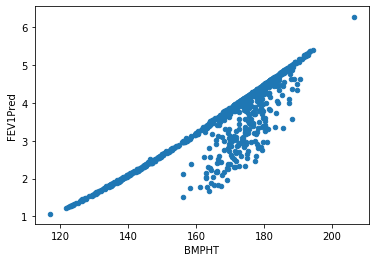

In [7680]:
mallc.plot.scatter('BMPHT', 'FEV1Pred')

Create PPcvalues

In [7684]:
# create df PPcvalues
column_names = ["dfnvarn","dfname", "var", "mean", "std", "count"]
# print (column_names)
PPcvalues= pd.DataFrame(columns = column_names)
PPcvalues.name = 'PPvalues'
print (PPcvalues)
print("dfvarname, dataframe, variable, mean, STD, count")
ftoa = [m20overb, m20overcma, m20overc, m20overma, f18overb, f18overcma, f18overc, f18overma, mlt20b, 
        mlt20cma, mlt20c, mlt20ma, flt18b, flt18cma, flt18c, flt18ma]
PPclist = ['FEV1OFVCPPc', 'FEV1OFEV6PPc', 'PEFROFVCPPc', 'PEFROFEV6PPc', 
           'PEFROFEV1PPc', 'FEV3OFVCPPc', 'FEV6OFVCPPc', 'FEV1PPc', 'FVCPPc',
           'PEFRPPc', 'FEV3PPc', 'FEV6PPc', 'MMEFPPc', 'FEF75PPc', 'EXPIRPPc']
for df in ftoa:
 #   print (df.name)
    for y in PPclist:
        print(df.name + y, ",", df.name, ", ", y, ", ", df.loc[:,y].mean(), ", ", df.loc[:,y].std(), ", ", df.loc[:,y].count())
        df2 = {    'dfnvarn': df.name + y, 'dfname': df.name, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count':df.loc[:,y].count()}
   #     df2 =  {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), 'std':df.loc[:,y].std(), 'count',df.loc[:,y].count()}
  #      df2 = {'dfnvarn': df.name + y, 'dfname': df.name, 'var': y, 'mean': df.loc[:,y].mean(), std':df.loc[:,y].std(), 'count',df.loc[:,y].count()  }                         

        PPcvalues = LLNvalues.append(df2, ignore_index=True)
  # now set index   
PPcvalues.set_index('dfnvarn', inplace=True)

Empty DataFrame
Columns: [dfnvarn, dfname, var, mean, std, count]
Index: []
dfvarname, dataframe, variable, mean, STD, count
m20overbFEV1OFVCPPc , m20overb ,  FEV1OFVCPPc ,  102.560943363407 ,  8.16507717215925 ,  477


NameError: name 'LLNvalues' is not defined

 from scipy import stats
?do this

In [7685]:
varsppbest = ['EXPIRPPbest', 'FEF75PPbest', 'FEV05PPbest', 'FEV1PPbest', 'FEV3PPbest', 'FEV6PPbest', 'FVCPPbest', 
              'MMEFPPbest', 'PEFRPPbest', 'FEV1OFEV3PPbest',
              'FEV1OFEV6PPbest', 'FEV1OFVCPPbest','FEV3OFVCPPbest','PEFROFEV1PPbest', 
              'PEFROFEV6PPbest', 'PEFROFVCPPbest', 
              'FEV6OFVCPPbest','MMEFOFVCPPbest', 'MMEFOPEFRPPbest',
              'PEFRPPOFEV1PPPPbest', 'PEFRPPOFVCPPPPbest', 'MMEFPPOFVCPPPPbest', 
              'MMEFPPOPEFRPPPPbest', 'FEF75PPOFVCPPPPbest']

In [7782]:
 #   print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPred')), ", ")


Now want to vary LLNPred so that it comes out to 5%
First try doing for FEV1
FEV1LLNPred was initially set to predicted - 1.645 * STD of the %predicted
start with offset = 1.645
Each subject has an FEV1 SPPFEV1, a predicted FEV1 FEV1Pred, and 
   FEV1LLNPred which equals FEV1Pred * (1 - 1.645 * stdev of FEV1PP)
start with offset = 1.645
LLN = <<FEV1Pred * (1 - offset * stdev of FEV1PP)>>
PBLLN = len(df.query('SPPFEV1 < <<FEV1Pred * (1 - offset * stdev of FEV1PP)>>'))/len(df)) 
if PBLLN < 0.05 then offset = offset - .01
If len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df))
    vn = df.name + 'FEV1PP'
    df['FEV1LLNPred'] = (df.FEV1Pred * (1 - 1.645* ((PPvalues.loc[vn, 'std'])))) 

In [7687]:
def printltllnend (df):
    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df))
    print ("FVC, ", df.name, ", ",len(df.query('SPPFVC < FVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFVC < FVCLLNPred'))/len(df))
    print ("FEV6, ", df.name, ", ",len(df.query('SPPFEV6 < FEV6LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV6 < FEV6LLNPred'))/len(df))
    print ("PEFR, ", df.name, ", ",len(df.query('SPPPEAK < PEFRLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPPEAK < PEFRLLNPred'))/len(df))
    print ("MMEF, ", df.name, ", ",len(df.query('SPPMMEF < MMEFLLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPMMEF < MMEFLLNPred'))/len(df))
    print ("FEV1OFVC, ", df.name, ", ",len(df.query('FEV1OFVC < FEV1OFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('FEV1OFVC < FEV1OFVCLLNPred'))/len(df))
    print ("PEFROFVC, ", df.name, ", ",len(df.query('PEFROFVC < PEFROFVCLLNPred')), ", ", 
           len(df), ", ", len(df.query('PEFROFVC < PEFROFVCLLNPred'))/len(df))
 
    

it is not not have alltotal FEV1PP

In [7689]:
def printltllnend (df):
    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
           len(df), ", ", len(df.query('SPPFEV1 < FEV1LLNPred'))/len(df))
    vn = df.name + 'FEV1PP'
    print (PPvalues.loc[vn, 'std'])
#    print ((1 - 1.645* (PPvalues.loc[vn, 'std']))
#    print ("FEV1, ", df.name, ", ",len(df.query('SPPFEV1 < FEV1LLNPred')), ", ", 
#           len(df), ", ", len(df.query('SPPFEV1 < (1 - 1.645* ((PPvalues.loc[vn, 'std']))))/len(df))    